**Import libraries and data**

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import data
data = pd.read_csv("US_Accidents_March23_sampled_500k.csv")

# EDA

In [4]:
#look at dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [5]:
#print number and percentage of null entries per variable
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_percentage = round(missing_values[missing_values!=0]/len(data),ndigits=6)*100
print(" Percentage of Missing Values")
print(missing_percentage)

 Percentage of Missing Values
End_Lat                  44.0754
End_Lng                  44.0754
Precipitation(in)        28.5232
Wind_Chill(F)            25.8034
Wind_Speed(mph)           7.3974
Visibility(mi)            2.2582
Wind_Direction            2.2394
Humidity(%)               2.2260
Weather_Condition         2.2202
Temperature(F)            2.0932
Pressure(in)              1.7856
Weather_Timestamp         1.5348
Nautical_Twilight         0.2966
Civil_Twilight            0.2966
Sunrise_Sunset            0.2966
Astronomical_Twilight     0.2966
Airport_Code              0.2892
Street                    0.1382
Timezone                  0.1014
Zipcode                   0.0232
City                      0.0038
Description               0.0002
dtype: float64


In [6]:
#look at distribution of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,500000.0,2.212748,0.486661,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,500000.0,36.206421,5.071411,24.562117,33.416823,35.832147,40.082443,48.999569
Start_Lng,500000.0,-94.736583,17.405761,-124.497420,-117.233047,-87.794365,-80.359601,-67.484130
End_Lat,279623.0,36.273192,5.265333,24.570110,33.474773,36.192669,40.181341,48.998901
End_Lng,279623.0,-95.776553,18.120211,-124.497419,-117.778324,-88.039013,-80.252449,-67.484130
Distance(mi),500000.0,0.564317,1.774872,0.000000,0.000000,0.029000,0.465000,193.479996
Temperature(F),489534.0,61.646254,19.000133,-77.800000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),370983.0,58.229028,22.352246,-53.200000,43.000000,62.000000,75.000000,207.000000
Humidity(%),488870.0,64.834921,22.826158,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),491072.0,29.536621,1.008666,0.120000,29.370000,29.860000,30.030000,38.440000


In [7]:
#look at formatting of entries
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [8]:
#looking for cases where End_Lat or End_Lng are null
data[data.End_Lat.isnull() | data.End_Lng.isnull()]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-1101469,Source2,2,2021-03-29 07:03:58,2021-03-29 08:51:01,42.532082,-70.944267,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day
10,A-925338,Source2,2,2021-08-25 07:10:09,2021-08-25 07:49:00,39.933460,-86.157433,NaN,NaN,2.48,...,False,False,False,False,False,False,Day,Day,Day,Day
12,A-1388988,Source2,2,2020-07-16 11:03:31,2020-07-16 13:17:35,34.720150,-86.616592,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day
14,A-2127689,Source2,2,2019-05-28 07:37:44,2019-05-28 08:45:19,33.436073,-111.926163,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499980,A-2239905,Source2,2,2019-03-26 08:36:05,2019-03-26 09:05:46,42.305809,-88.107262,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
499981,A-435336,Source2,3,2017-05-05 05:08:33,2017-05-05 05:52:44,32.656456,-96.883339,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
499983,A-1675052,Source2,3,2020-01-02 14:40:40,2020-01-02 15:33:14,42.669571,-72.542686,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
499985,A-1083228,Source2,3,2021-04-14 16:24:16,2021-04-14 17:25:31,32.675854,-97.382652,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
#look through some of the variables with low number of unique entries
#Wind direction has repeats with different spellings
#Weather condition has some repeats (e.g., 'heavy rain shower' and 'heavy rain showers')
for col in data.columns:
    #if data[col].dtype == 'object':  # Check if the column contains strings
        #unique_sorted_values = sorted(data[col].astype(str).unique())
    #else:
        #unique_sorted_values = sorted(data[col].unique())
    unique_sorted_values = data[col].unique()
    print('{}: {}'.format(col, unique_sorted_values))

ID: ['A-2047758' 'A-4694324' 'A-5006183' ... 'A-3789256' 'A-7030381'
 'A-5438901']
Source: ['Source2' 'Source1' 'Source3']
Severity: [2 3 4 1]
Start_Time: ['2019-06-12 10:10:56' '2022-12-03 23:37:14.000000000'
 '2022-08-20 13:13:00.000000000' ... '2021-12-19 16:25:00'
 '2020-05-15 17:20:56' '2022-04-02 23:23:13']
End_Time: ['2019-06-12 10:55:58' '2022-12-04 01:56:53.000000000'
 '2022-08-20 15:22:45.000000000' ... '2022-04-13 21:33:44'
 '2020-05-15 17:50:56' '2022-04-03 00:49:48']
Start_Lat: [30.641211   38.990562   34.66118932 ... 34.56186175 38.40668
 35.069358  ]
Start_Lng: [ -91.153481    -77.39907    -120.49282193 ... -112.25962043  -78.61931
  -85.23441   ]
End_Lat: [        nan 38.990037   34.66118932 ... 34.56682175 38.40668
 35.070505  ]
End_Lng: [          nan  -77.398282   -120.49244193 ... -112.26715043  -78.61931
  -85.233836  ]
Distance(mi): [ 0.          0.056       0.022      ... 11.14999962  7.794
 14.523     ]
Description: ['Accident on LA-19 Baker-Zachary Hwy at Lower

In [10]:
weather_data = data[['Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)','Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']]

In [11]:
#null percipitation values are not necessarily due to no rain
weather_data[weather_data['Precipitation(in)'] == 0]

,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,2019-06-12 09:53:00,77.0,77.0,62.0,29.92,10.0,NW,5.0,0.0,Fair
1,2022-12-03 23:52:00,45.0,43.0,48.0,29.91,10.0,W,5.0,0.0,Fair
2,2022-08-20 12:56:00,68.0,68.0,73.0,29.79,10.0,W,13.0,0.0,Fair
3,2022-02-21 17:35:00,27.0,15.0,86.0,28.49,10.0,ENE,15.0,0.0,Wintry Mix
4,2020-12-04 01:54:00,42.0,42.0,34.0,29.77,10.0,CALM,0.0,0.0,Fair
...,...,...,...,...,...,...,...,...,...,...
499993,2022-02-16 12:51:00,63.0,63.0,37.0,29.79,10.0,SW,10.0,0.0,Fair
499994,2019-11-09 15:47:00,90.0,90.0,7.0,28.72,10.0,NW,8.0,0.0,Fair
499997,2022-04-13 19:53:00,52.0,52.0,12.0,24.94,10.0,WSW,12.0,0.0,Fair
499998,2020-05-15 17:15:00,82.0,82.0,38.0,28.70,10.0,SSW,14.0,0.0,Fair


In [12]:
#looking for cases where Humidity is zero and Percipitation is null (i.e., precipitation should be set to zero)
weather_data[(weather_data['Humidity(%)'] == 0) & (weather_data['Precipitation(in)'].isna())][['Humidity(%)','Precipitation(in)']]

,Humidity(%),Precipitation(in)


In [13]:
#looking for cases where wind speed is not zero and wind direction is null (i.e., no wind to have a wind direction)
weather_data[(weather_data['Wind_Speed(mph)'] != 0) & (weather_data['Wind_Direction'].isna())][['Wind_Speed(mph)','Wind_Direction']]

,Wind_Speed(mph),Wind_Direction
83,NaN,NaN
89,NaN,NaN
90,NaN,NaN
179,NaN,NaN
297,NaN,NaN
...,...,...
499744,NaN,NaN
499761,NaN,NaN
499901,NaN,NaN
499905,NaN,NaN


In [14]:
#looking to see if wind_speed is zero, is wind_chill null
#for these records, null wind_chill entries should be replaced with temperature
weather_data[(weather_data['Wind_Speed(mph)'] == 0) & (weather_data['Wind_Chill(F)'].isna())][['Wind_Speed(mph)','Wind_Chill(F)']]

,Wind_Speed(mph),Wind_Chill(F)
1224,0.0,NaN
3203,0.0,NaN
3254,0.0,NaN
3478,0.0,NaN
4138,0.0,NaN
...,...,...
487123,0.0,NaN
488242,0.0,NaN
488739,0.0,NaN
489470,0.0,NaN


In [15]:
#looking to see if wind_speed is zero if there is a wind chill
weather_data[(weather_data['Wind_Speed(mph)'] == 0)&(~weather_data['Wind_Chill(F)'].isna())][['Wind_Speed(mph)','Wind_Chill(F)']]

,Wind_Speed(mph),Wind_Chill(F)
4,0.0,42.0
6,0.0,35.0
22,0.0,64.0
33,0.0,37.0
35,0.0,60.0
...,...,...
499963,0.0,57.0
499969,0.0,80.0
499970,0.0,82.0
499986,0.0,65.0


In [16]:
#looking for null values in both wind speed and wind chill
weather_data[(weather_data['Wind_Speed(mph)'].isna())&(weather_data['Wind_Chill(F)'].isna())][['Wind_Speed(mph)','Wind_Chill(F)']]

,Wind_Speed(mph),Wind_Chill(F)
41,NaN,NaN
46,NaN,NaN
48,NaN,NaN
83,NaN,NaN
89,NaN,NaN
...,...,...
499901,NaN,NaN
499905,NaN,NaN
499918,NaN,NaN
499936,NaN,NaN


In [17]:
#for reference when categorizing based on numerical and categorical
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [18]:
#categorized variables based on numerical, categoric, and datetime
#description is excluded

numerical = [
       'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng',
       'Accident_Duration(min)','Distance(mi)','Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)'
]


categorical = [
       
       'Source','State','Timezone','Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'
]

datetime = ['Start_Time', 'End_Time', 'Weather_Timestamp']

# Data Cleaning and Feature Engineering

In [19]:
#import data
data = pd.read_csv("US_Accidents_March23_sampled_500k.csv")

In [20]:
#parse dates and times
import datetime
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format="%Y-%m-%d %H:%M")
data['End_Time'] = pd.to_datetime(data['End_Time'], format="%Y-%m-%d %H:%M")
data['Weather_Timestamp'] = pd.to_datetime(data['Weather_Timestamp'], format="%Y-%m-%d %H:%M")

#create a new feature
data['Accident_Duration(min)'] = (data['End_Time'] - data['Start_Time']).dt.total_seconds() / 60.0

#seperate variables with dates and times into seperate columns
data.rename(columns={
    "Start_Time": 'Time'}, inplace=True)

data['Year'] = data['Time'].dt.year
data['Month'] = data['Time'].dt.month
data['Day'] = data['Time'].dt.day
data['Weekday'] = data['Time'].dt.weekday
data['Hour'] = data['Time'].dt.hour

datetime= []


datetime.append('Year')
datetime.append('Month')
datetime.append('Day')
datetime.append('Weekday')
datetime.append('Hour')

#remove datetime columns from dataframe
data = data.drop(['Time','End_Time', 'Weather_Timestamp'], axis=1)


In [21]:
#only use the Start_Lng and Start_Lat
data.rename(columns={
    "Start_Lng": 'Longitude',
    "Start_Lat": 'Latitude',
}, inplace=True)

numerical.remove('Start_Lng')
numerical.remove('Start_Lat')
numerical.append('Longitude')
numerical.append('Latitude')

#remove End_Lng and End_Lat columns from dataframe
data = data.drop(['End_Lng', 'End_Lat'], axis=1)
numerical.remove('End_Lng')
numerical.remove('End_Lat')

**Correlation heatmap**

Text(0.5, 1.0, 'Correlation Heatmap for numerical Variables')

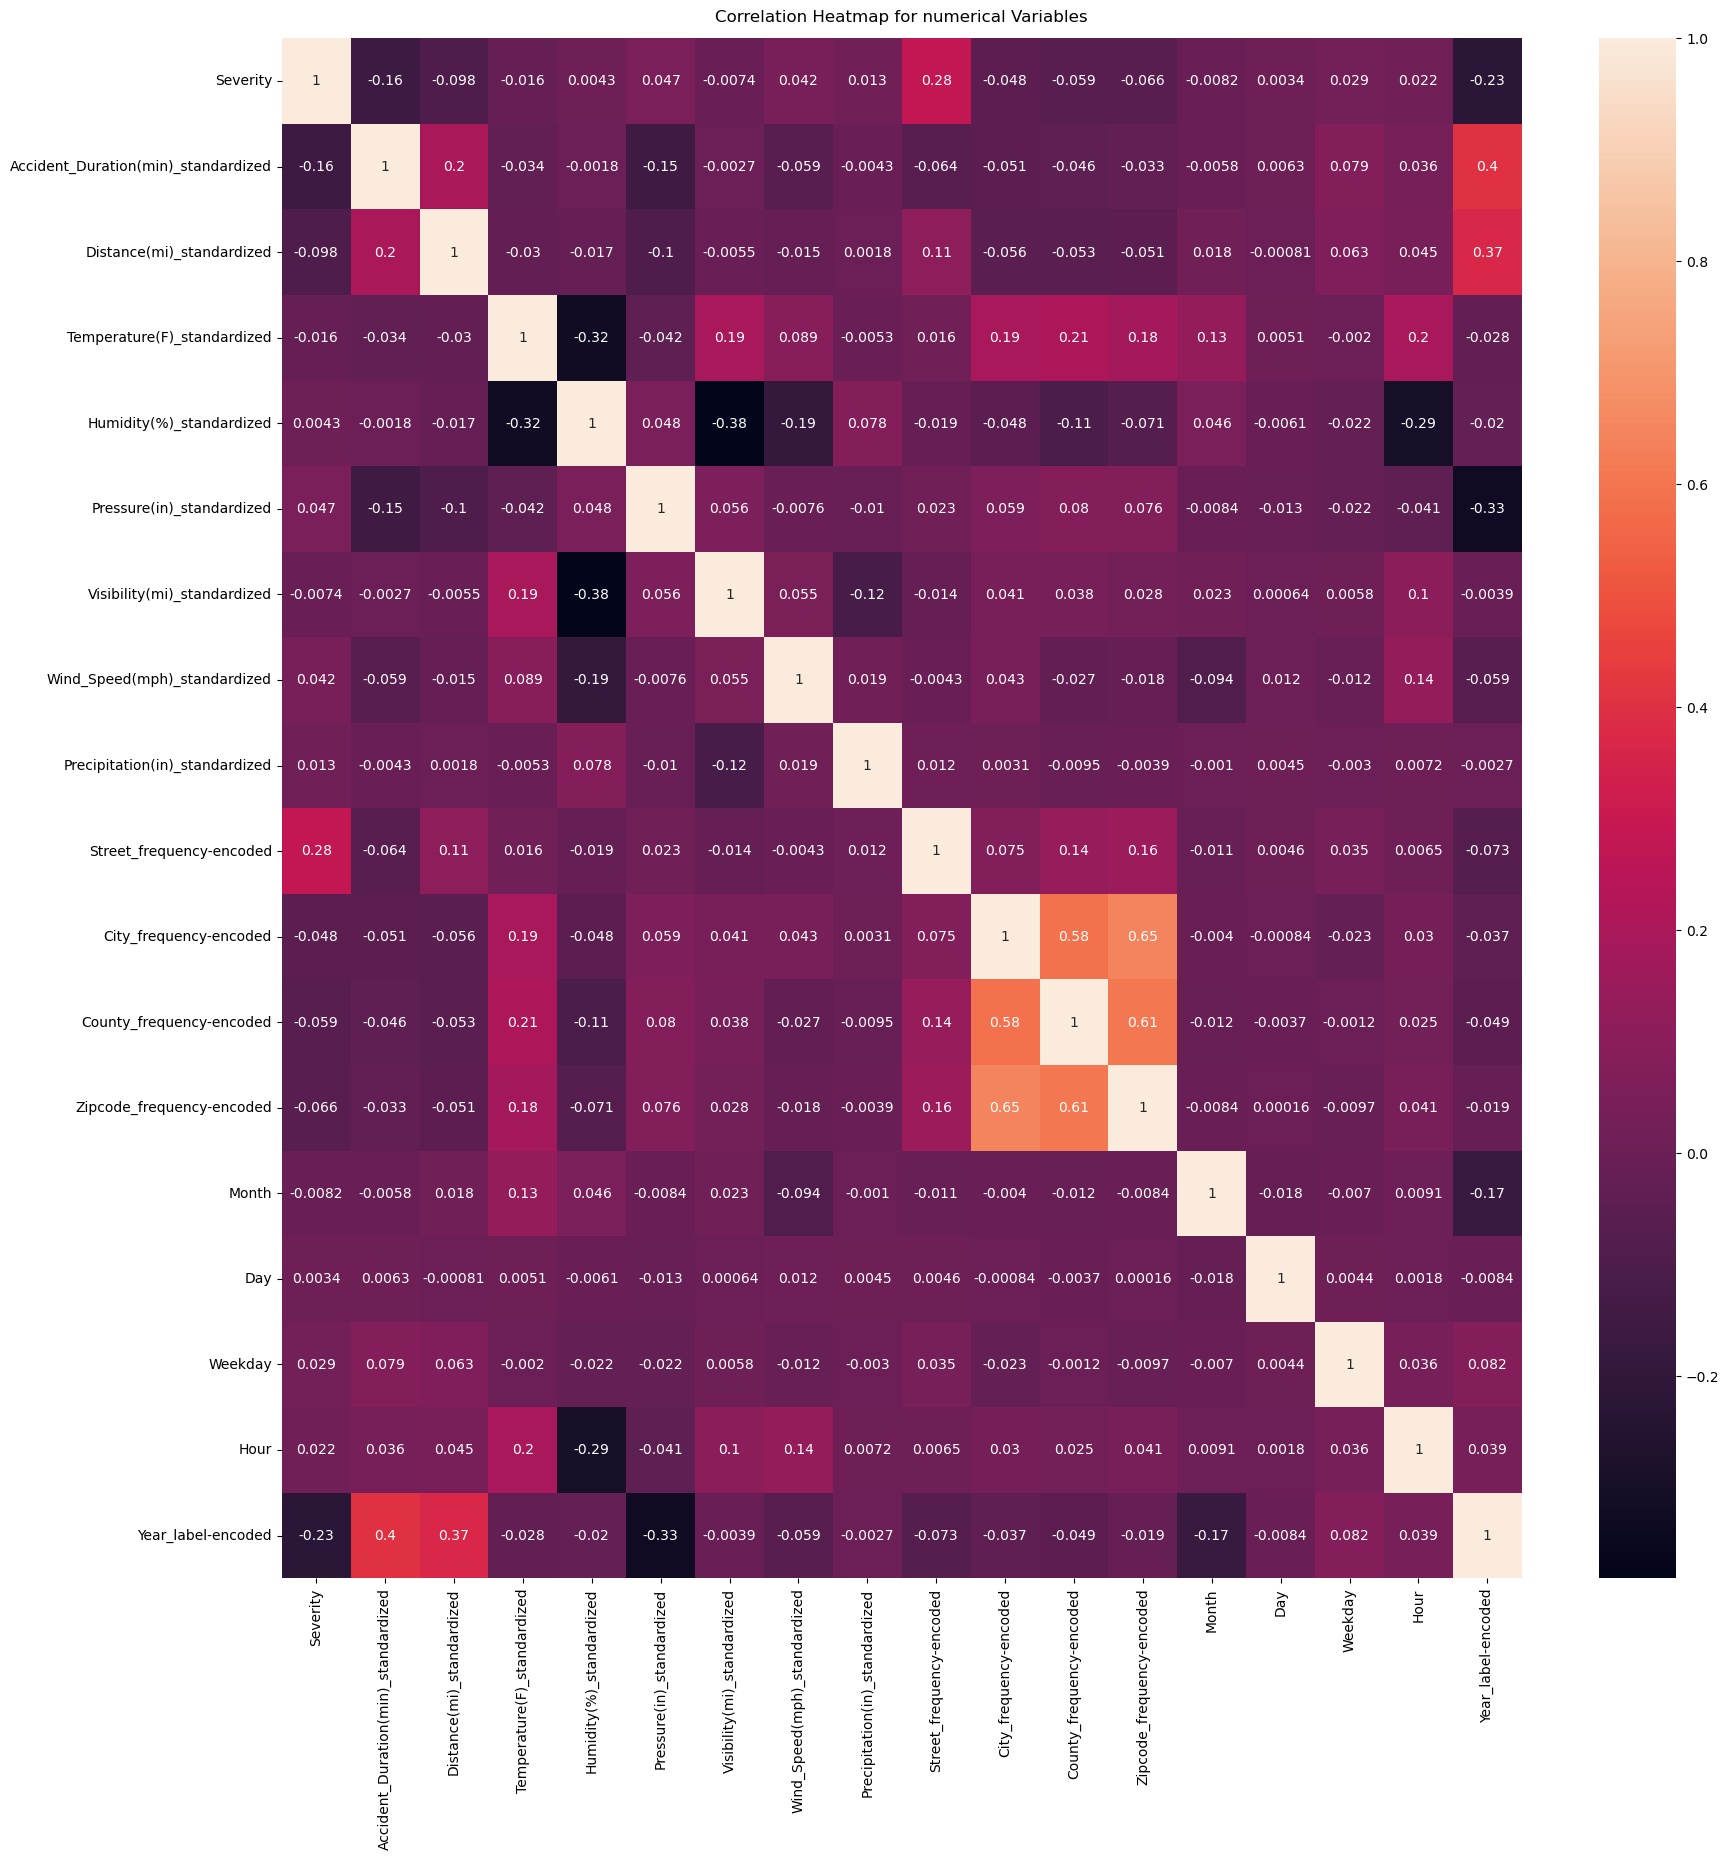

In [86]:
#heat map to find extreme positive and negative correlations
plt.figure(figsize=(20, 20))
sns.heatmap(data[['Severity']+numerical+datetime].corr(), annot=True)
plt.title('Correlation Heatmap for numerical Variables', fontdict={'fontsize':12}, pad=12)

Severity: It has notable positive correlations with Year_label_encoded (0.23) and Street_frequency_encoded (0.28). This might suggest that accidents have become more severe over the years, or there is a particular relevance to the frequency of streets where accidents occur.

Accident_Duration(min)_standardized: Shows a strong negative correlation with Source_label_encoded (-0.64), indicating that different sources might report accidents of varying durations, or the standardization process is affecting this variable significantly.

Distance(mi)_standardized: There's a moderate positive correlation with Year_label_encoded (0.37), potentially indicating that the distances affected by accidents have increased over the years.

Temperature(F)_standardized: Exhibits a moderate negative correlation with Humidity(%)_standardized (-0.32), which is consistent with atmospheric science where temperature and humidity are inversely related under many conditions.

Pressure(in)_standardized: There’s a moderate negative correlation with Year_label_encoded (-0.33), which might imply either a real trend over the years or a change in measurement or standardization processes.

Visibility(mi)_standardized: Has a positive correlation with Temperature(F)_standardized (0.19), as one might expect higher visibility with higher temperatures, often due to less atmospheric moisture content.

Weather-related variables: Wind_Speed(mph)_standardized has a slight positive correlation with Precipitation(in)_standardized (0.19), which could be indicative of more intense weather conditions correlating with higher wind speeds and precipitation levels.

Geographical factors: City_frequency_encoded, County_frequency_encoded, and Zipcode_frequency_encoded show strong positive correlations with each other (ranging from 0.58 to 0.65), reflecting the nested nature of these geographical units.

Time variables: Month, Day, Weekday, and Hour show low to very low correlations with other variables, suggesting these time factors do not have a strong linear relationship with other numerical variables in this set.

Year_label_encoded: Besides the previously mentioned correlations, it also has a strong negative correlation with Source_label_encoded (-0.64), indicating significant changes in source data over time.

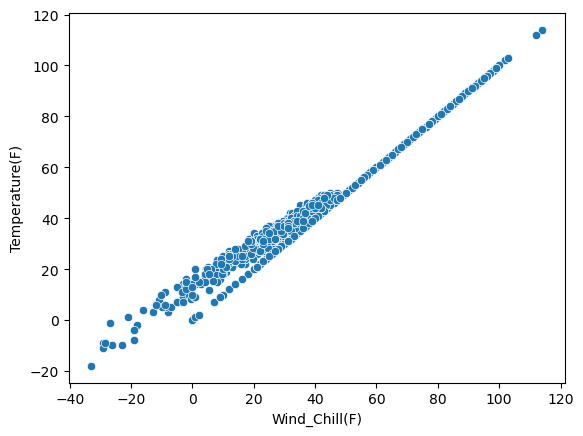

In [23]:
#temperature and wind chill have a 0.99 correlation
#since this dataset is combined from two sources, it looks like each had different methods for recording temperature and wind chill
accident_sample = data.sample(int(len(data)/100))
sns.scatterplot(x='Wind_Chill(F)', y='Temperature(F)', data=accident_sample, palette='Set1')
plt.show()

In [24]:
#view sorted Weather_Conditions to determine changes to be made
weather_condition = data.Weather_Condition.unique().astype('str')
weather_condition.sort()
weather_condition

array(['Blowing Dust', 'Blowing Dust / Windy', 'Blowing Snow',
       'Blowing Snow / Windy', 'Clear', 'Cloudy', 'Cloudy / Windy',
       'Drifting Snow / Windy', 'Drizzle', 'Drizzle / Windy',
       'Drizzle and Fog', 'Fair', 'Fair / Windy', 'Fog', 'Fog / Windy',
       'Freezing Drizzle', 'Freezing Rain', 'Funnel Cloud', 'Hail',
       'Haze', 'Haze / Windy', 'Heavy Drizzle', 'Heavy Freezing Drizzle',
       'Heavy Rain', 'Heavy Rain / Windy', 'Heavy Sleet', 'Heavy Snow',
       'Heavy Snow / Windy', 'Heavy T-Storm', 'Heavy T-Storm / Windy',
       'Heavy Thunderstorms and Rain', 'Ice Pellets',
       'Light Blowing Snow', 'Light Drizzle', 'Light Drizzle / Windy',
       'Light Freezing Drizzle', 'Light Freezing Fog',
       'Light Freezing Rain', 'Light Freezing Rain / Windy', 'Light Hail',
       'Light Haze', 'Light Ice Pellets', 'Light Rain',
       'Light Rain / Windy', 'Light Rain Shower',
       'Light Rain Shower / Windy', 'Light Rain Showers',
       'Light Rain with Thunder

In [25]:
#make changes to Weather_Condition since some entries are similar
data.Weather_Condition = data.Weather_Condition.replace('Thunder','Thunderstorm')
data.Weather_Condition = data.Weather_Condition.replace('T-Storm','Thunderstorm')
data.Weather_Condition = data.Weather_Condition.replace('Heavy T-Storm','Heavy Thunderstorm')

data.Weather_Condition = data.Weather_Condition.replace('T-Storm / Windy','Thunderstorm / Windy')
data.Weather_Condition = data.Weather_Condition.replace('Heavy T-Storm / Windy','Heavy Thunderstorm / Windy')
data.Weather_Condition = data.Weather_Condition.replace('Thunder / Windy','Thunderstorm / Windy')

data.Weather_Condition = data.Weather_Condition.replace('Heavy Rain Shower','Heavy Rain')
data.Weather_Condition = data.Weather_Condition.replace('Heavy Rain Showers','Heavy Rain')

data.Weather_Condition = data.Weather_Condition.replace('Light Rain Shower','Light Rain')
data.Weather_Condition = data.Weather_Condition.replace('Light Rain Showers','Light Rain')

data.Weather_Condition = data.Weather_Condition.replace('Rain Shower','Rain')
data.Weather_Condition = data.Weather_Condition.replace('Rain Showers','Rain')

In [26]:
# Clear Conditions
data.loc[data['Weather_Condition'].str.contains('Fair|Clear', case=False, na=False), 'Weather_Condition'] = 'Clear'

# Cloud Conditions
data.loc[data['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na=False), 'Weather_Condition'] = 'Cloudy'

# Fog Conditions
data.loc[data['Weather_Condition'].str.contains('Fog|Dust|Haze|Smoke|Volcanic Ash|Mist|Sand', case=False, na=False), 'Weather_Condition'] = 'Haze'

# Hail Conditions
data.loc[data['Weather_Condition'].str.contains('Hail', case=False, na=False), 'Weather_Condition'] = 'Hail'

# Heavy Snow Conditions
data.loc[data['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na=False), 'Weather_Condition'] = 'Heavy Snow'

# Heavy Rain Conditions
data.loc[data['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Thunderstorm|Heavy Drizzle|Thunder', case=False, na=False), 'Weather_Condition'] = 'Heavy Rain'

# Rain Conditions (not heavy)
data.loc[data['Weather_Condition'].str.contains('Rain|Drizzle|Shower', case=False, na=False), 'Weather_Condition'] = 'Rain'

# Snow Conditions (not heavy)
data.loc[data['Weather_Condition'].str.contains('Snow|Sleet|Ice|Wintry', case=False, na=False), 'Weather_Condition'] = 'Snow'

In [27]:
data.Weather_Condition.unique()

array(['Clear', 'Snow', 'Rain', 'Cloudy', 'Haze', nan,
       'N/A Precipitation', 'Hail', 'Tornado'], dtype=object)

In [28]:
#view unique values of Wind_Direction
data.Wind_Direction.unique()

array(['NW', 'W', 'ENE', 'CALM', 'SW', 'VAR', 'S', 'E', 'WSW', 'NNE',
       'Variable', 'West', 'N', 'ESE', 'NNW', 'North', 'SSW', 'WNW', 'NE',
       'Calm', 'SE', 'East', 'SSE', 'South', nan], dtype=object)

In [29]:
data.loc[data['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
data.loc[(data['Wind_Direction']=='West'),'Wind_Direction'] = 'W'
data.loc[(data['Wind_Direction']=='WSW')|(data['Wind_Direction']=='WNW'),'Wind_Direction'] = 'NW'
data.loc[(data['Wind_Direction']=='WSW'),'Wind_Direction'] = 'SW'
data.loc[(data['Wind_Direction']=='South')|(data['Wind_Direction']=='SSW')|(data['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
data.loc[(data['Wind_Direction']=='North')|(data['Wind_Direction']=='NNW')|(data['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
data.loc[(data['Wind_Direction']=='East')|(data['Wind_Direction']=='ESE')|(data['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
data.loc[(data['Wind_Direction']=='ENE'),'Wind_Direction'] = 'NE'
data.loc[(data['Wind_Direction']=='ESE'),'Wind_Direction'] = 'SE'
data.loc[data['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", data['Wind_Direction'].unique())

Wind Direction after simplification:  ['NW' 'W' 'E' 'CALM' 'SW' 'VAR' 'S' 'N' 'NE' 'SE' nan]


In [30]:
#N/A Precipitation must mean virtually no rain
data[data.Weather_Condition == 'N/A Precipitation']['Precipitation(in)'].mean()

0.007233009708737865

In [31]:
#replace N/A Precipitation with NaN
data.Weather_Condition = data.Weather_Condition.replace('N/A Precipitation', np.NaN)

In [32]:
#replace missing temperature data with wind chill
tempnull = np.array(data[np.isnan(data['Temperature(F)'])].index)
for idx in tempnull:
    data.loc[idx, 'Temperature(F)'] = data.loc[idx, 'Wind_Chill(F)']

data.drop(columns=['Wind_Chill(F)'], axis=1, inplace=True)
numerical.remove('Wind_Chill(F)')

In [33]:
#make all zipcodes 5 digit
zipcodes = pd.DataFrame(data[[not a for a in data['Zipcode'].isna()]]['Zipcode'].str[:5])
zipindex = np.array(data[data.Zipcode.notnull()].index)
data.loc[zipindex,'Zipcode'] = zipcodes.loc[:,'Zipcode']

In [34]:
#variables to impute with median
median_impute = ['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
for i in median_impute:
  data[i] = data.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.median()))
  print( i + " : " + data[i].isnull().sum().astype(str))
  
# drop na
data = data.dropna(subset=median_impute)

Temperature(F) : 2890
Humidity(%) : 2899
Pressure(in) : 2895
Visibility(mi) : 4363
Wind_Speed(mph) : 4442
Precipitation(in) : 14468


In [35]:
#variables to impute with mode
from collections import Counter
mode_impute = ['Wind_Direction','Weather_Condition']
print("Count of missing values that will be dropped: ")
for i in mode_impute:
  data[i] = data.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
  print(i + " : " + data[i].isnull().sum().astype(str))

# drop na
data = data.dropna(subset=mode_impute)

Count of missing values that will be dropped: 
Wind_Direction : 1998
Weather_Condition : 1545


In [36]:
#data = data.drop(columns=["End_Lng", "End_Lat"], axis=0)
data= data.dropna(subset = ['Timezone','Street','City', 'Zipcode', 'County', 'Airport_Code',
                            'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight',
                            'Description'])

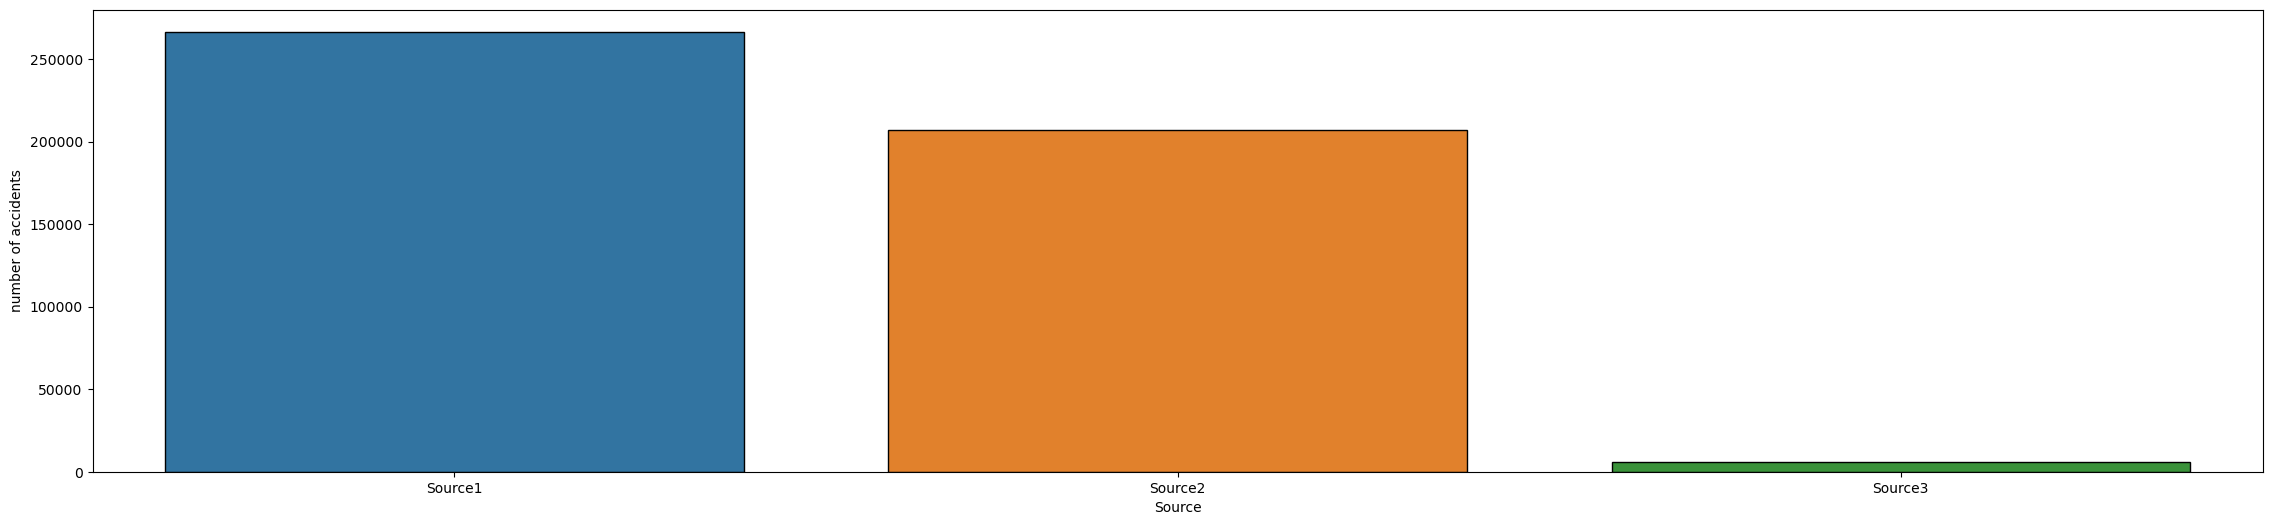

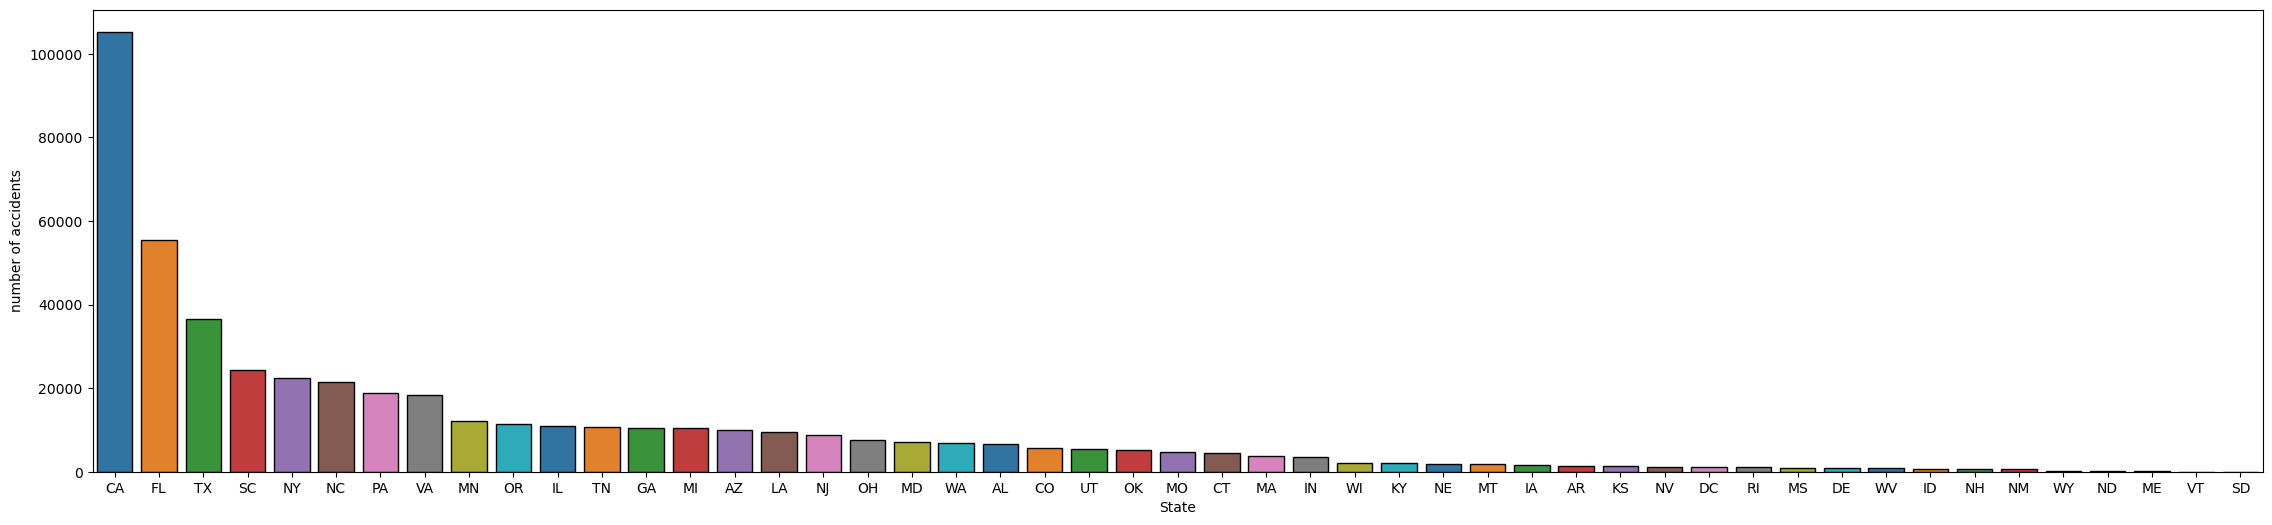

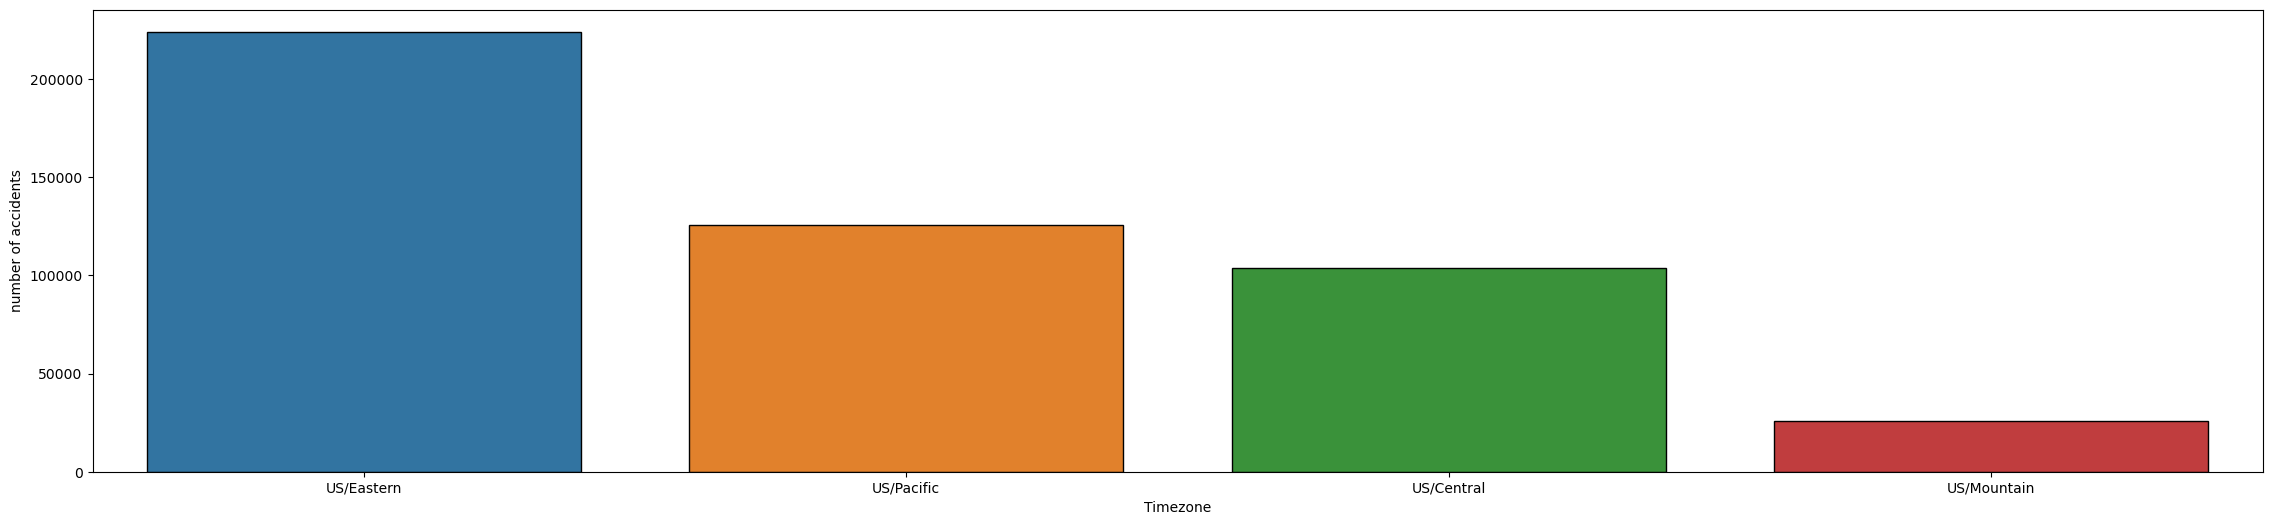

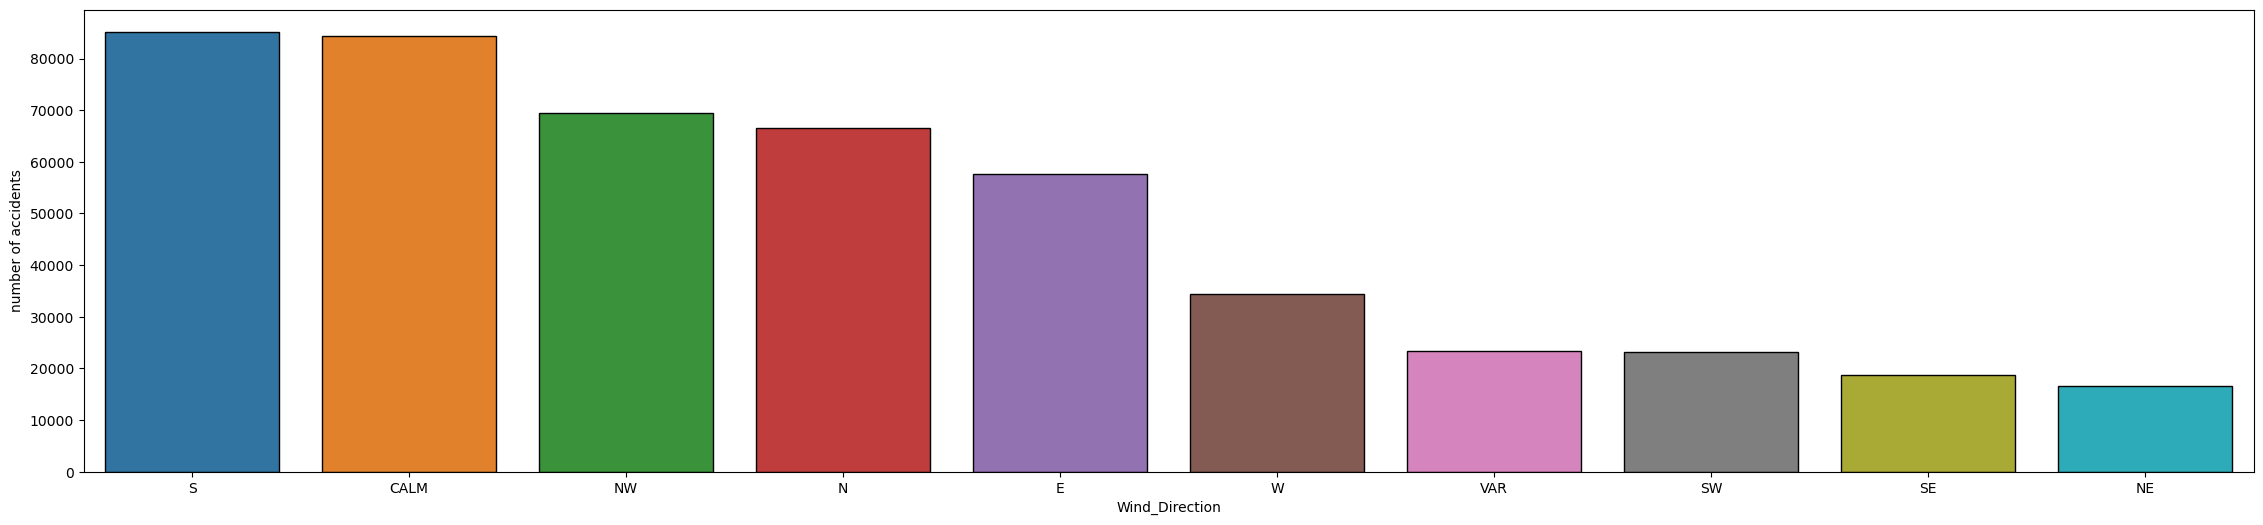

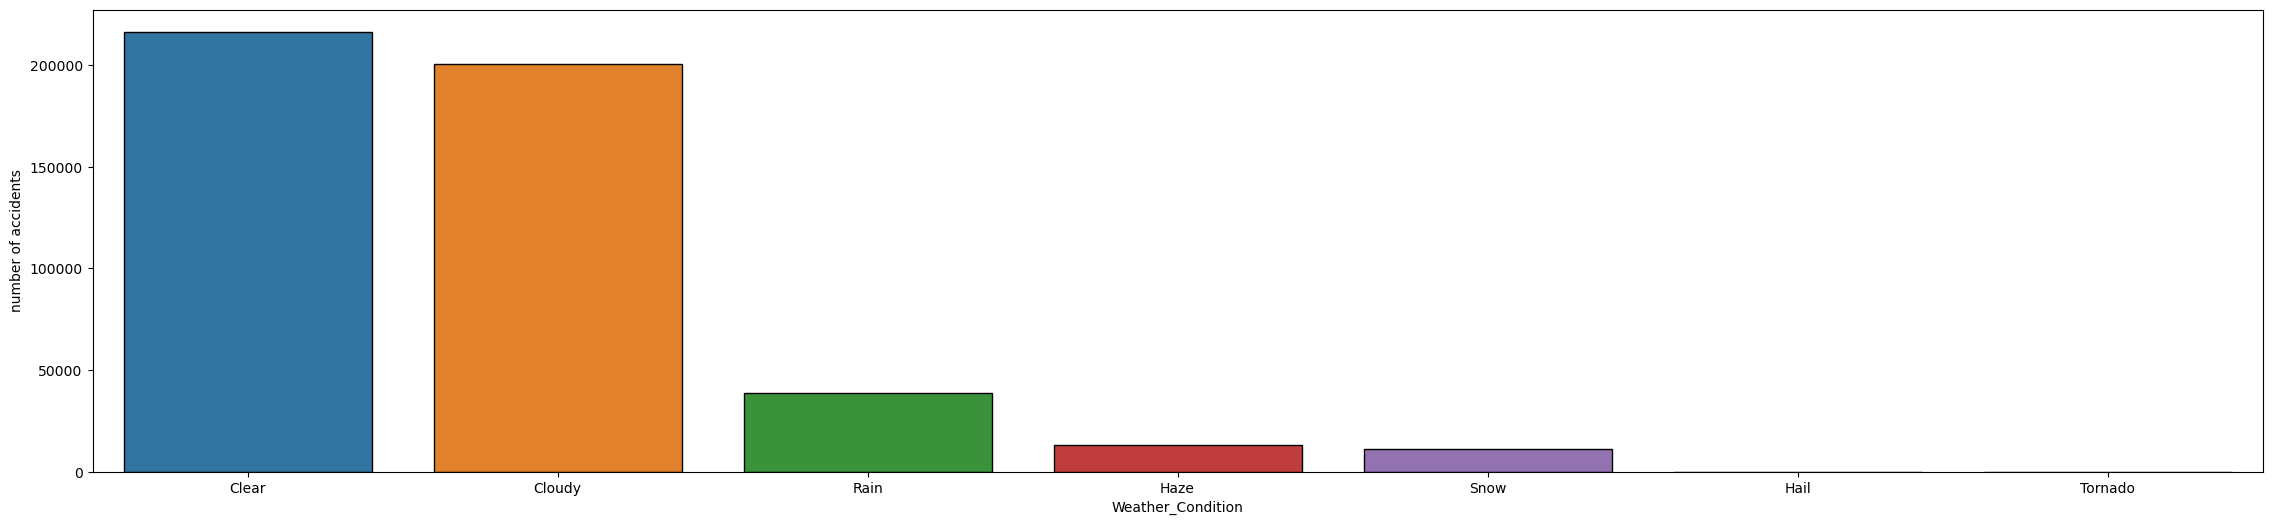

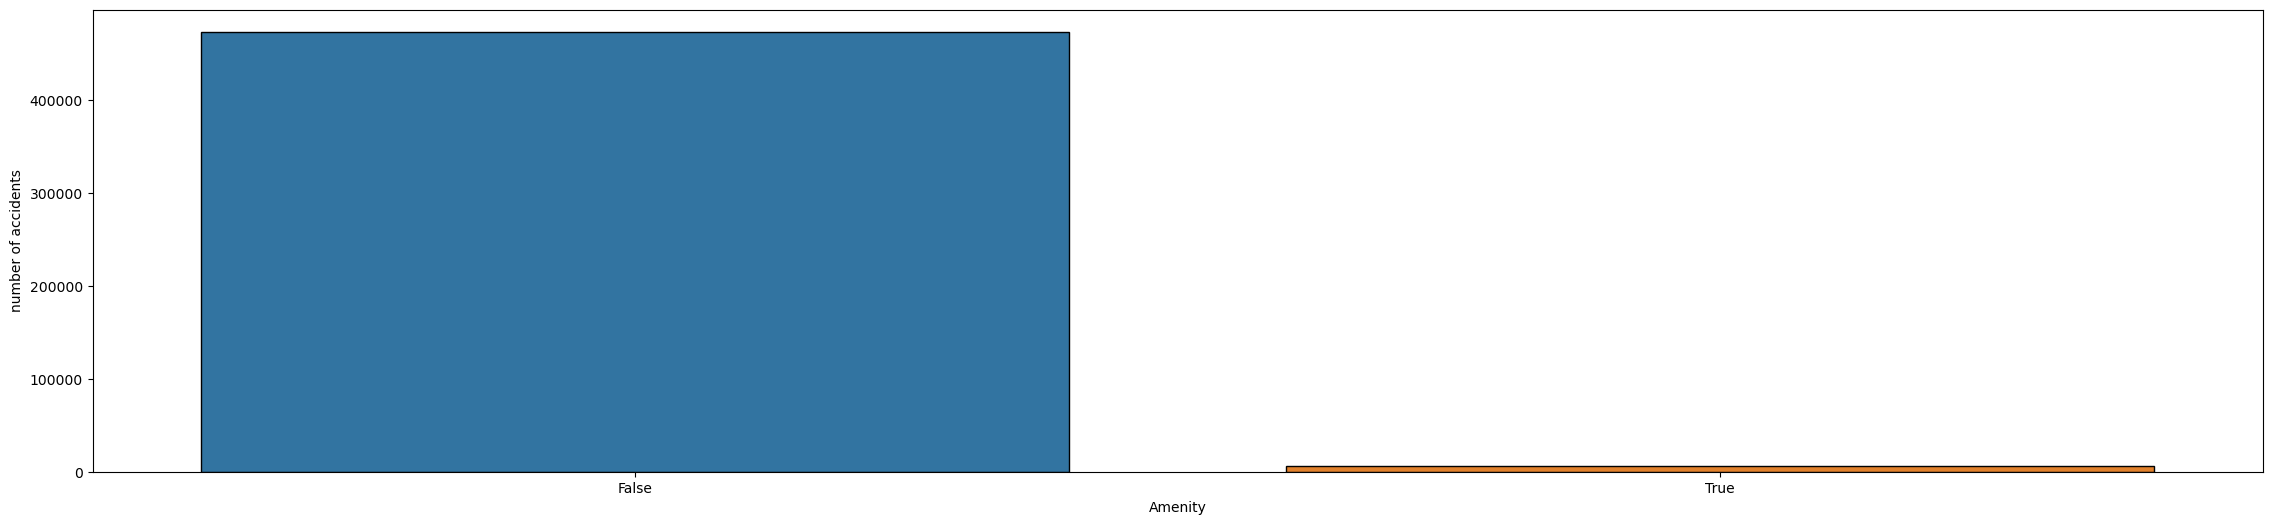

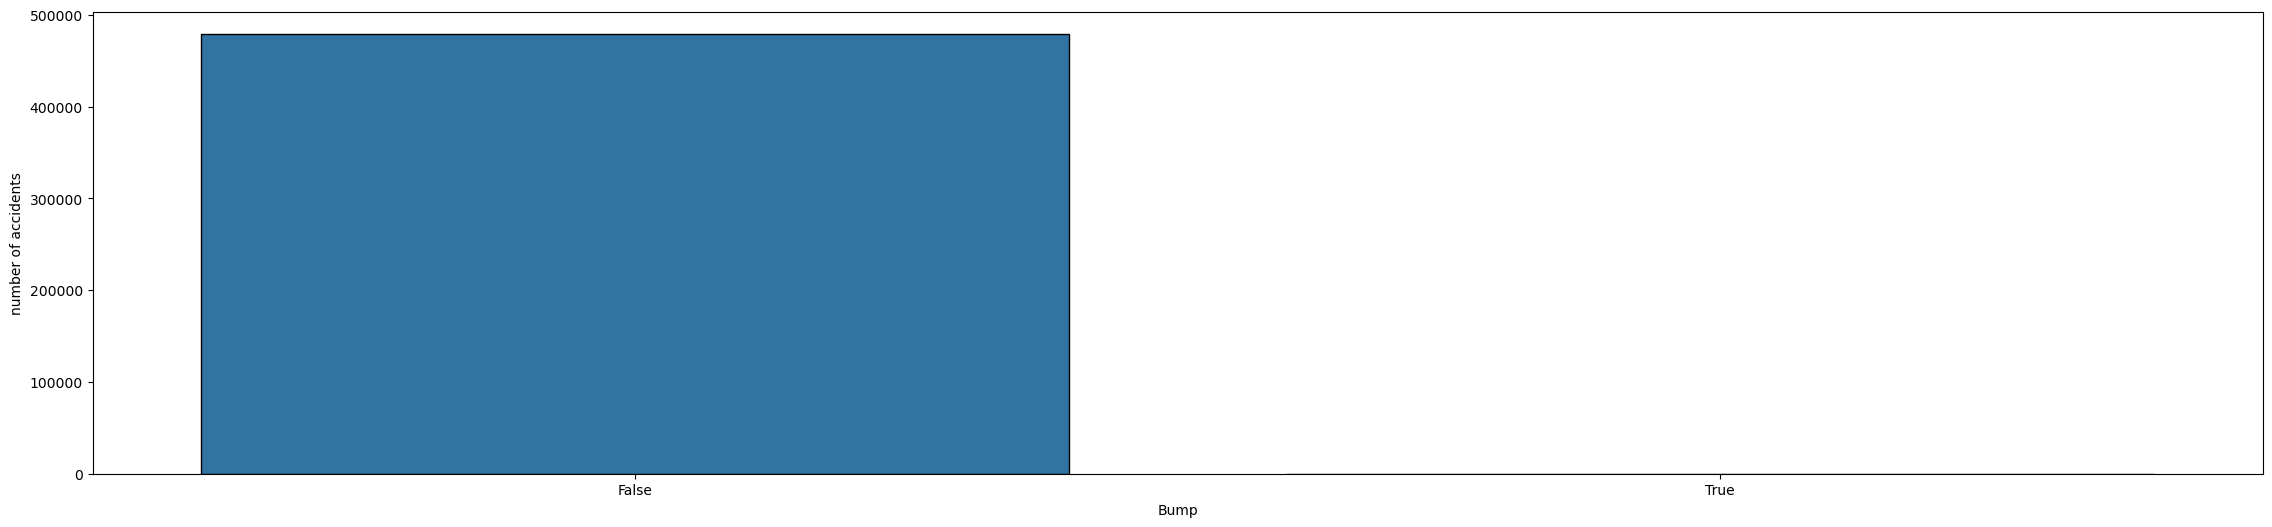

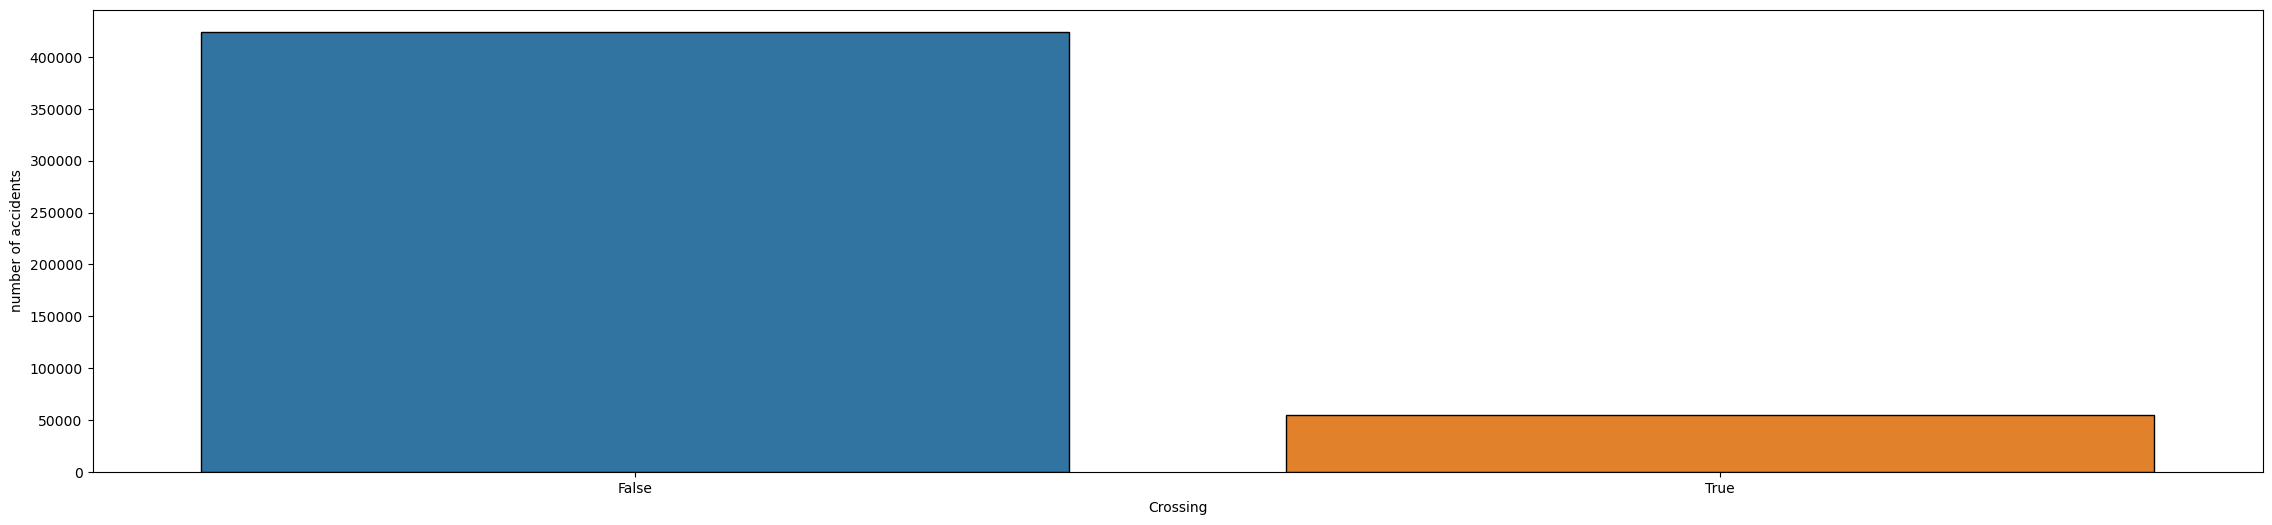

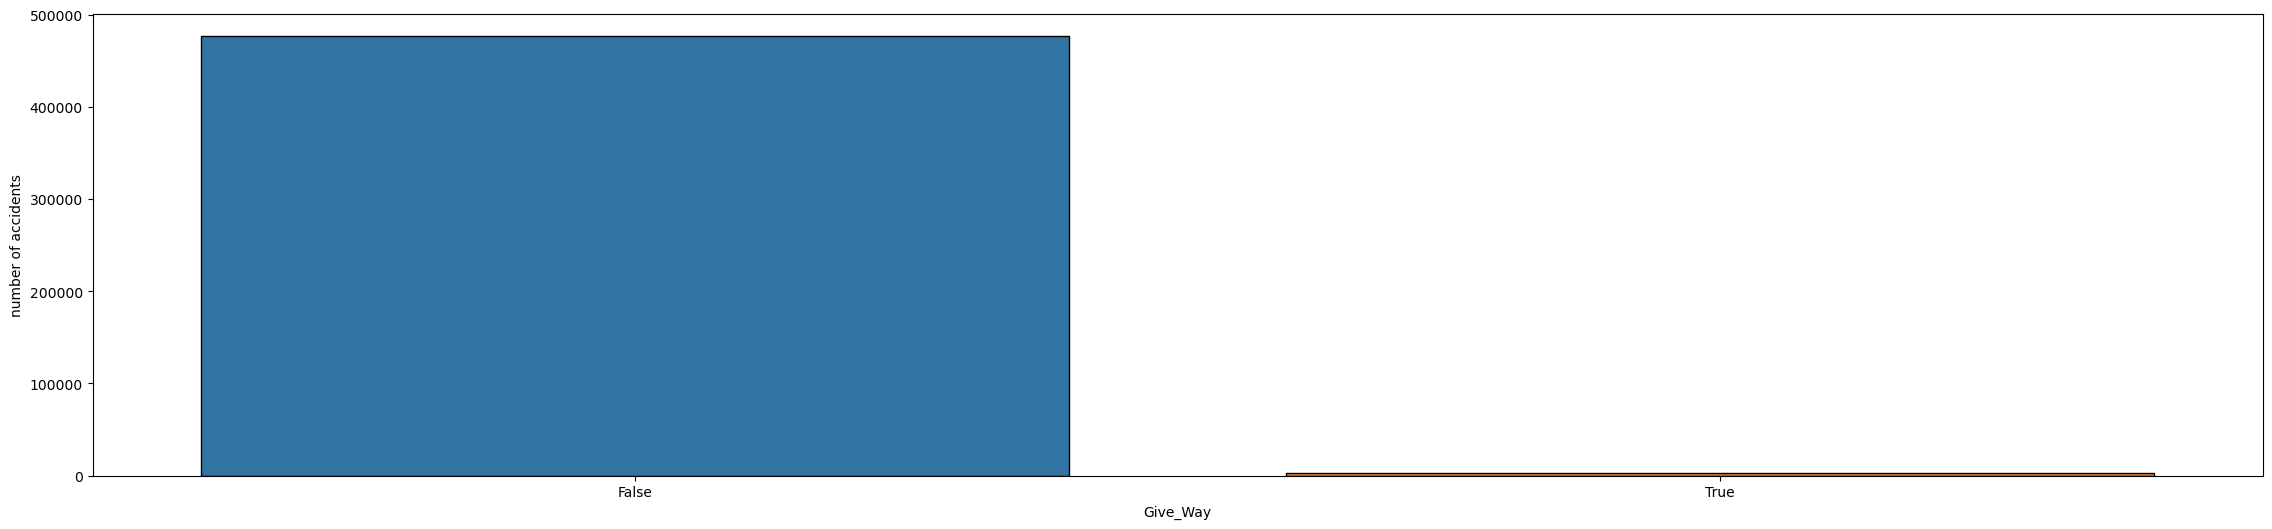

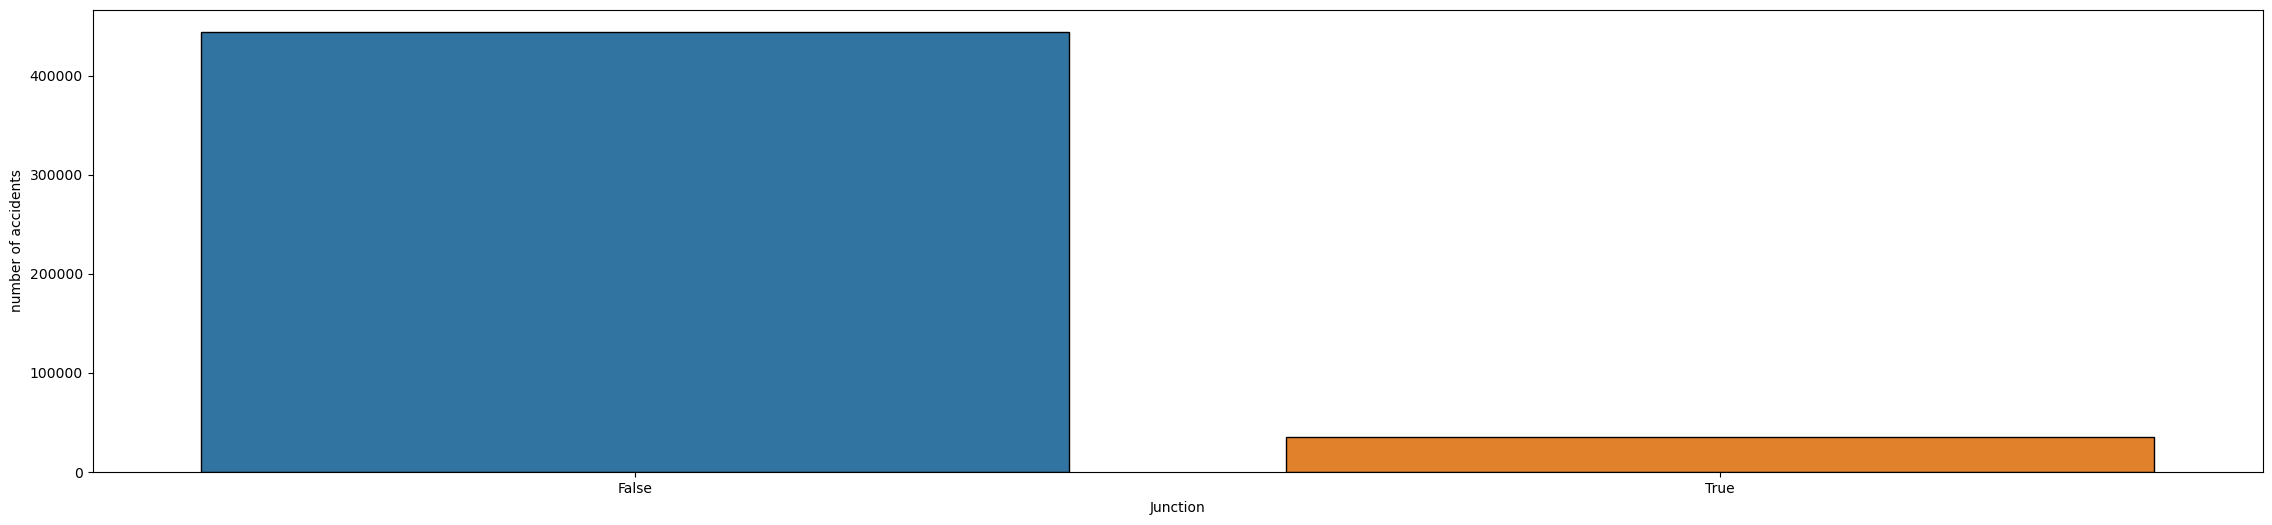

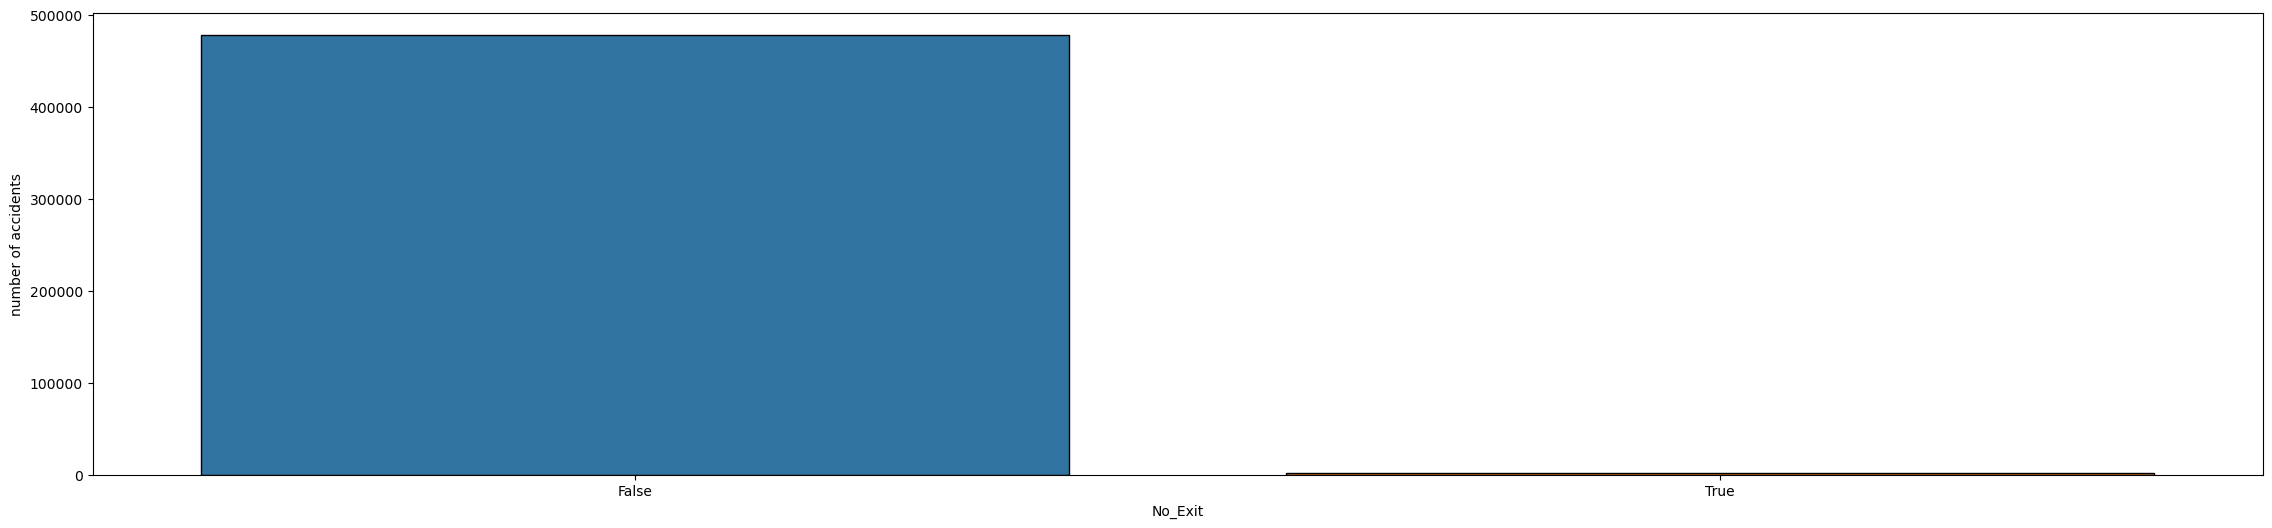

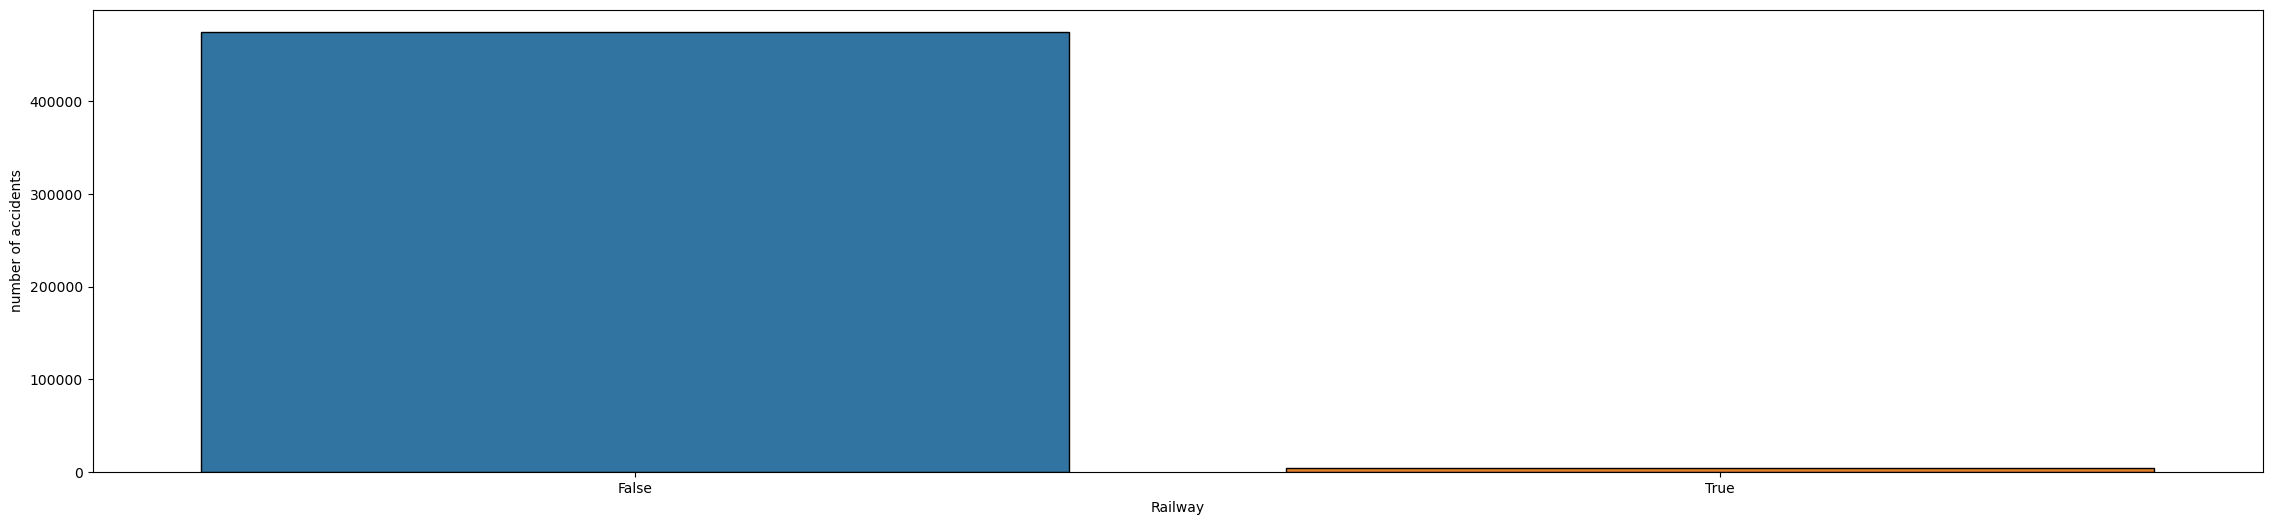

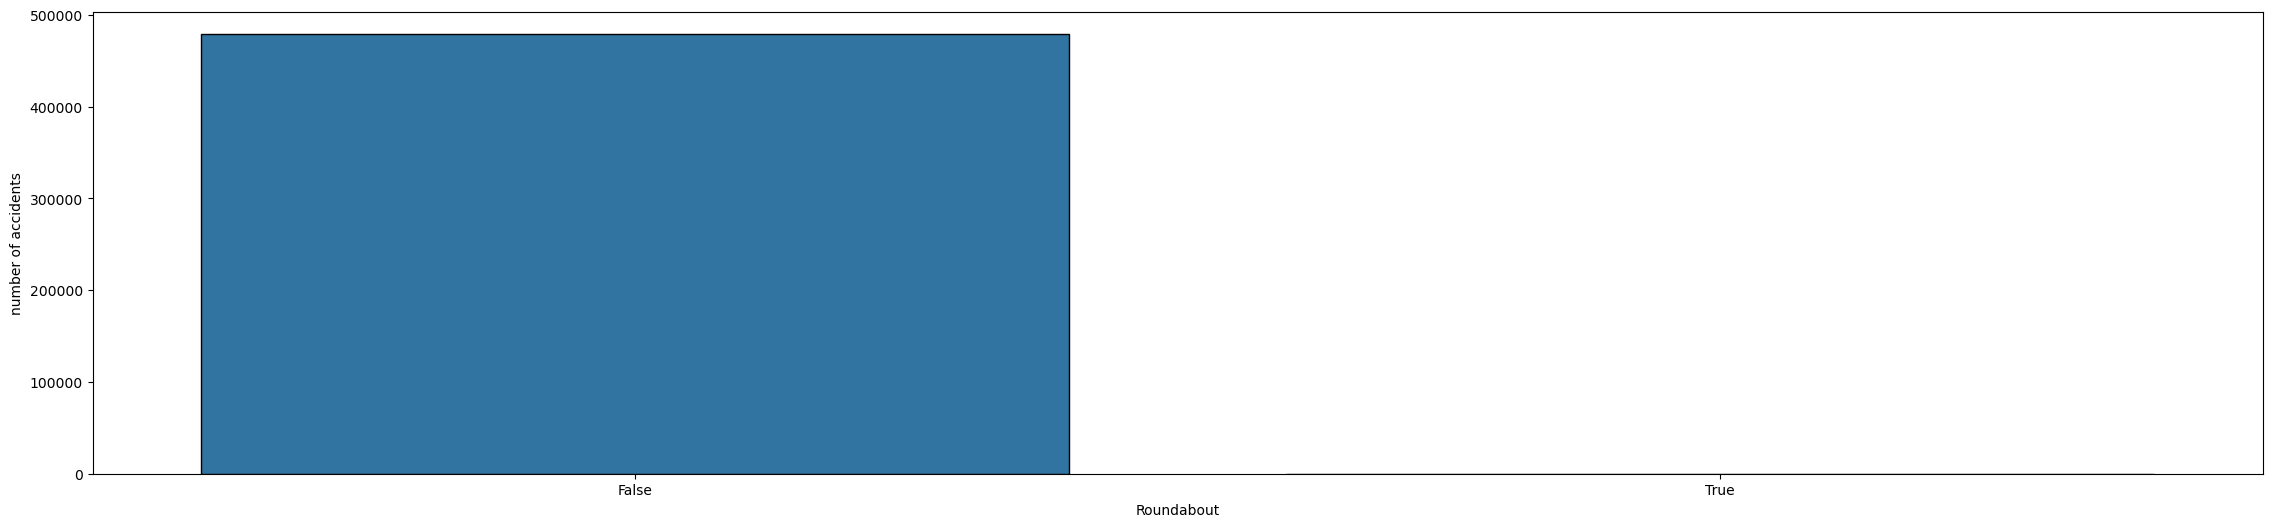

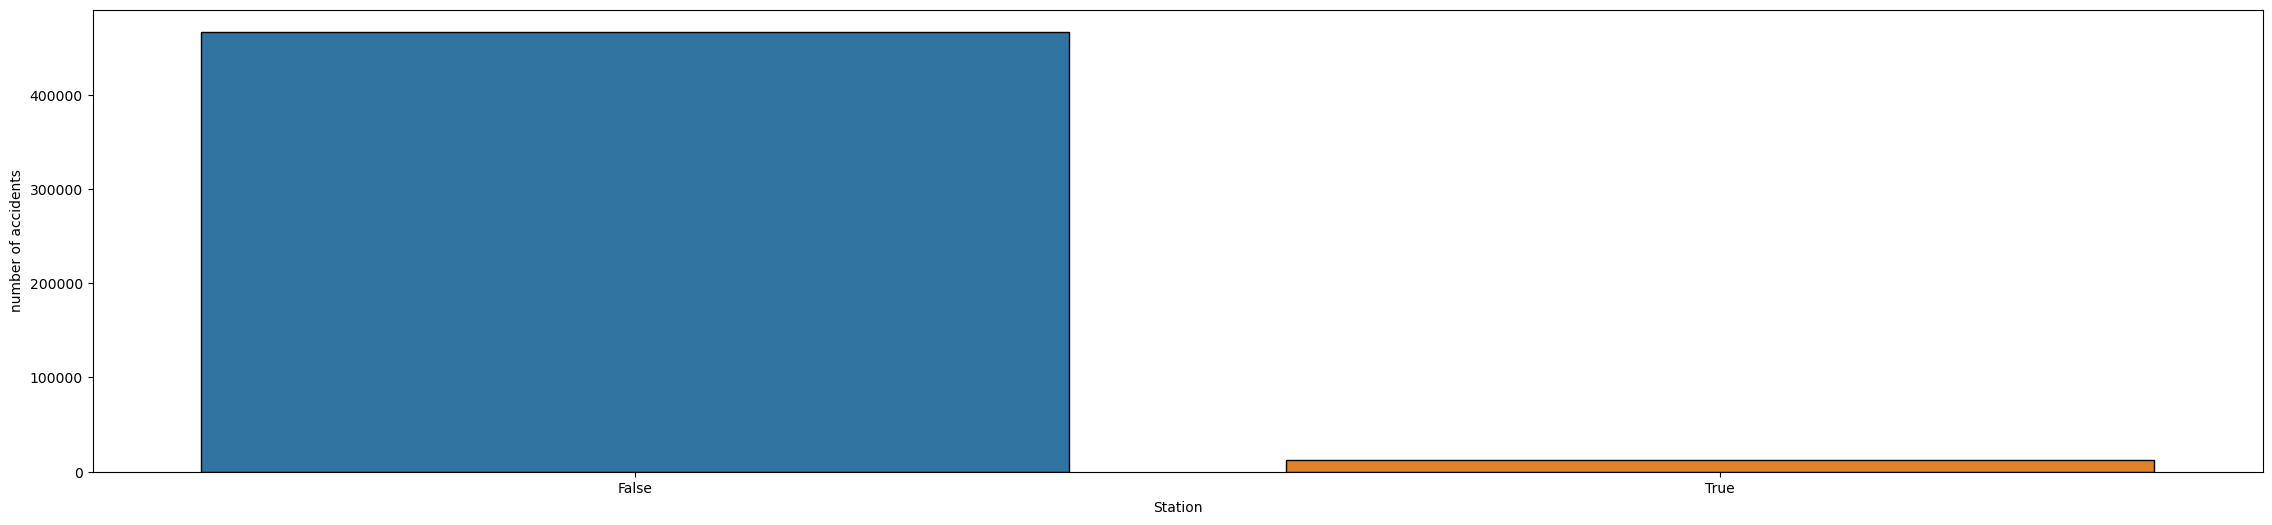

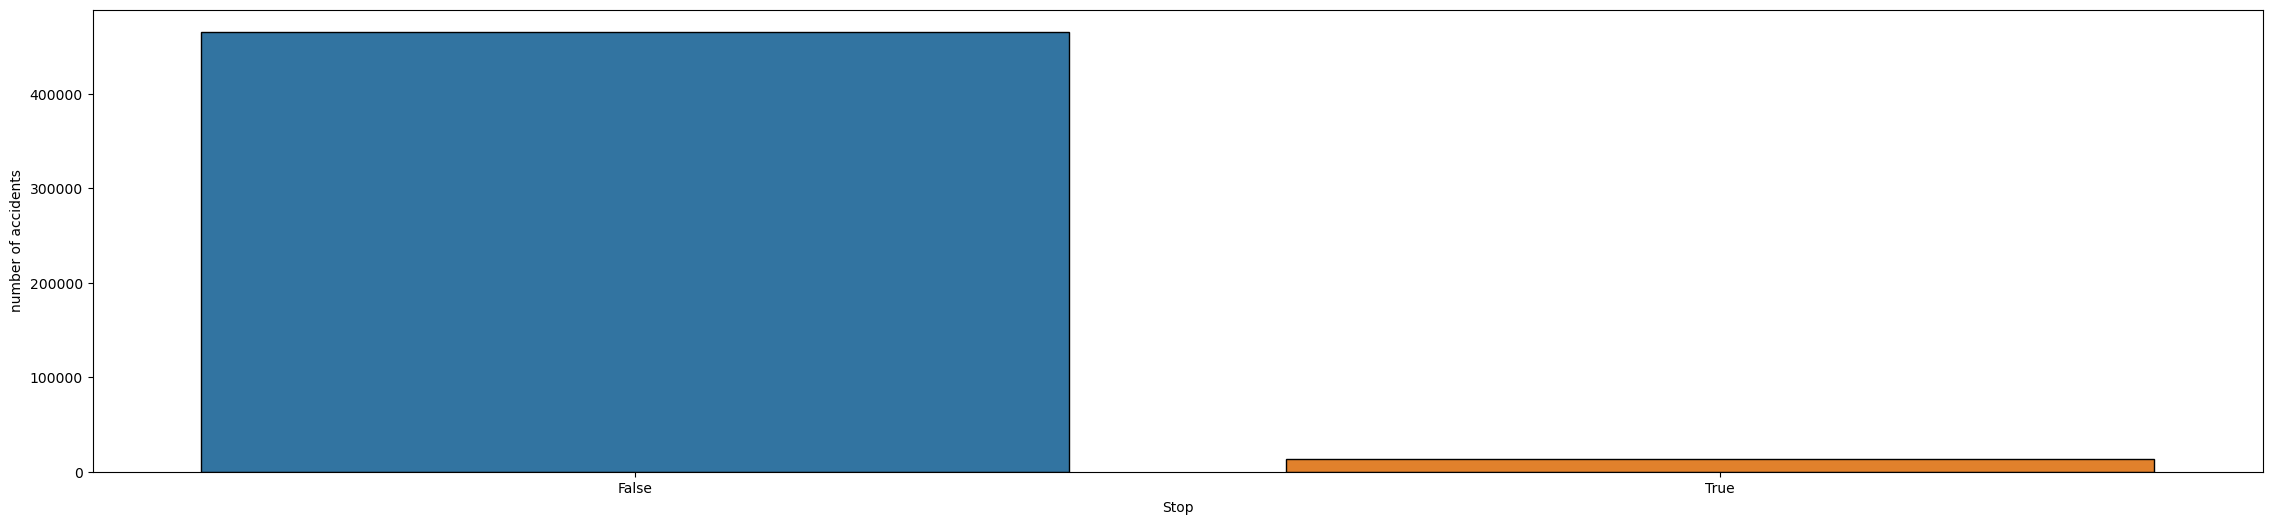

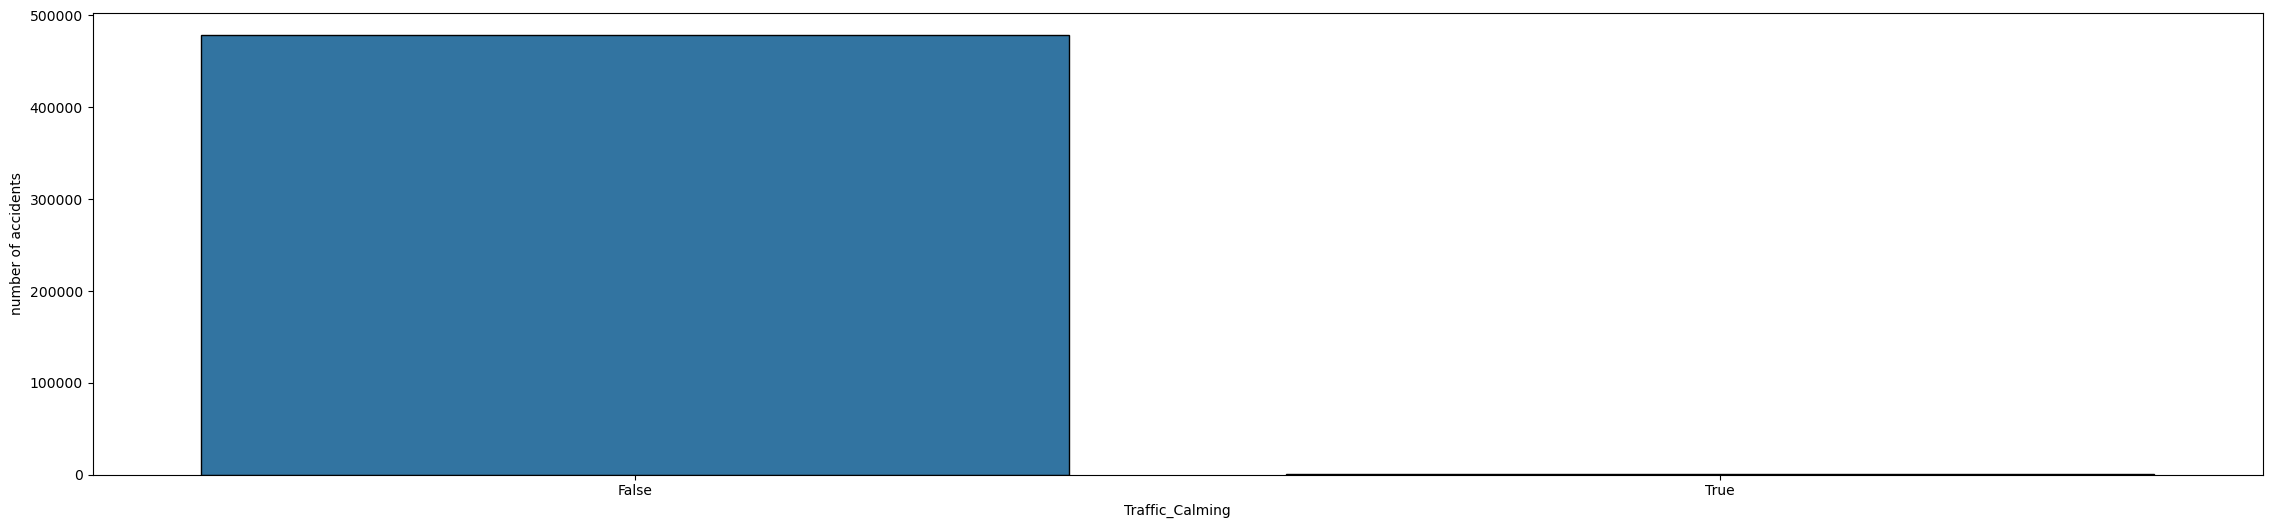

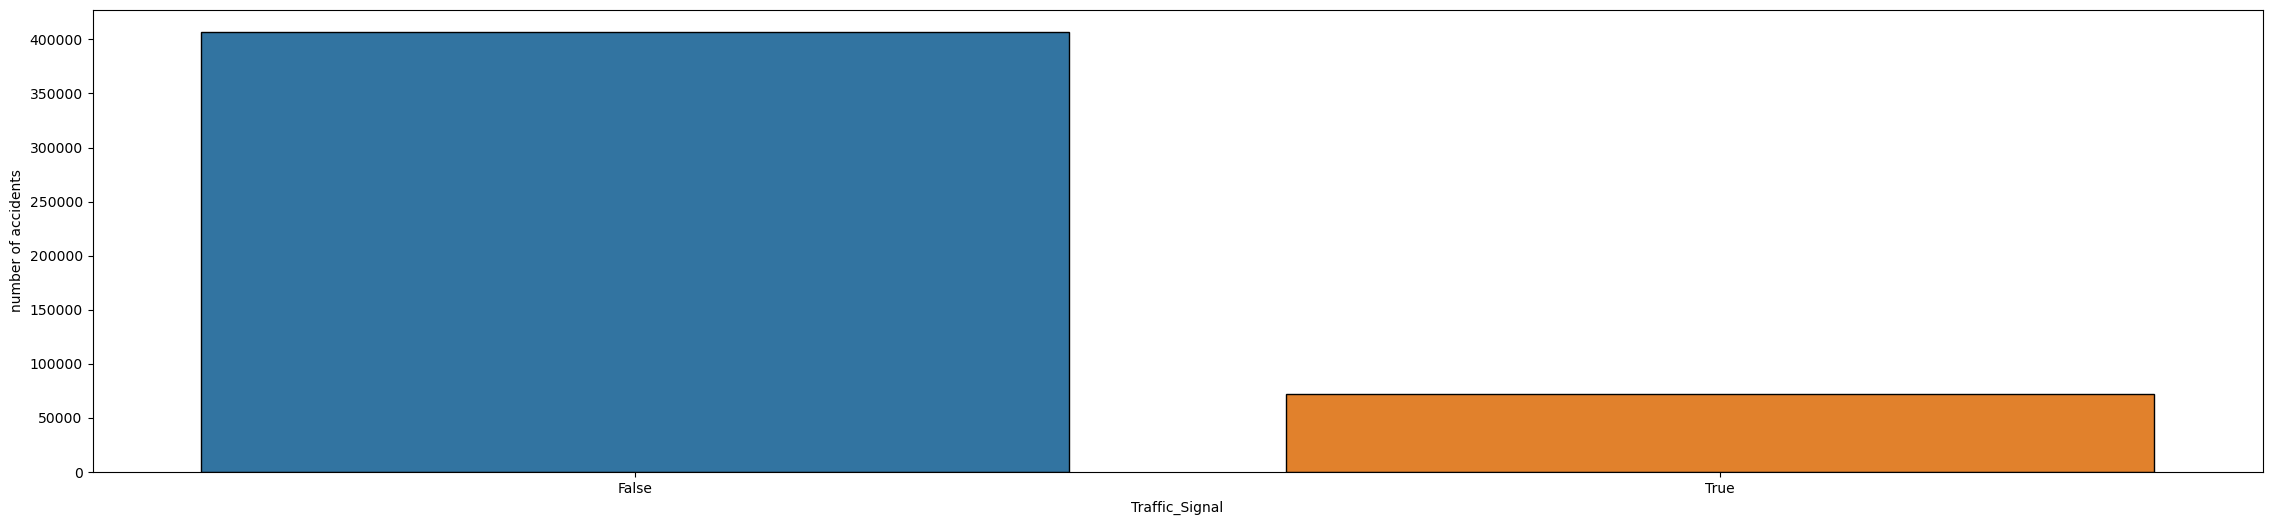

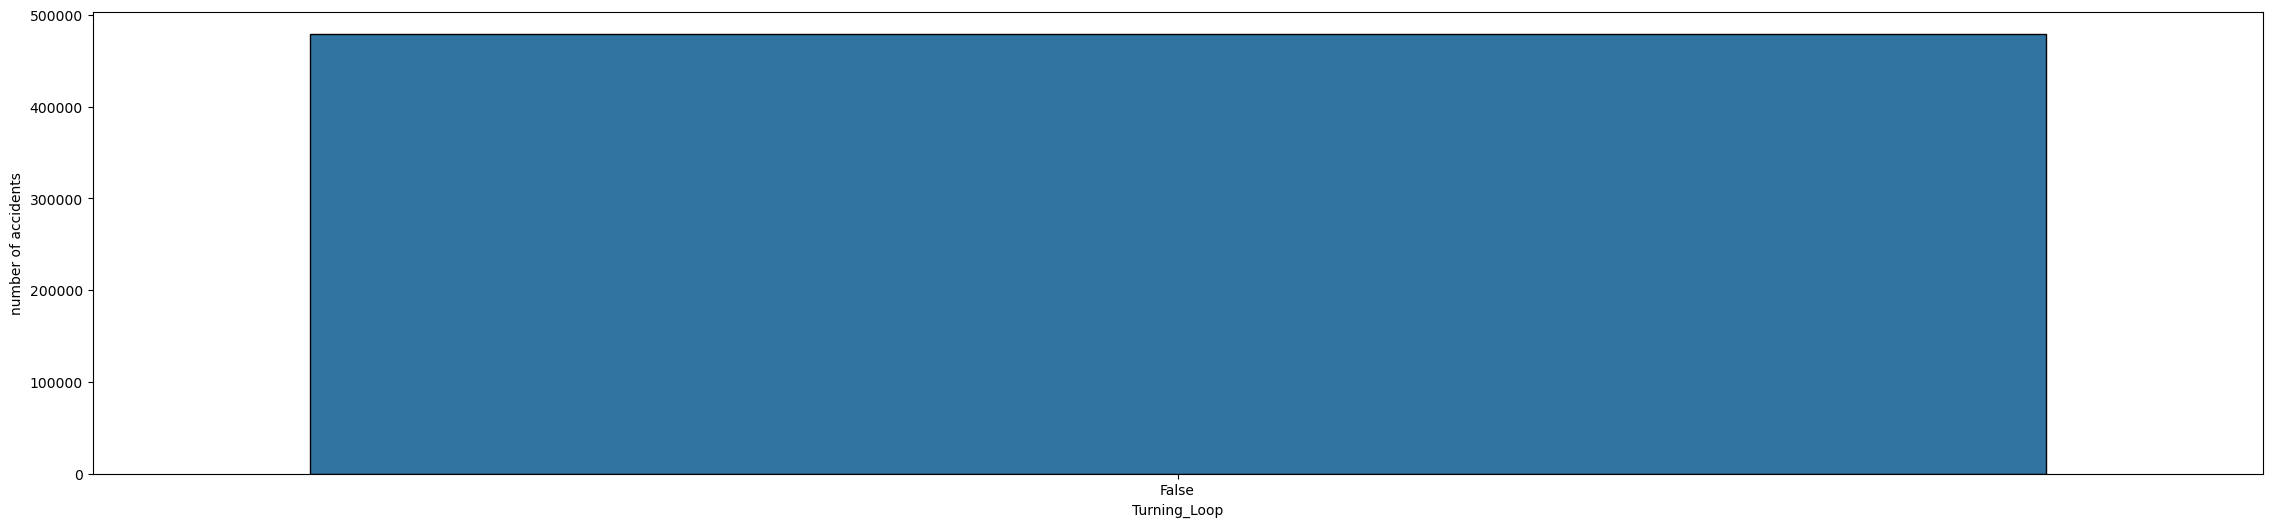

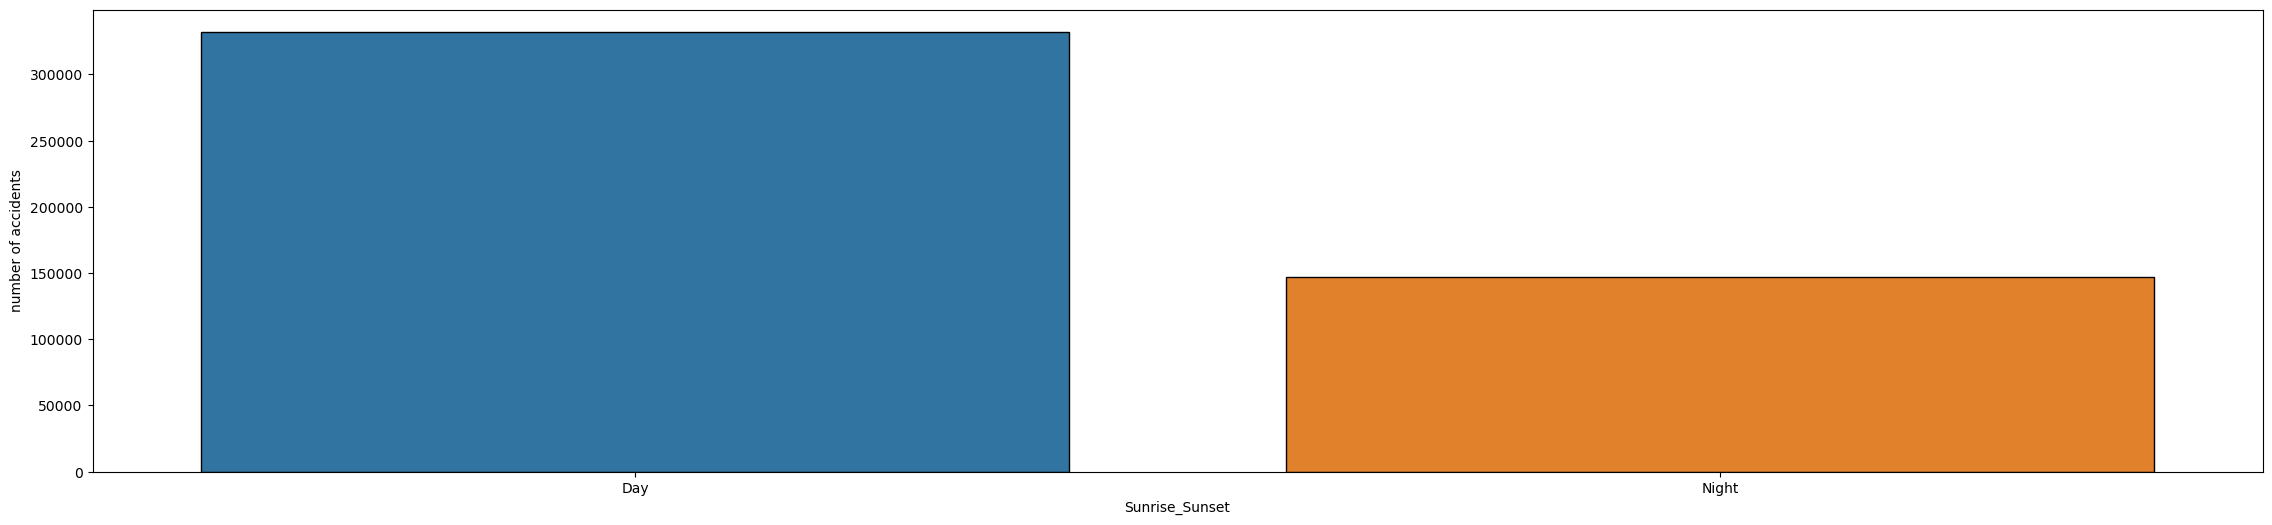

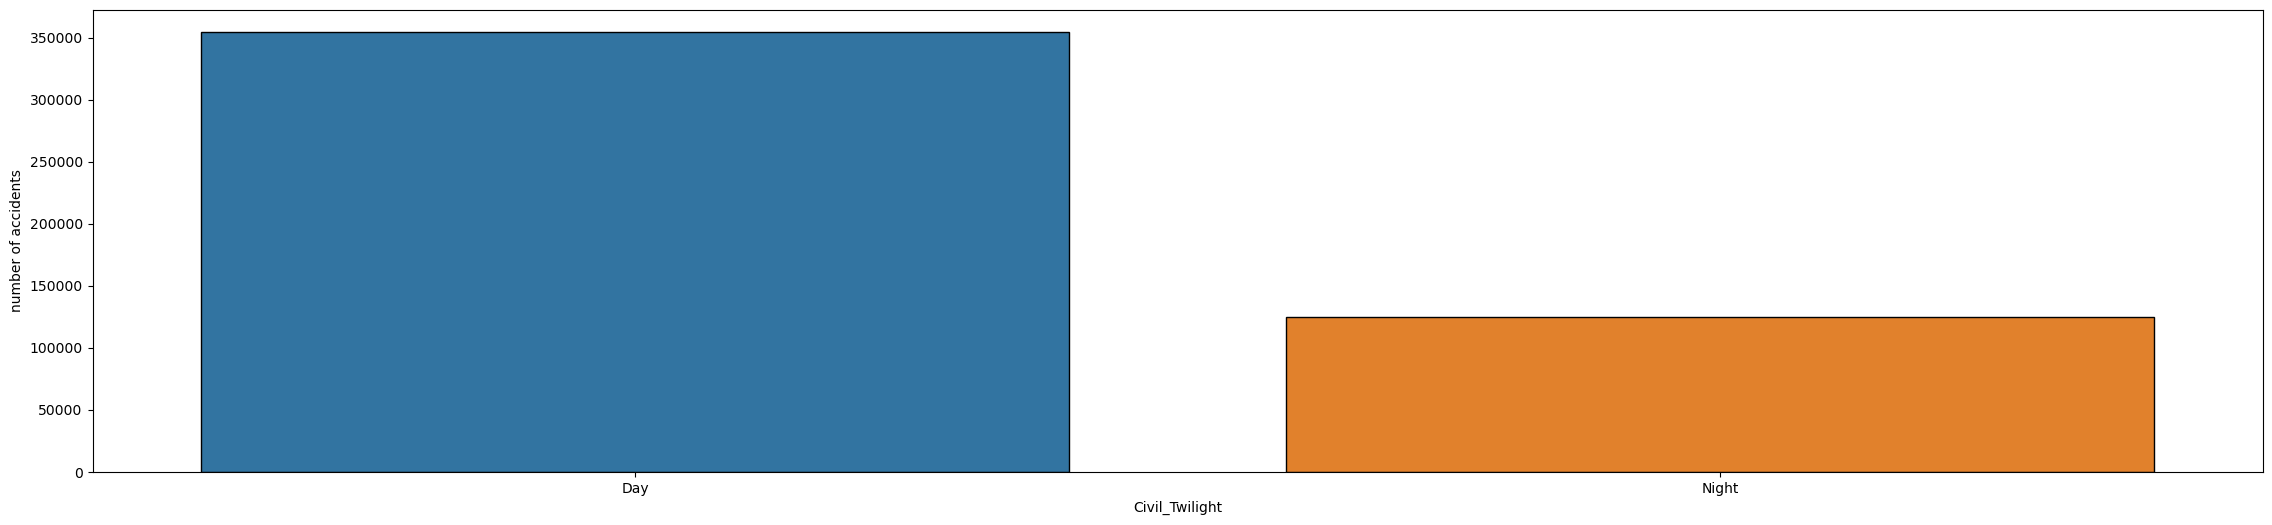

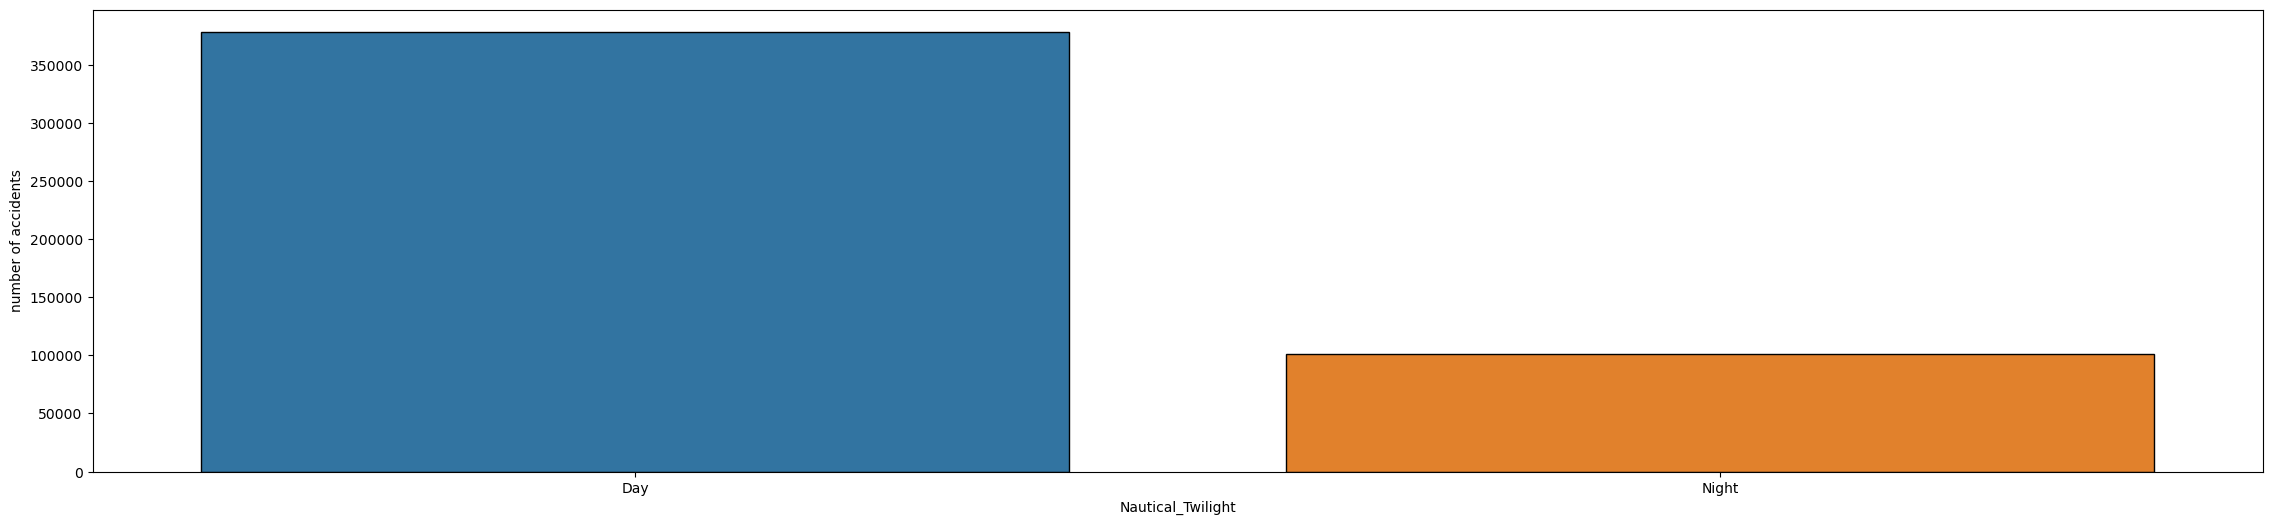

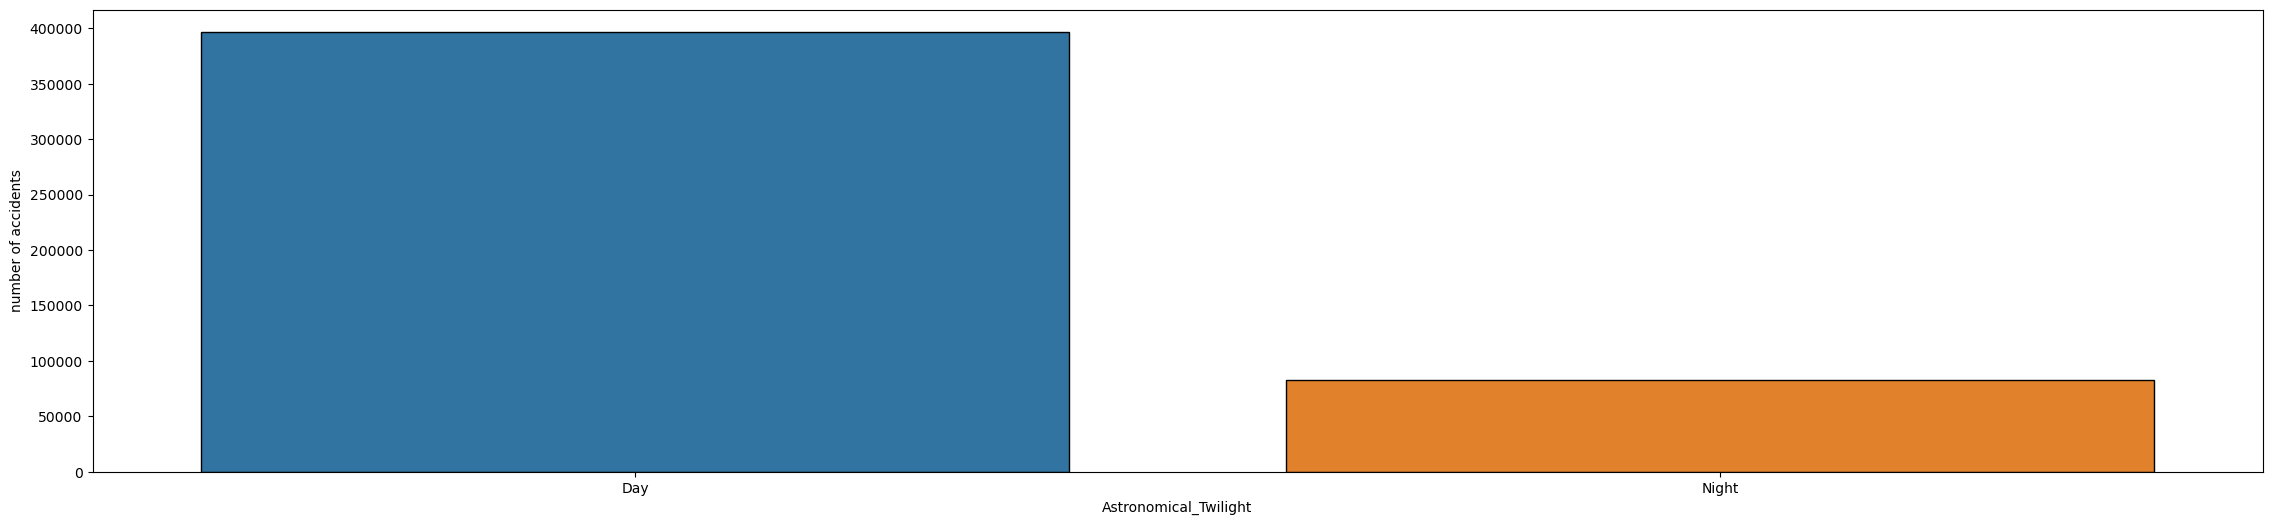

In [37]:
#histograms for categorical data
for i in data[categorical].columns:
    plt.figure(figsize=(28, 6))
    sns.barplot(edgecolor='black',x=data[categorical][i].value_counts().index,y=data[categorical][i].value_counts(),
                palette = sns.color_palette(n_colors=accident_sample[categorical][i].nunique()))
    plt.xlabel(i)
    plt.ylabel('number of accidents')
    plt.show()

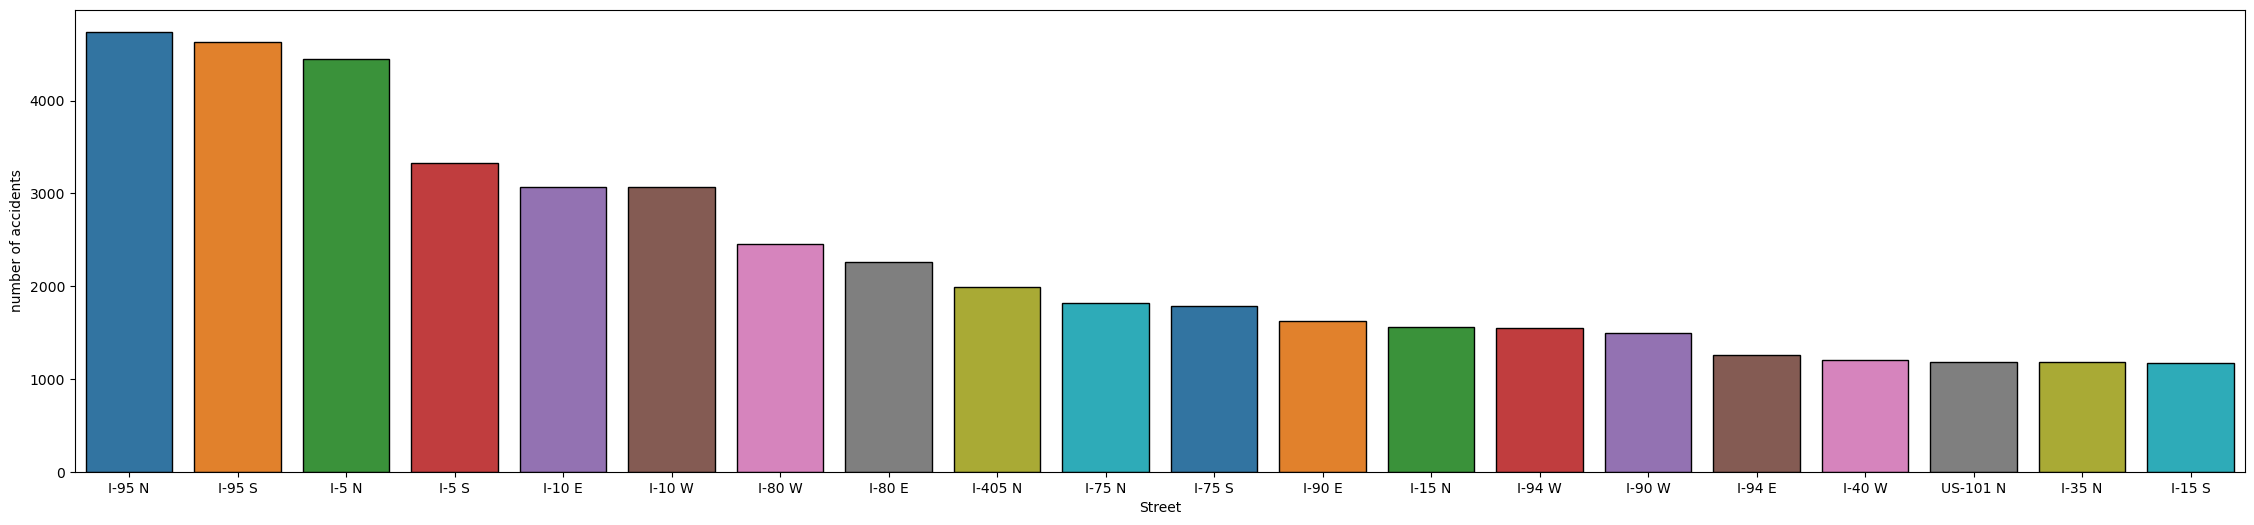

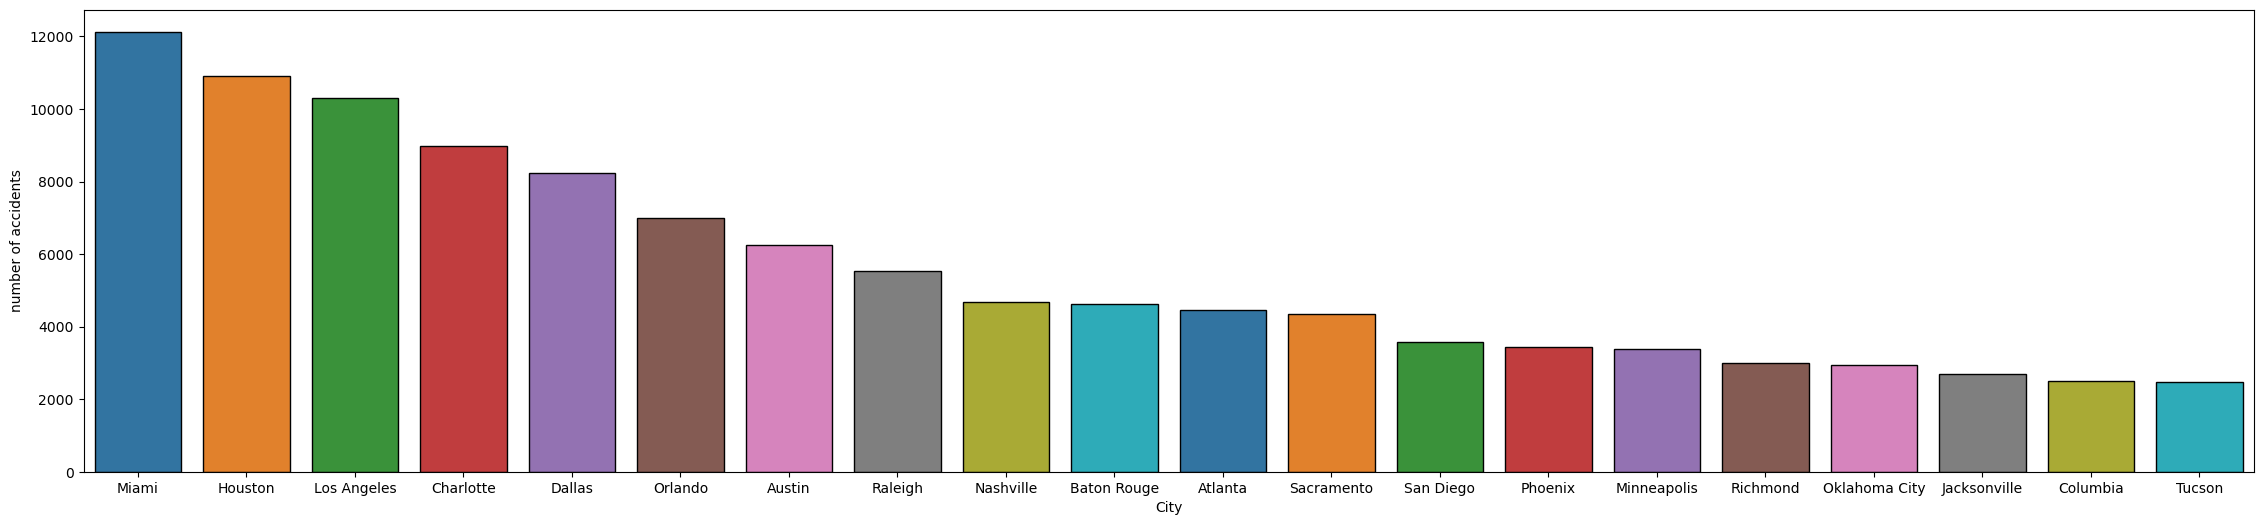

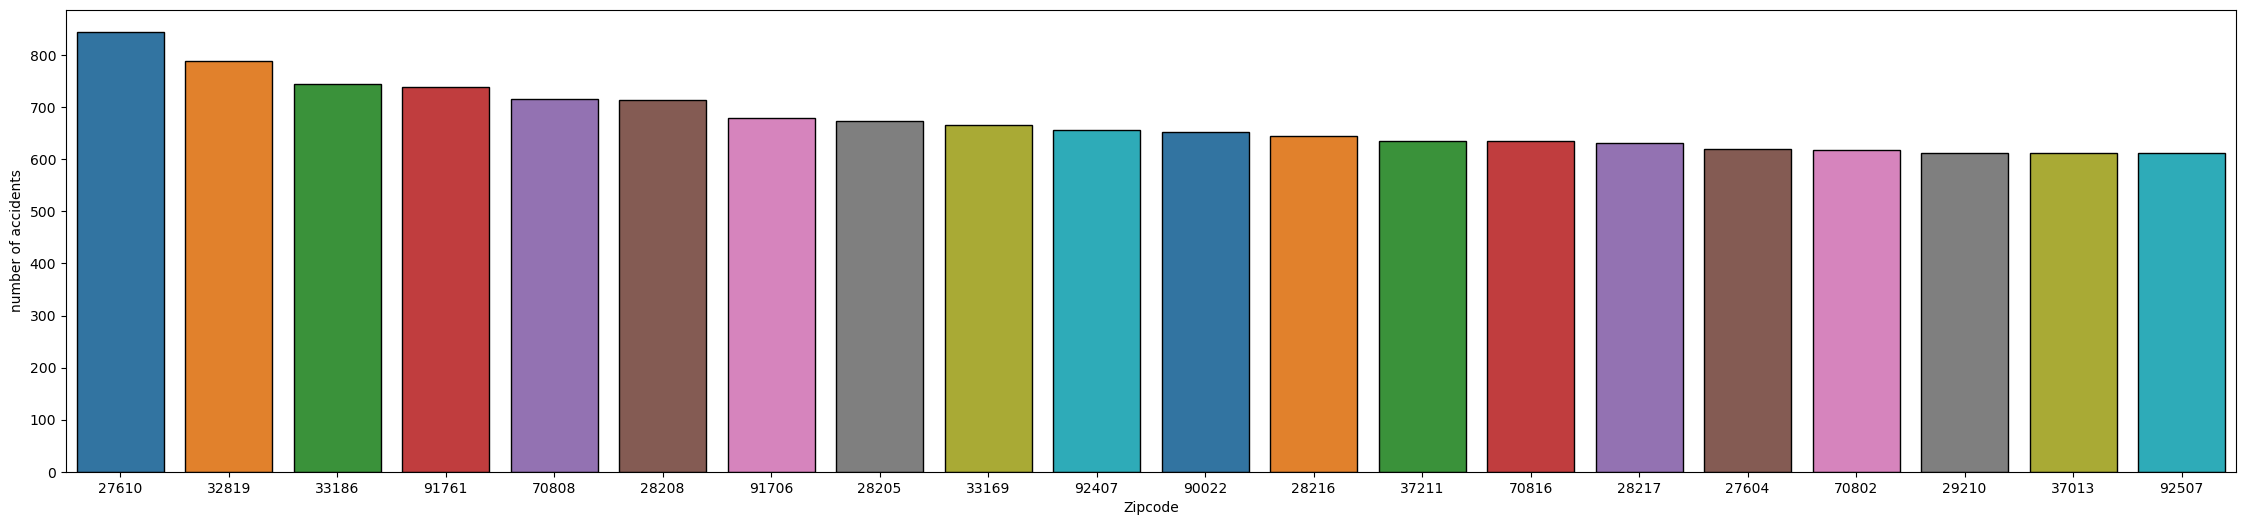

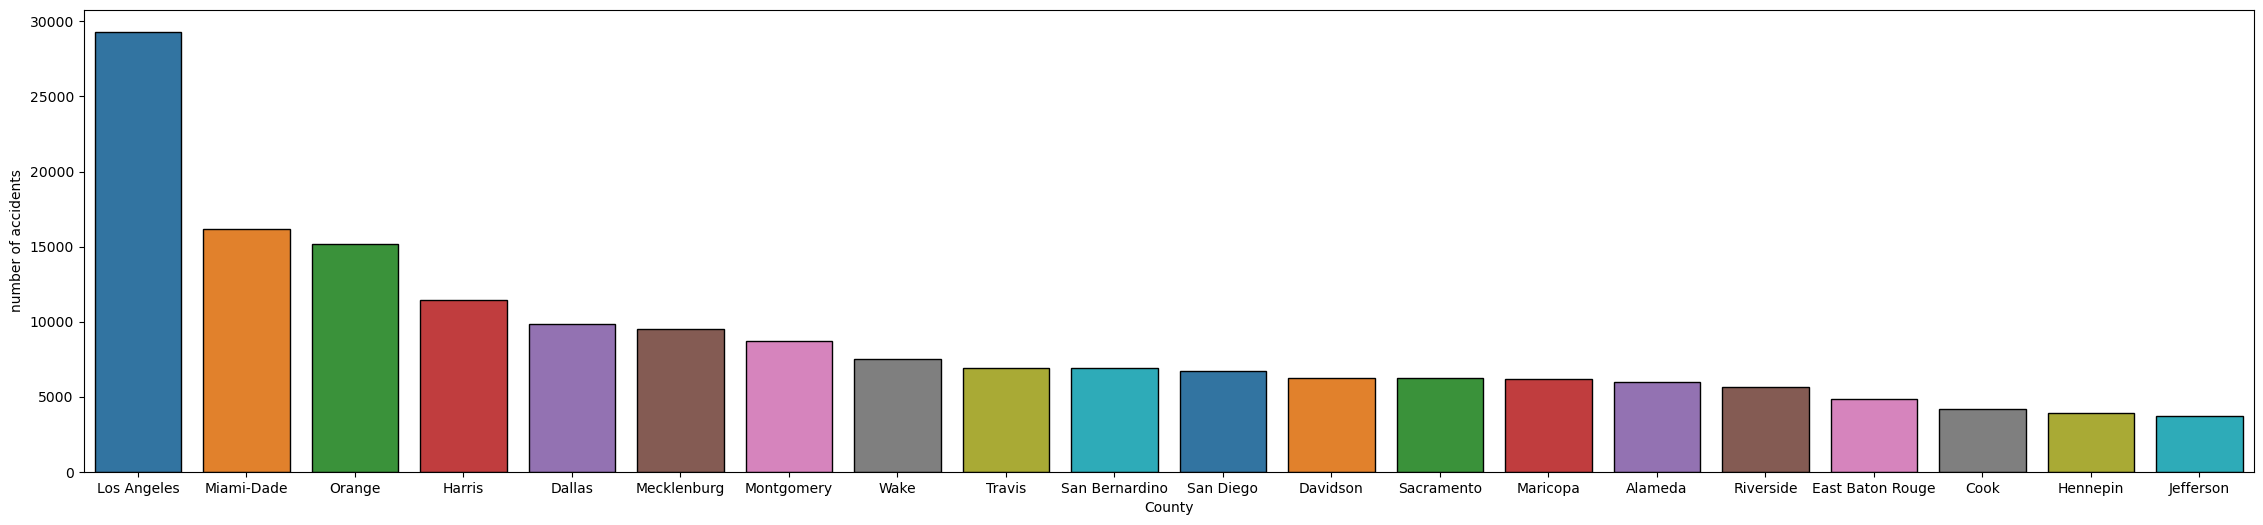

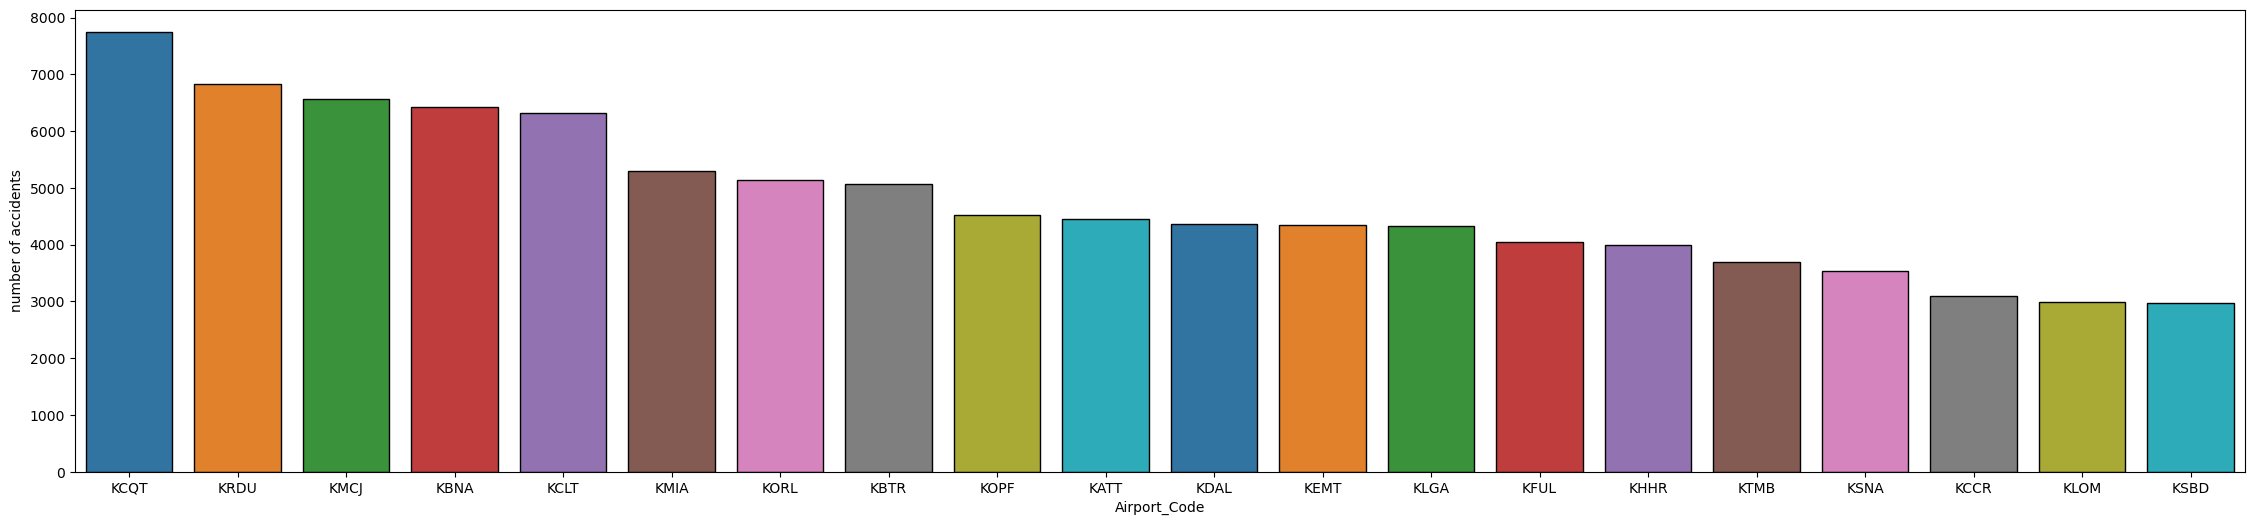

In [38]:
#re-plotting top 20 of difficult to see plots
cat_top10 = ['Street','City', 'Zipcode', 'County', 'Airport_Code']
for i in cat_top10:
    cat_grouped = data.groupby(i)['ID'].nunique().nlargest(20)
    plt.figure(figsize=(28, 6))
    sns.barplot(edgecolor='black',x=cat_grouped.index,y=cat_grouped, palette = sns.color_palette(n_colors=20))
    plt.xlabel(i)
    plt.ylabel('number of accidents')
    plt.show()

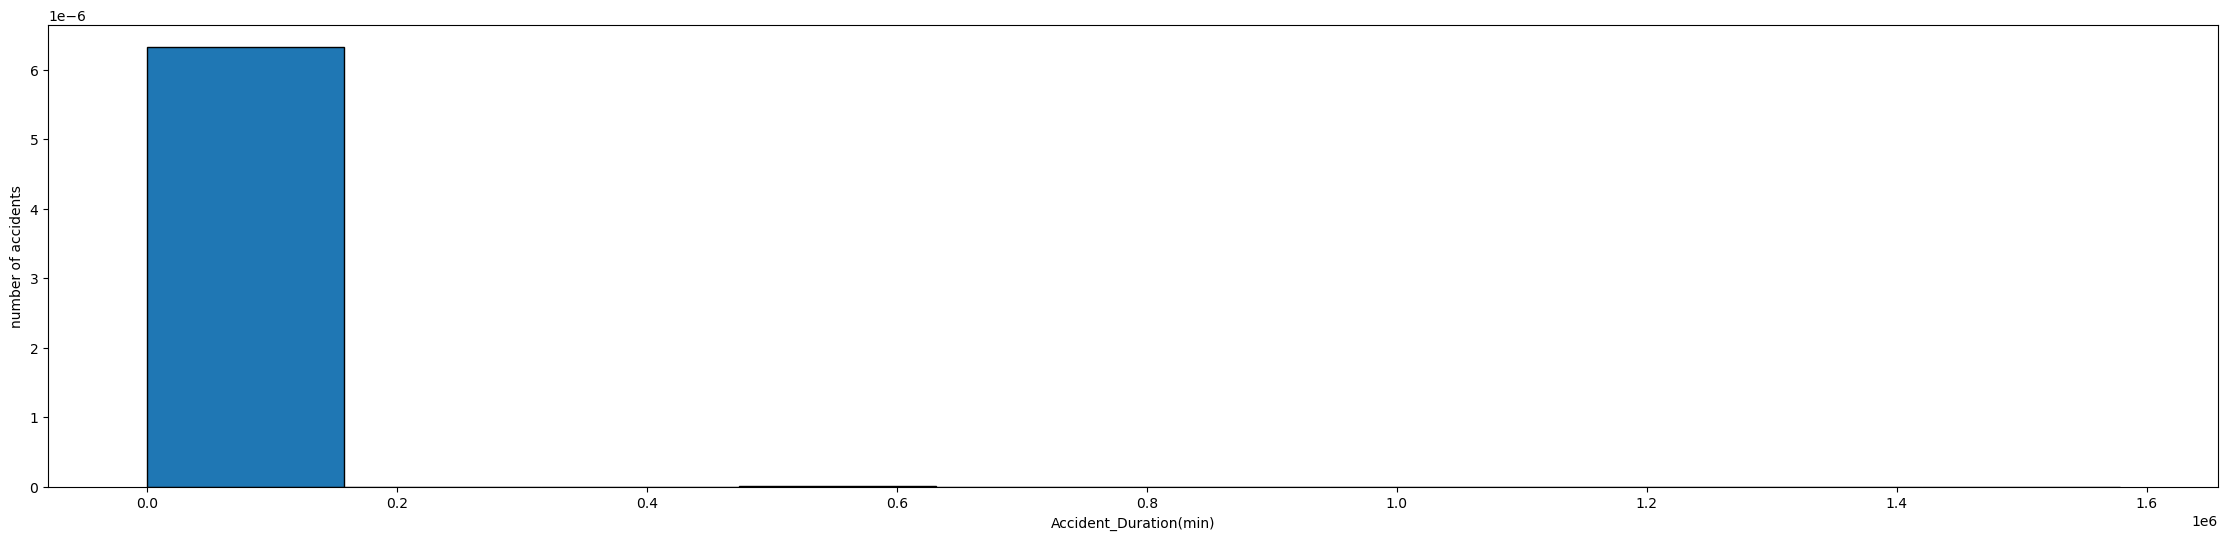

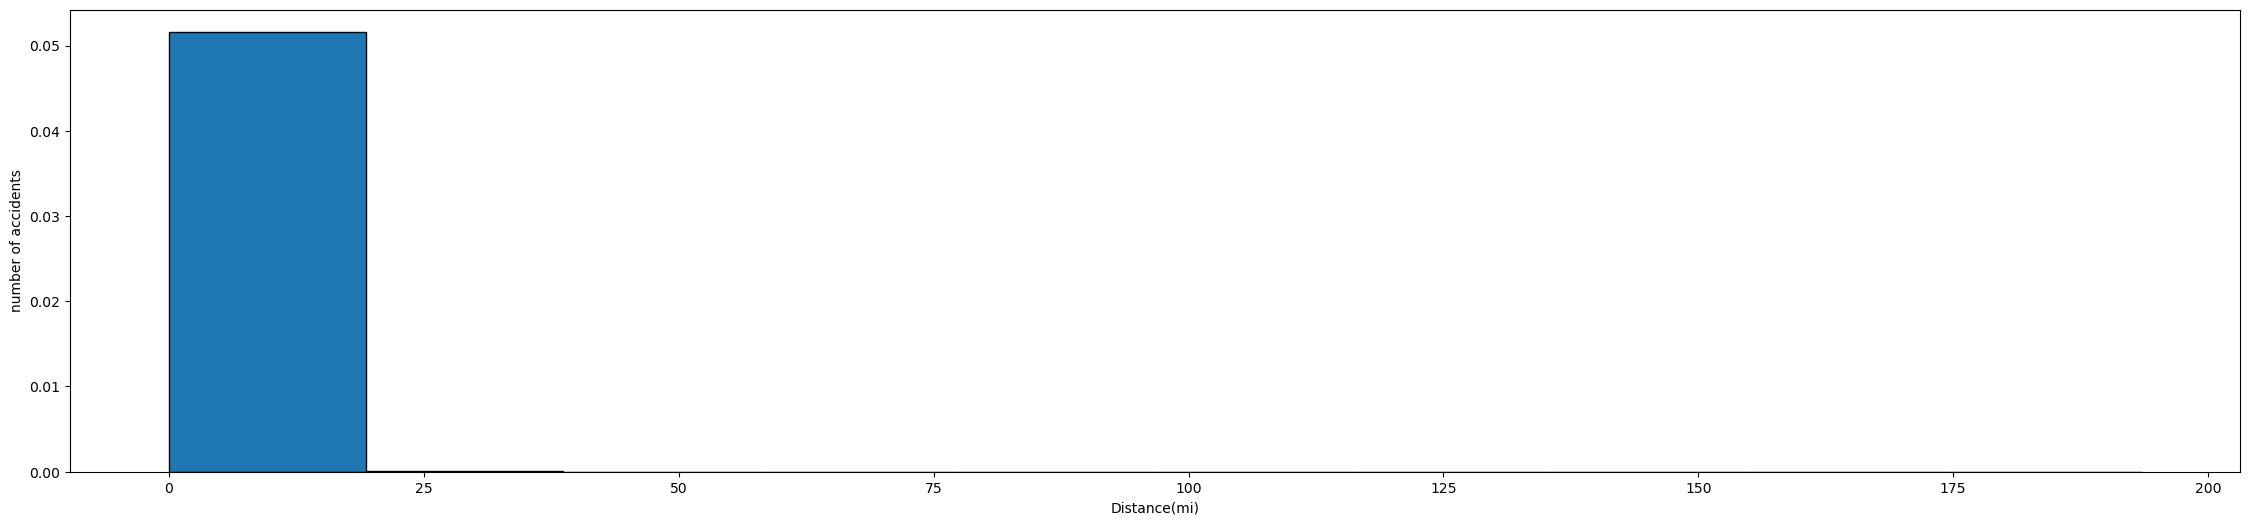

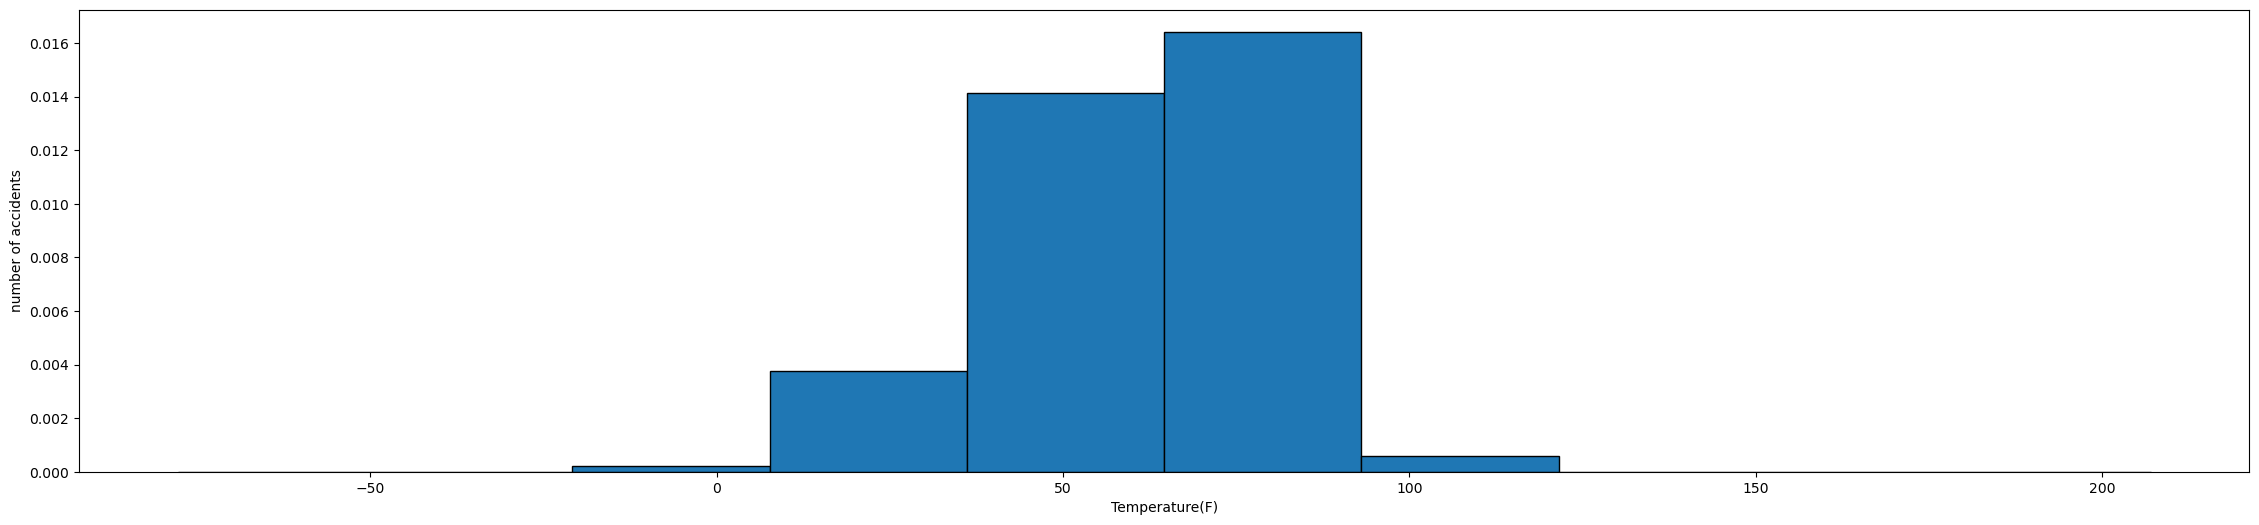

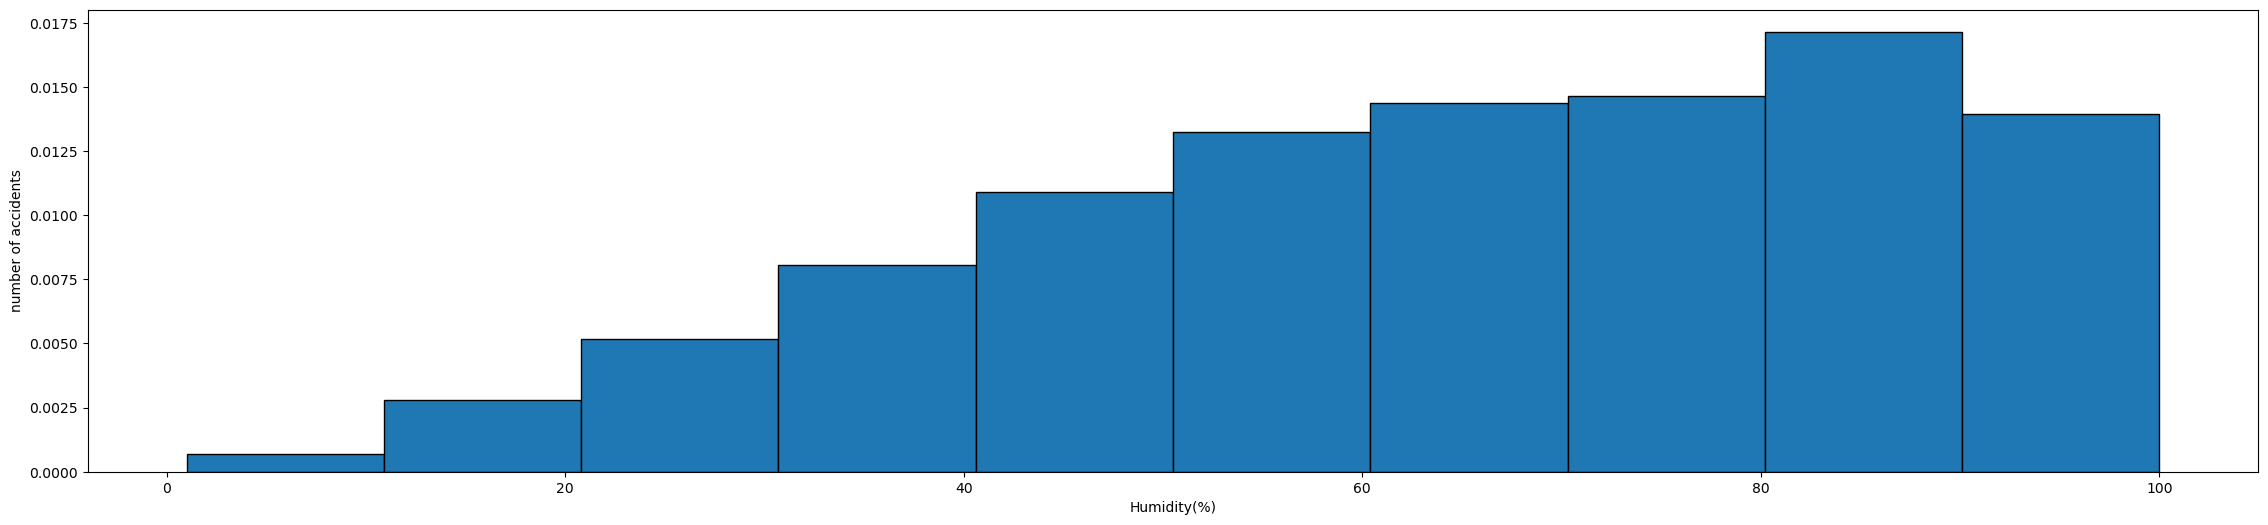

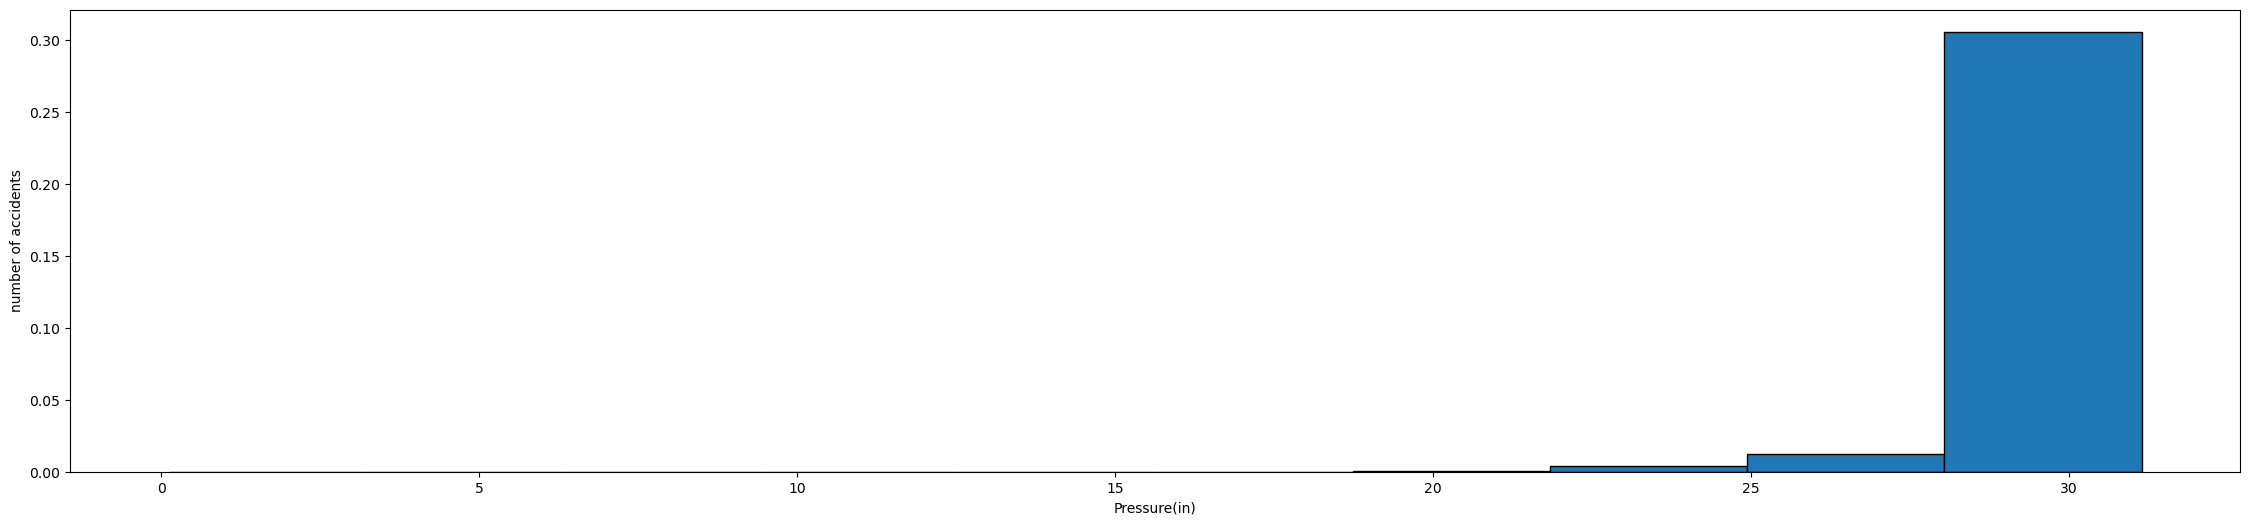

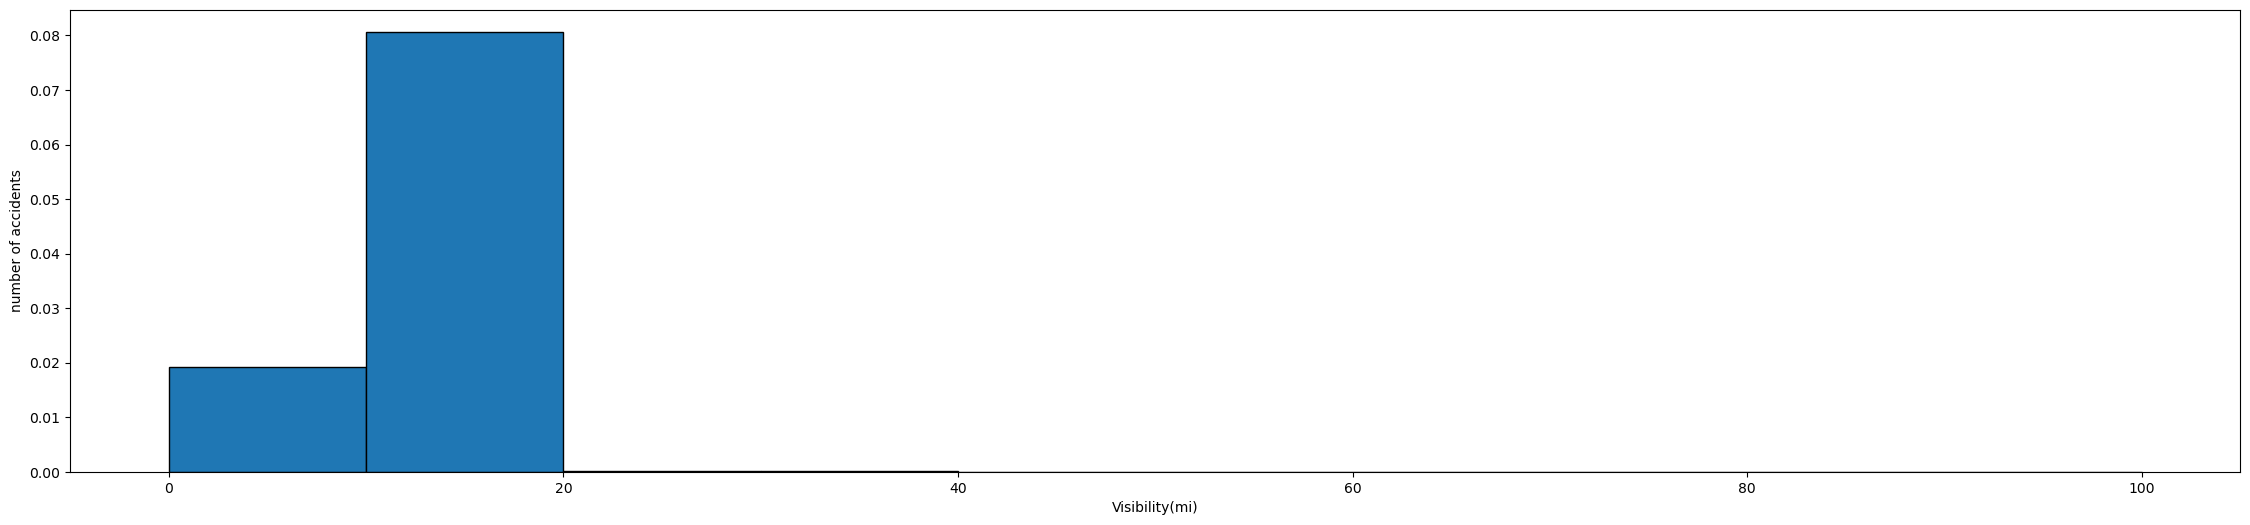

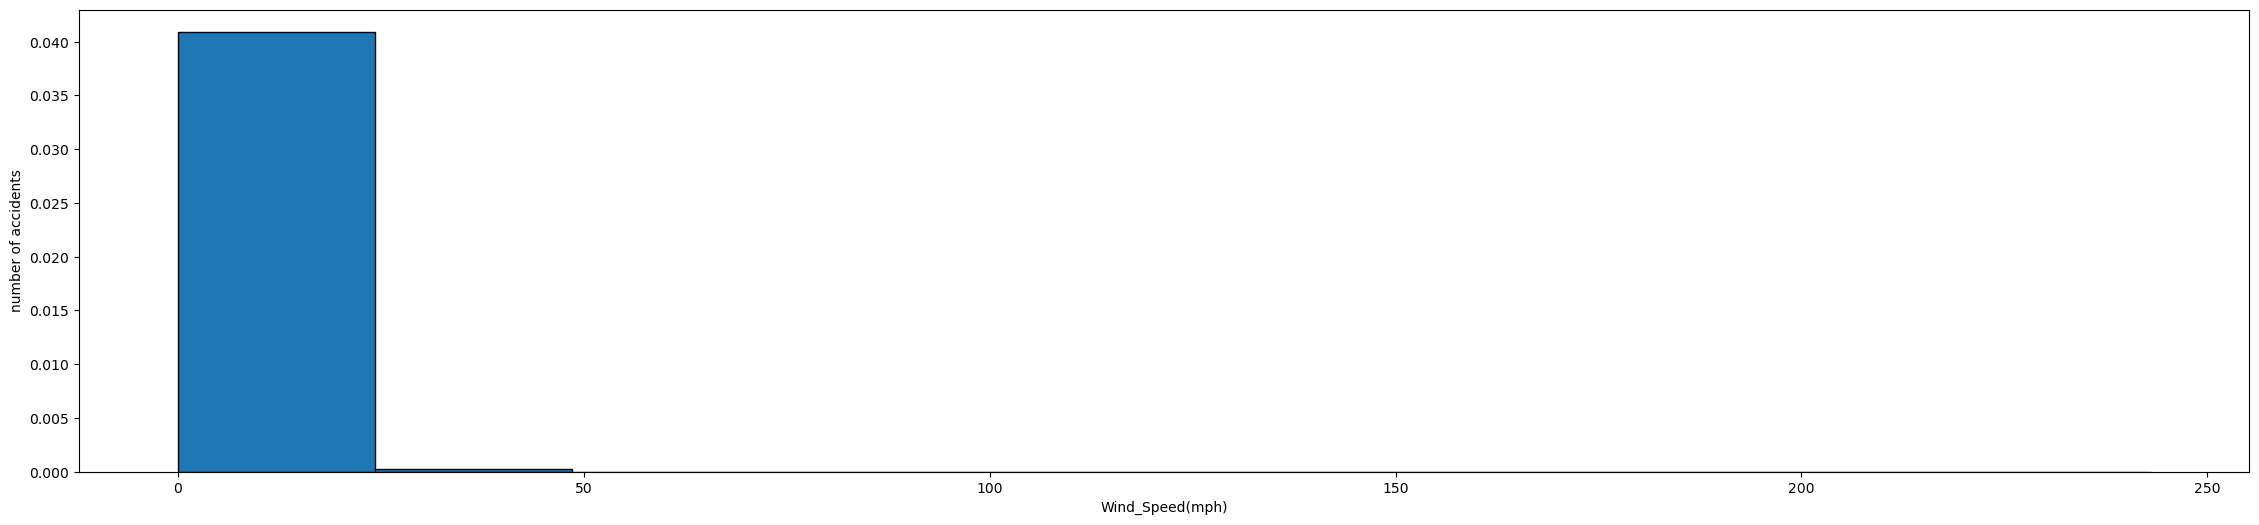

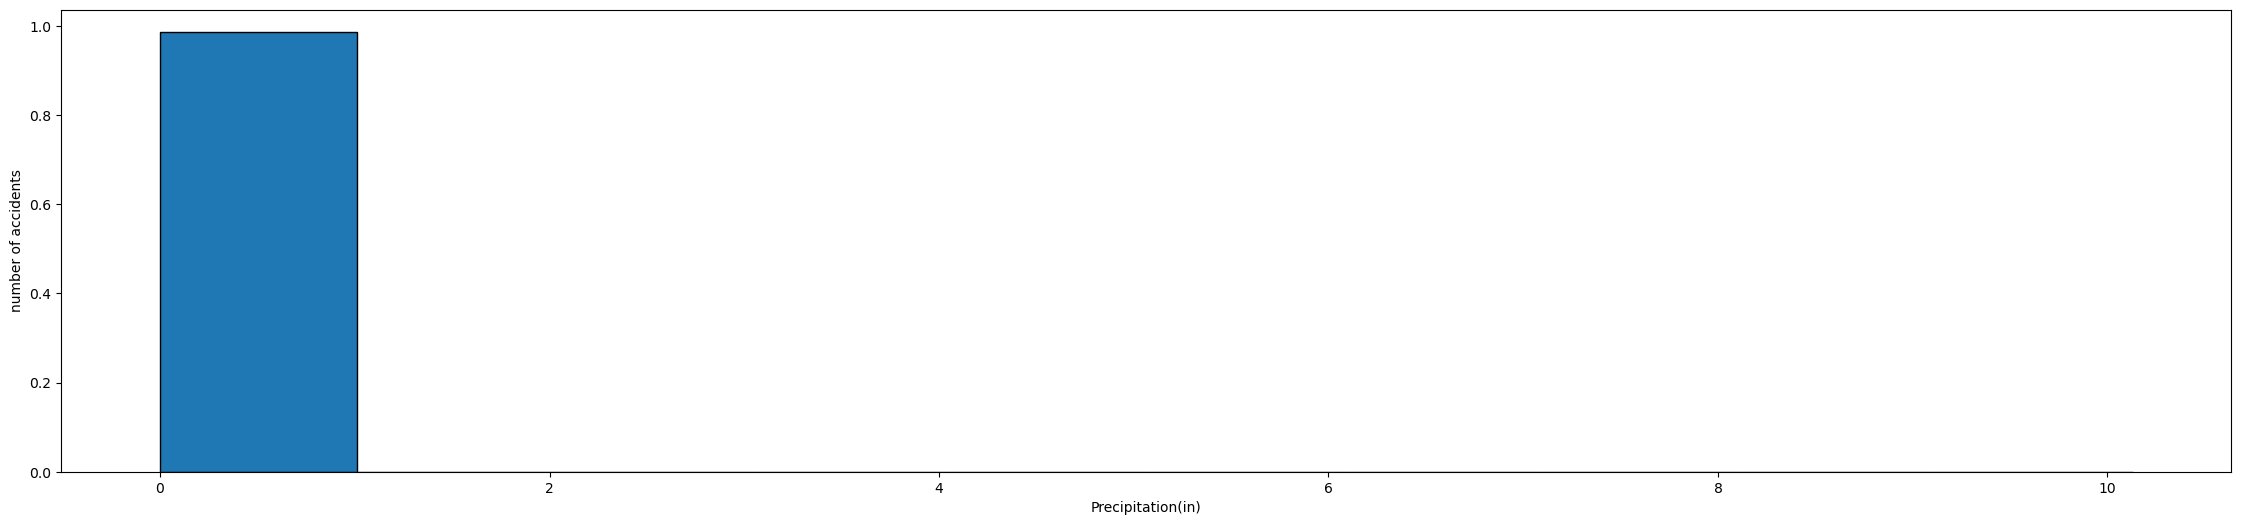

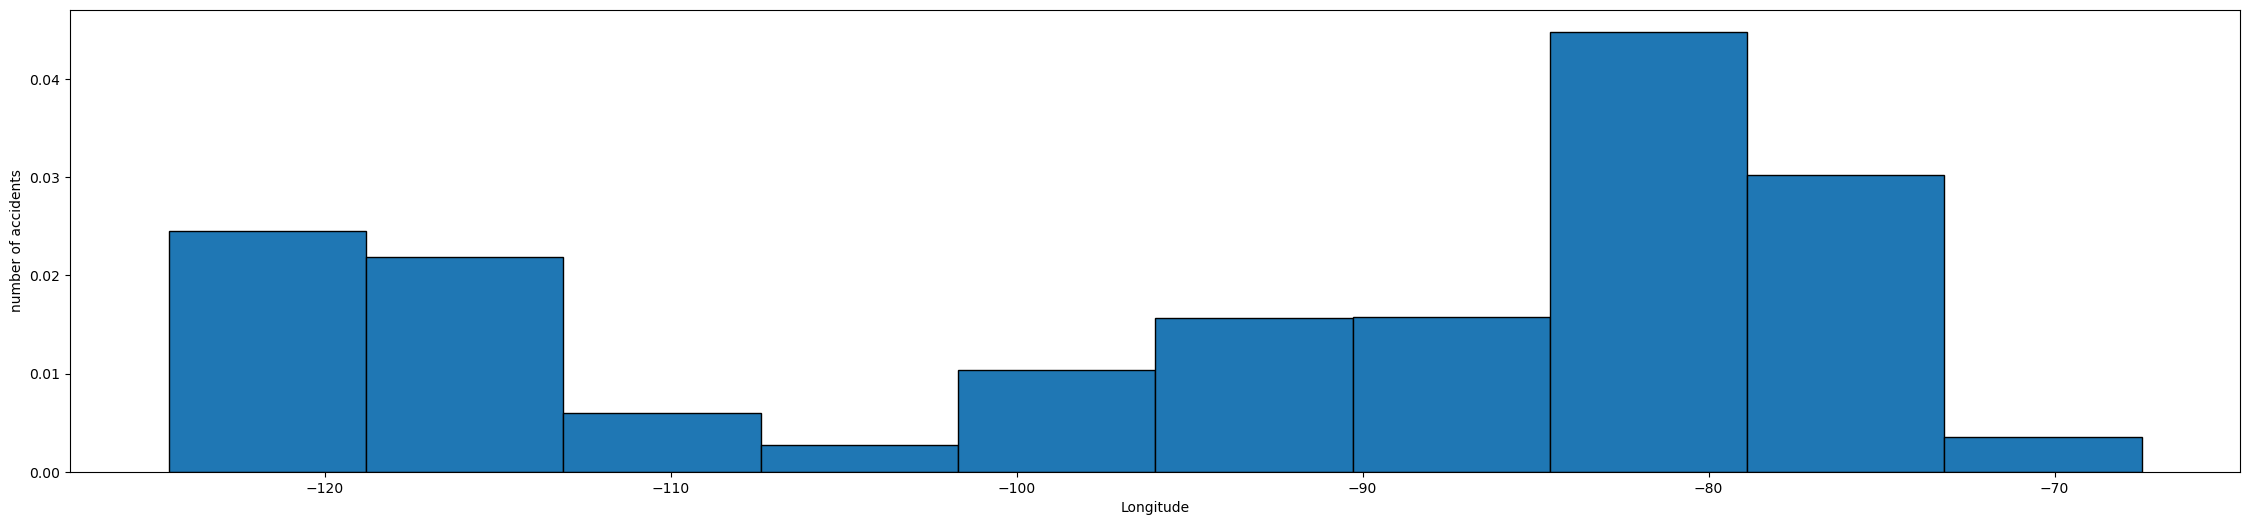

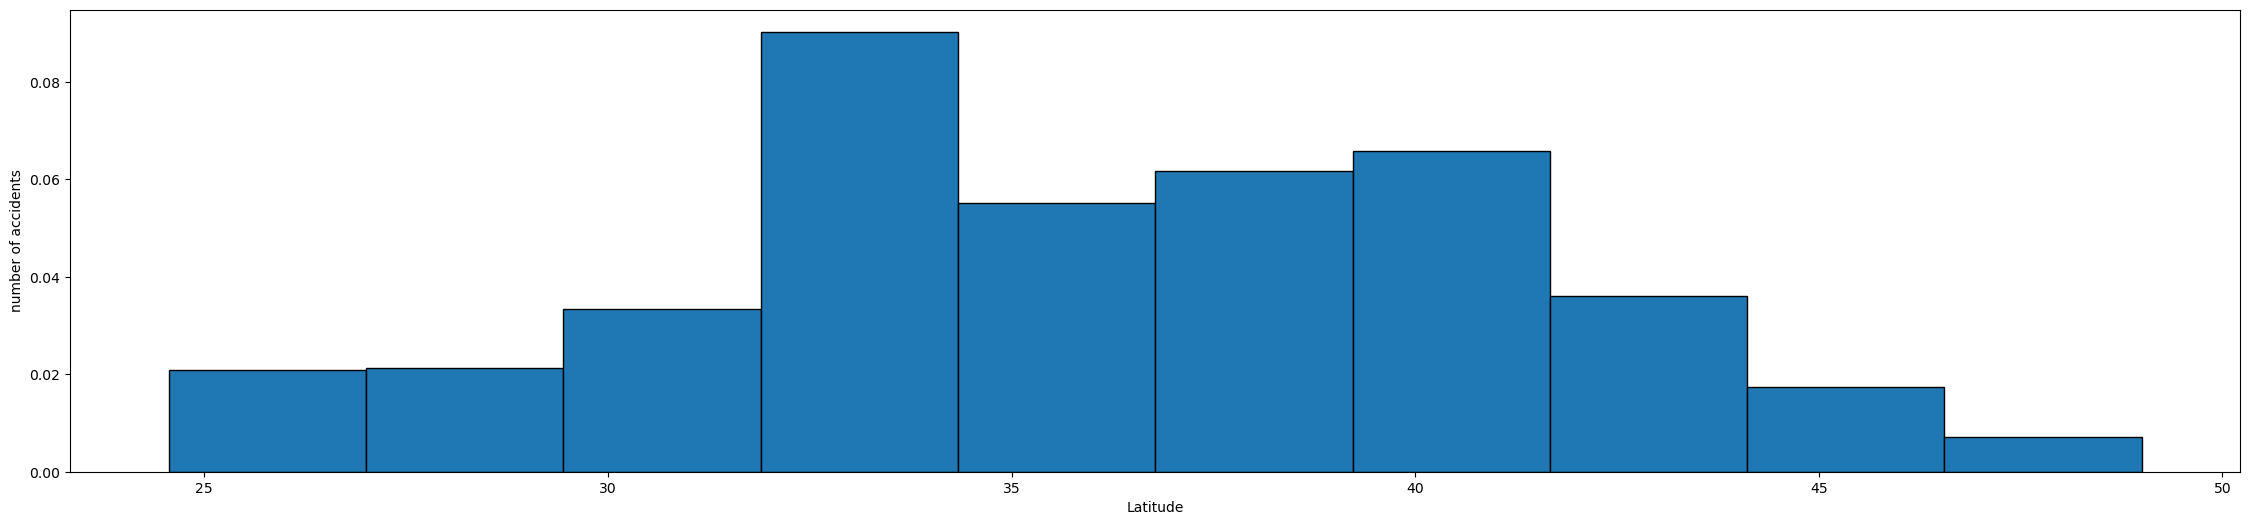

In [39]:
for i in data[numerical].columns:

    plt.figure(figsize=(28, 6))
    plt.hist(data[numerical][i], edgecolor='black', density=True)
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of accidents')
    plt.show()


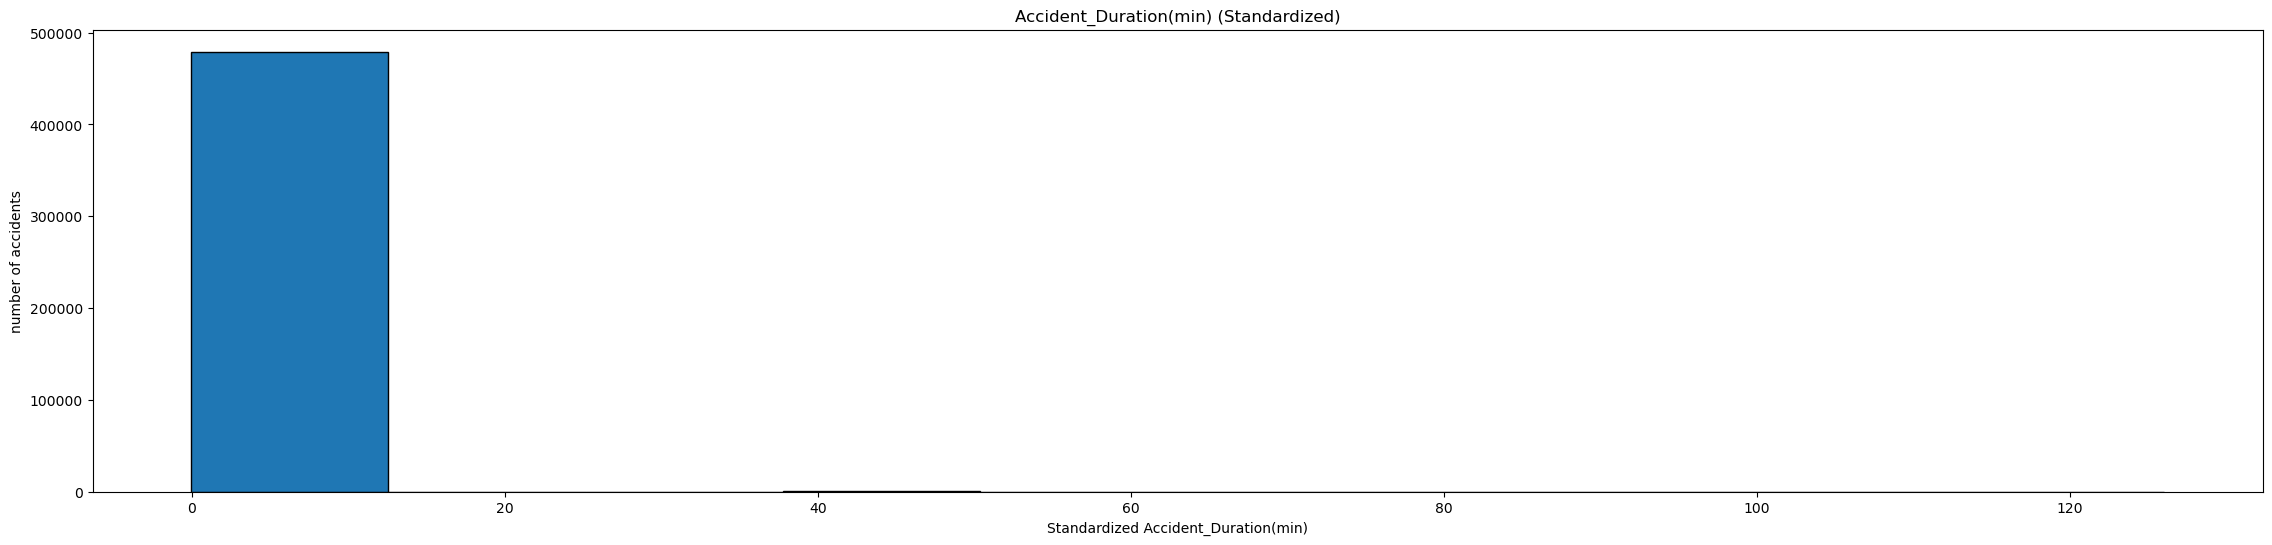

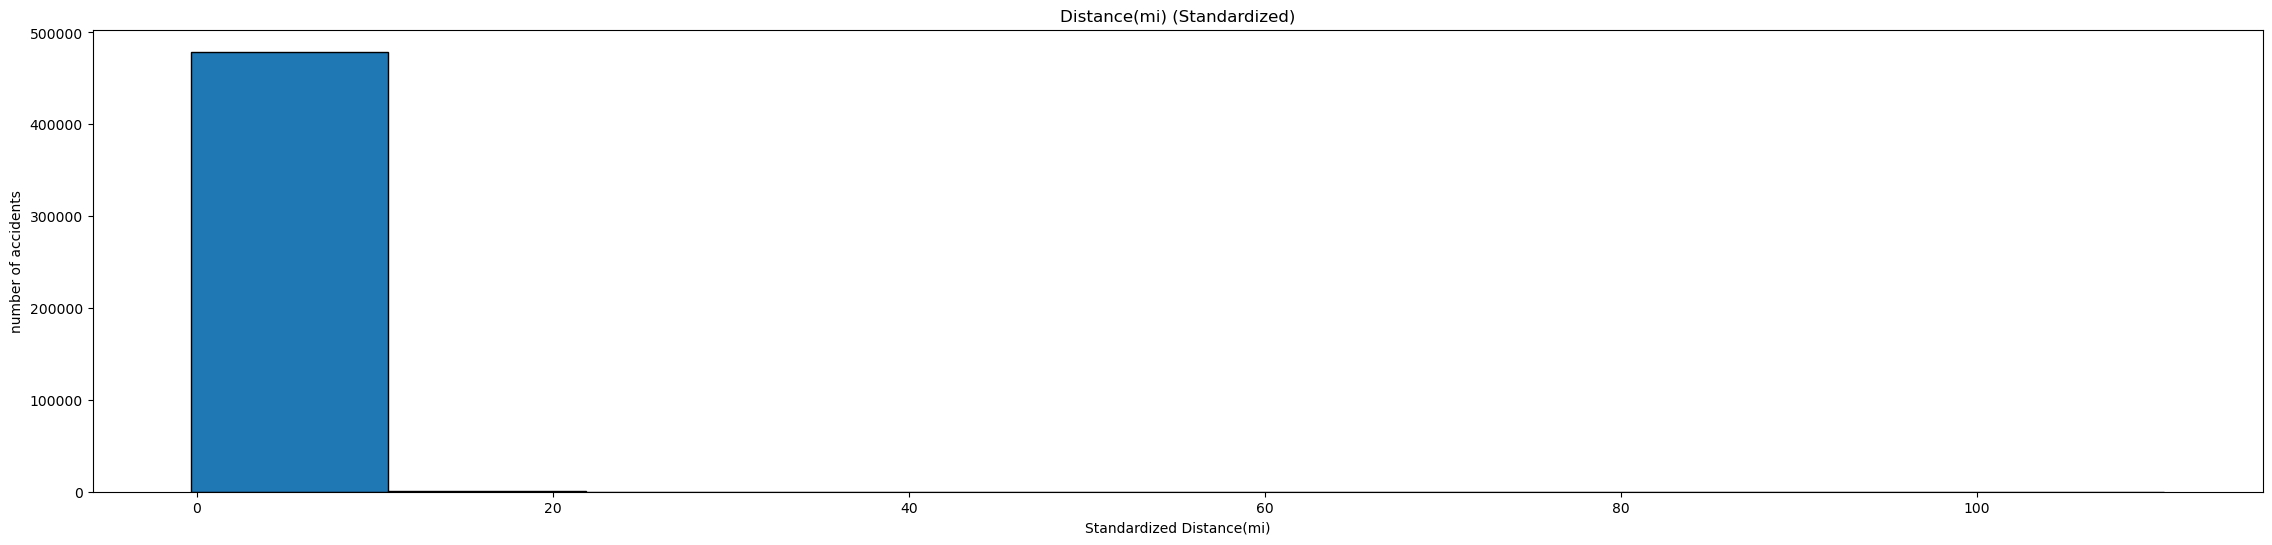

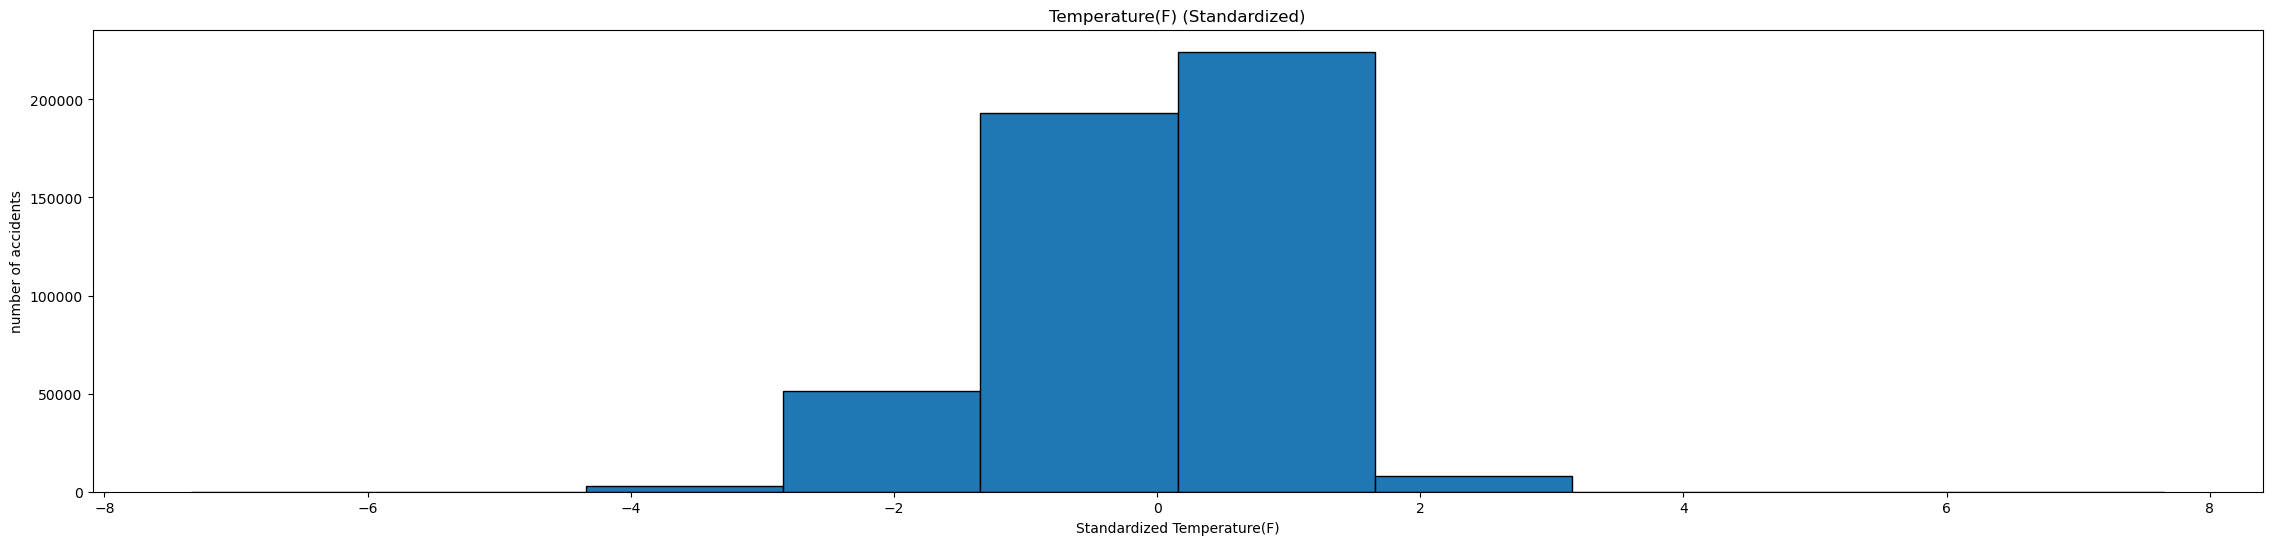

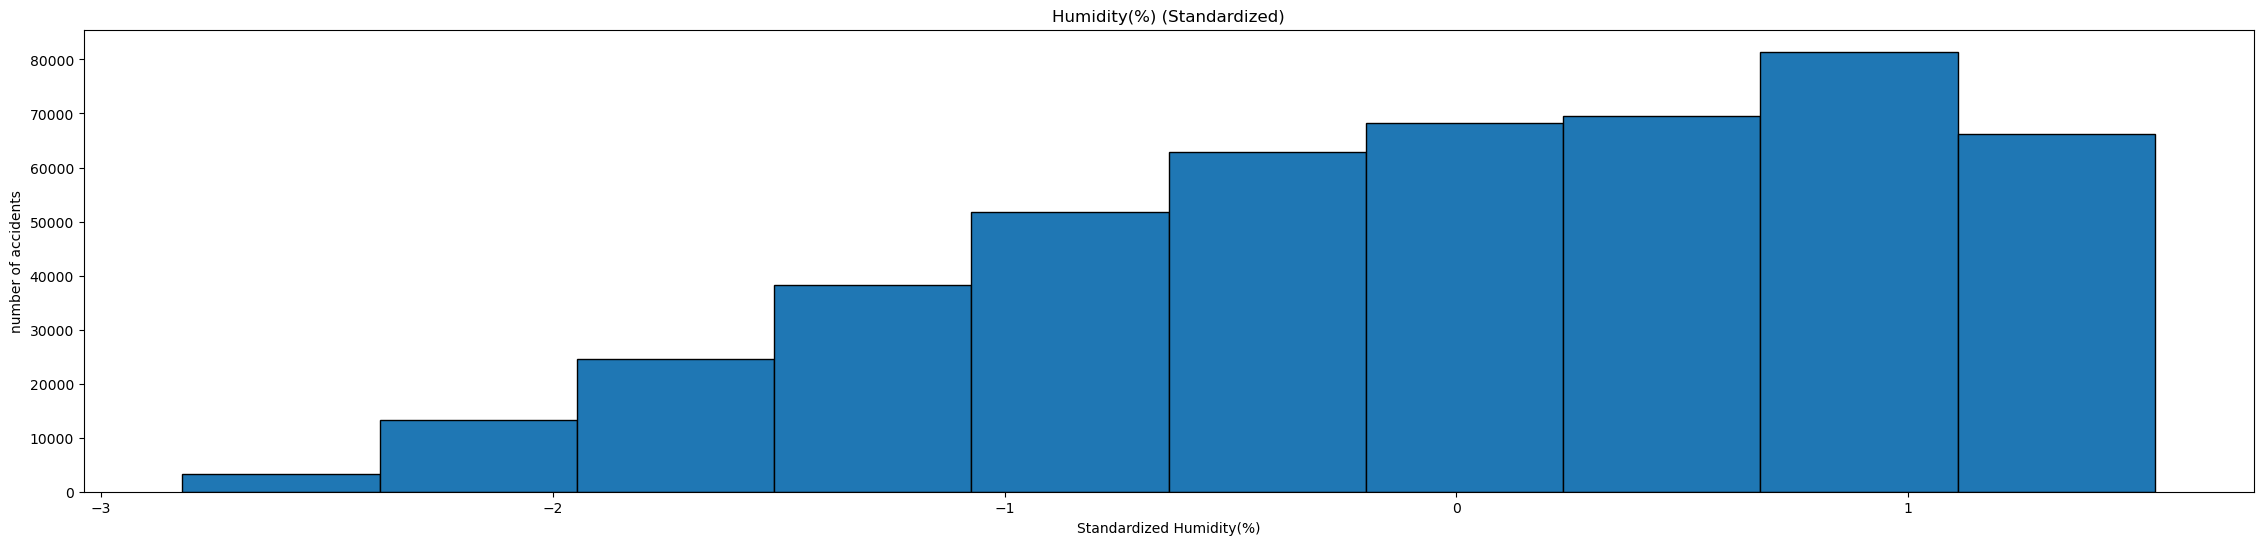

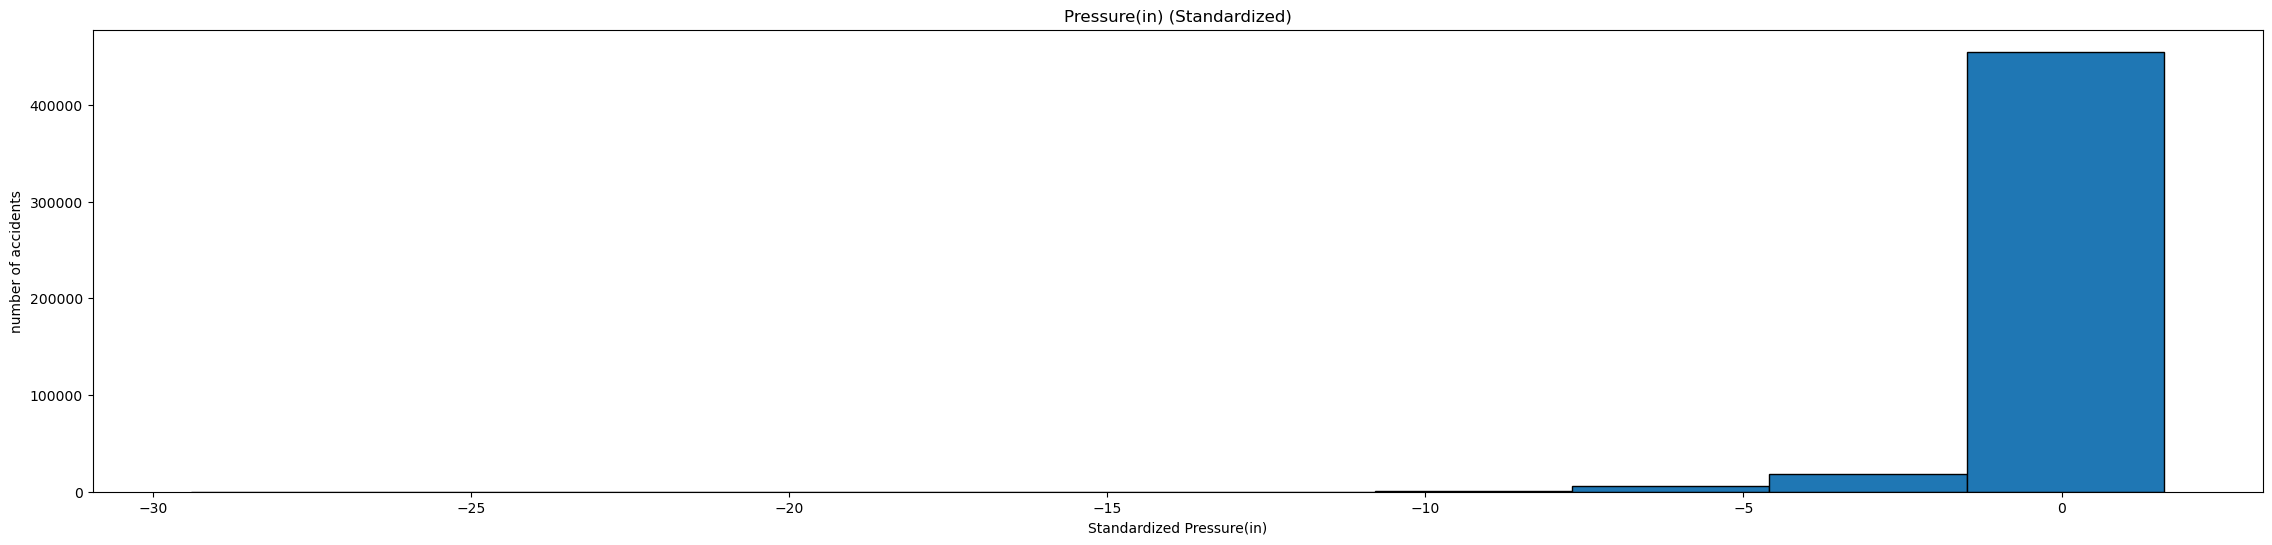

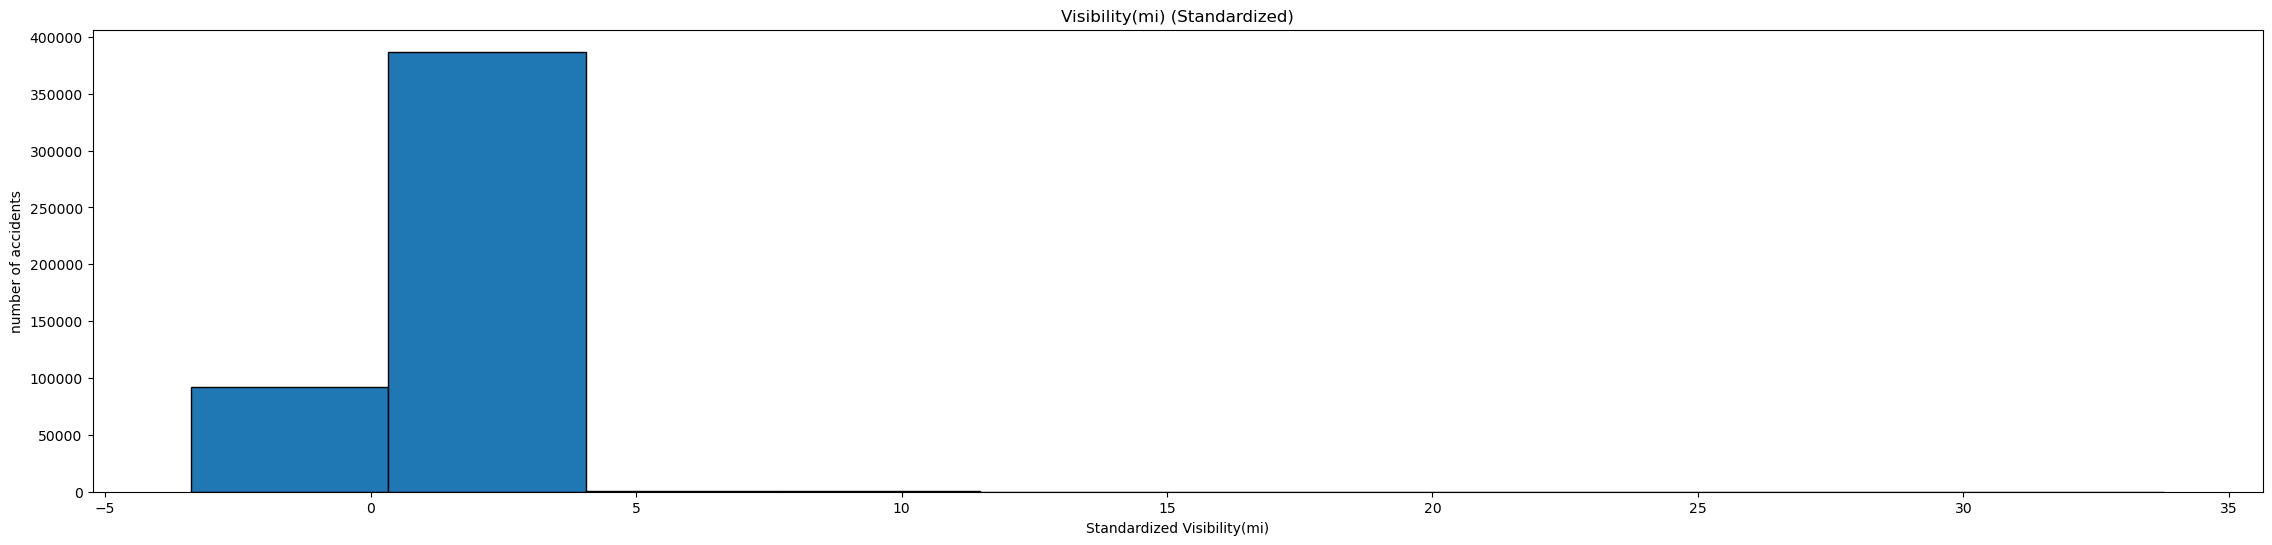

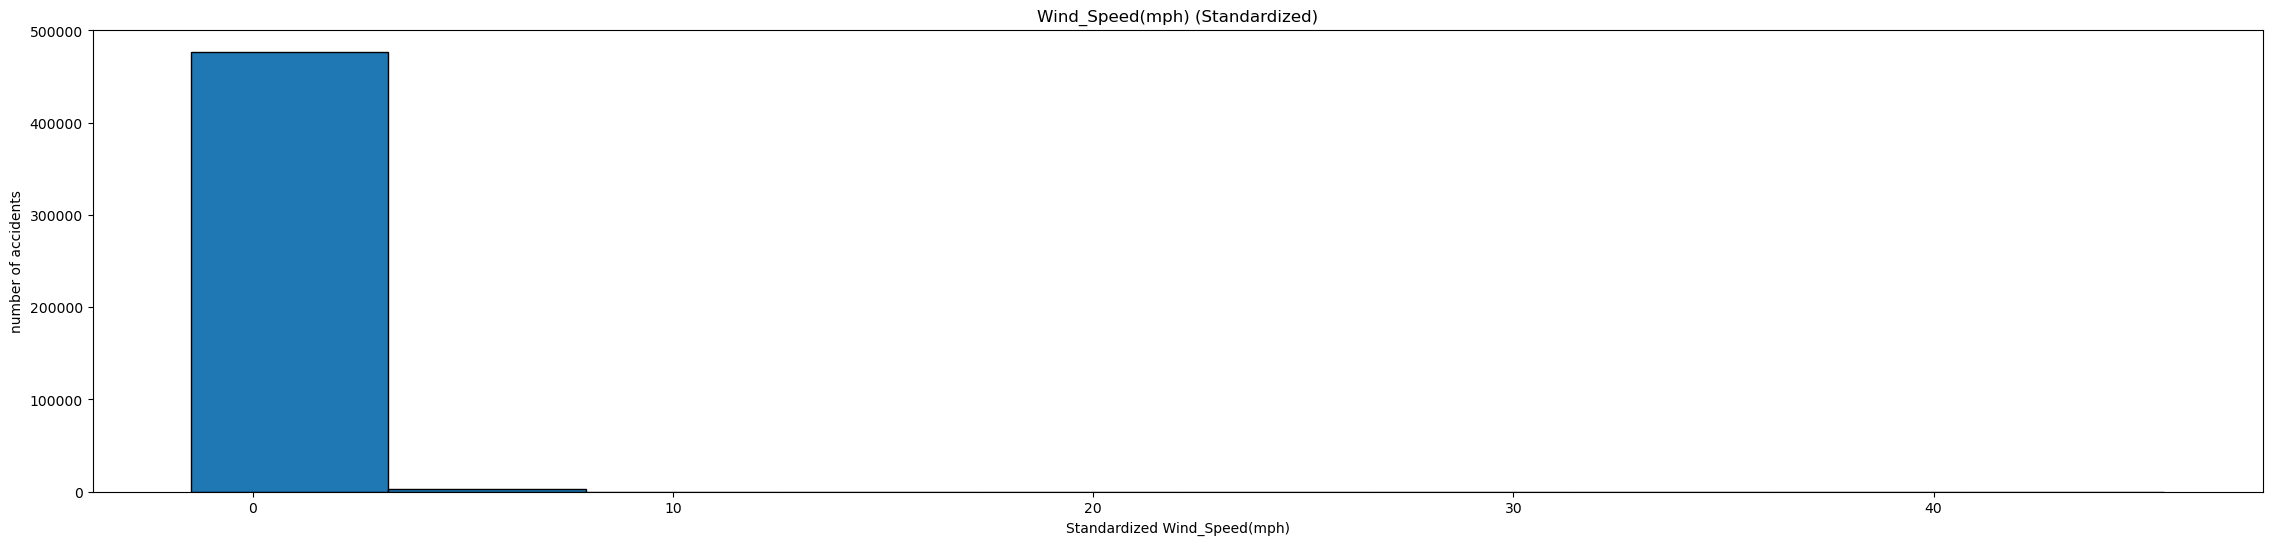

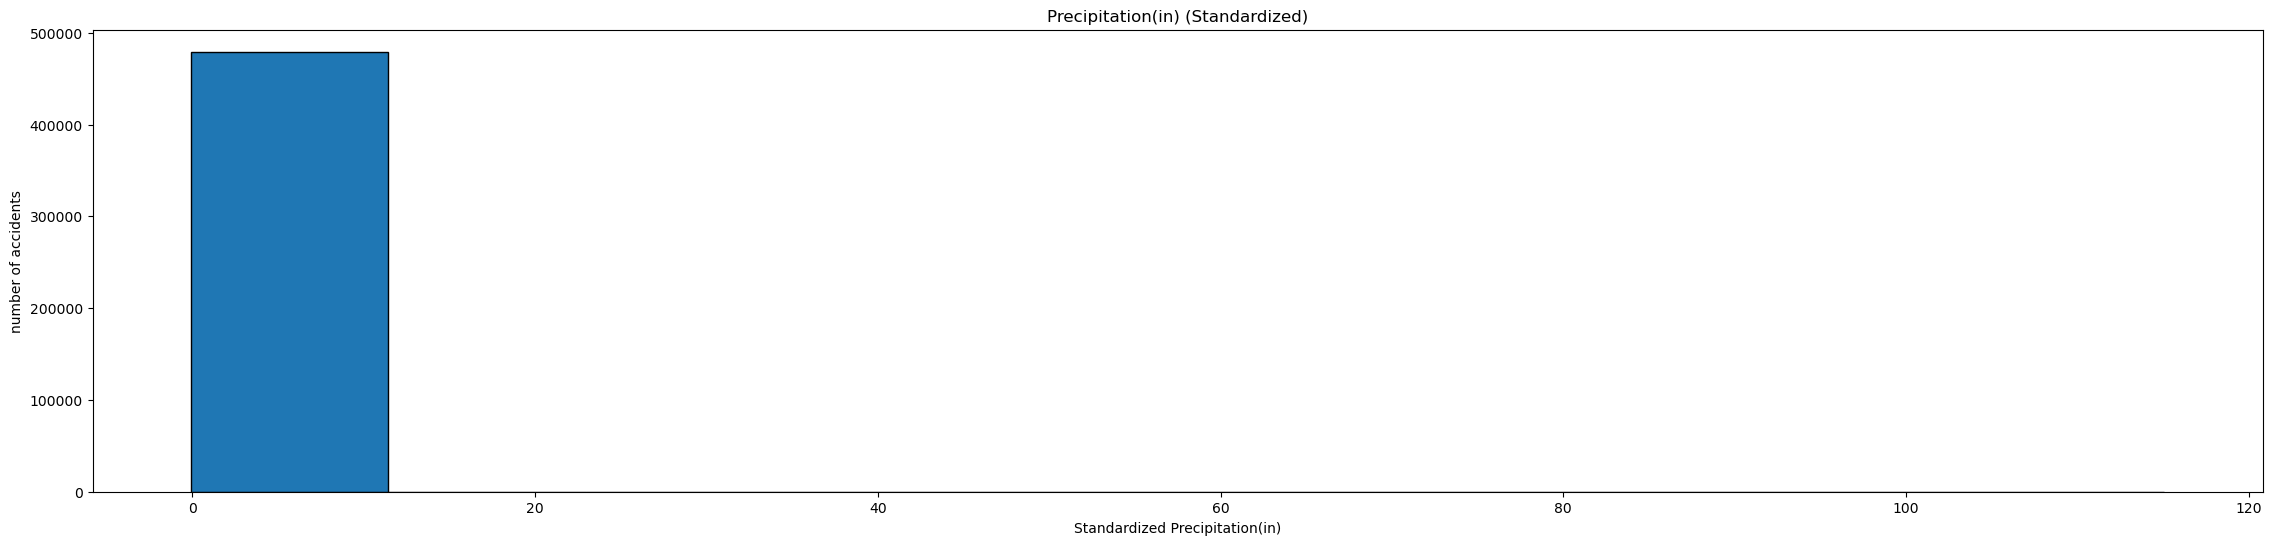

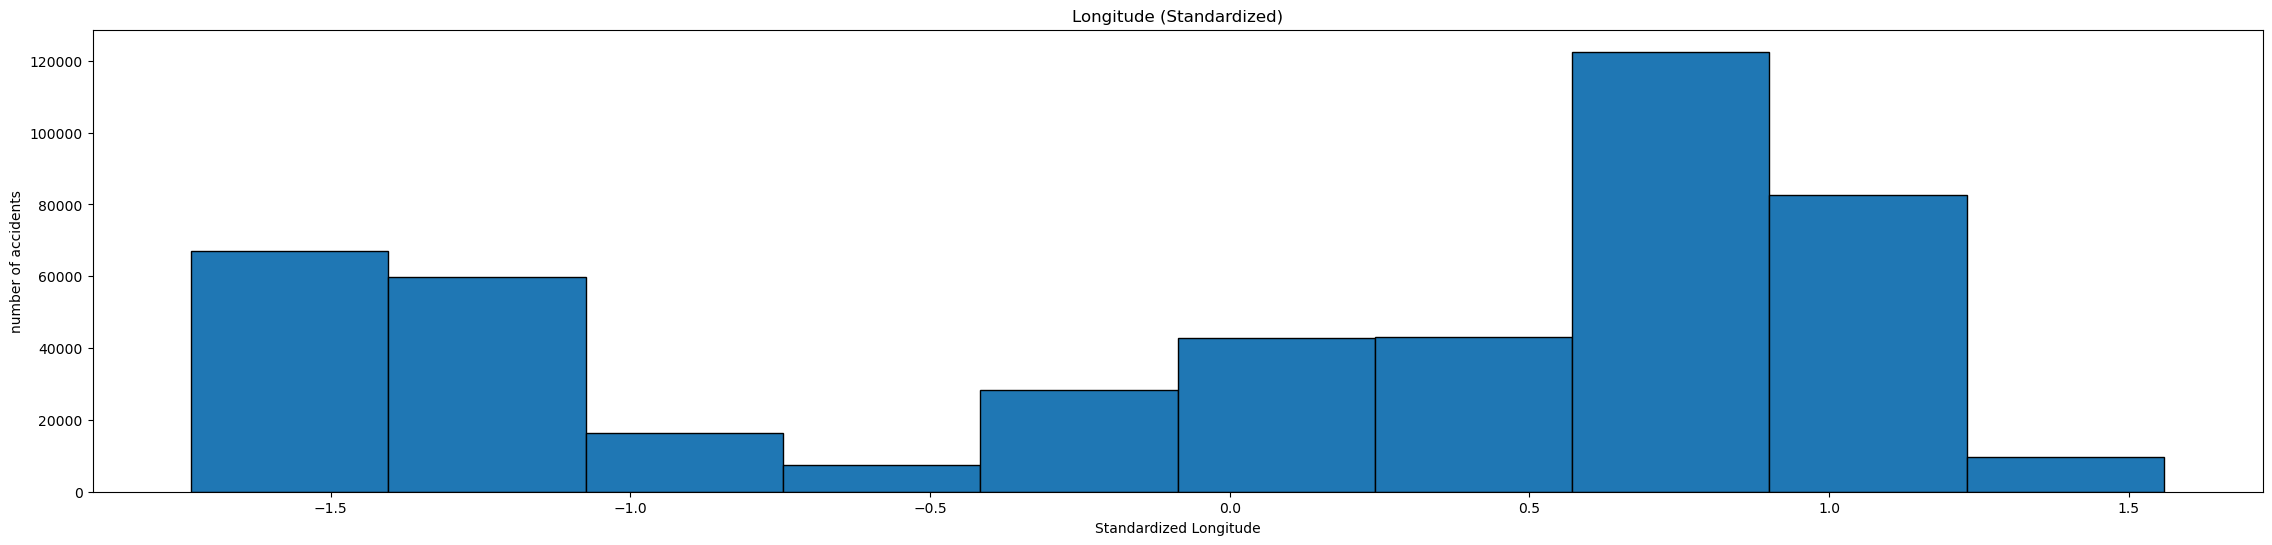

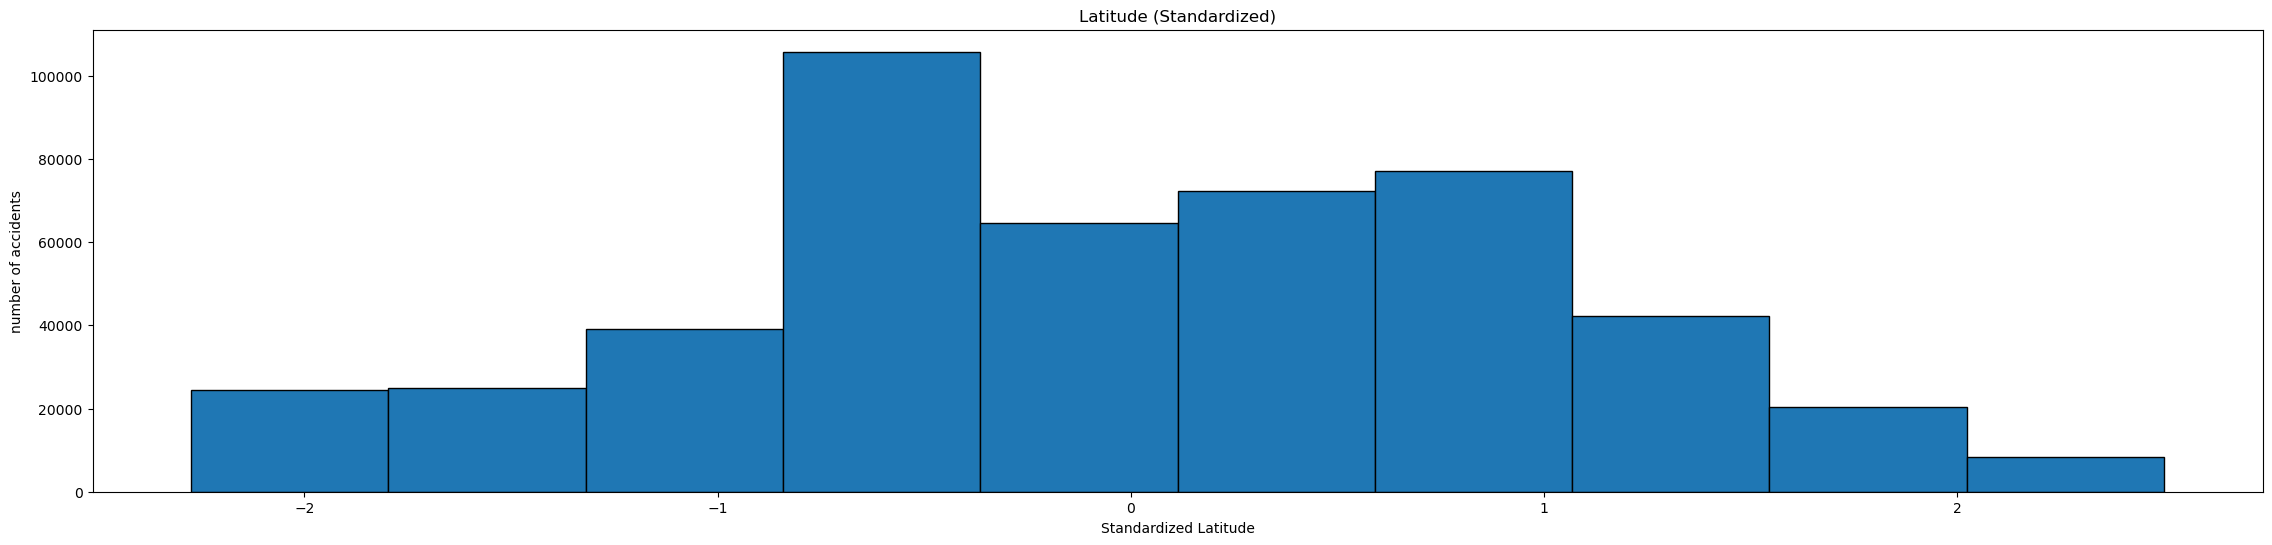

In [40]:
for i in data[numerical].columns: 
   # Standardize the column
   standardized_data = (data[i] - data[i].mean()) / data[i].std()
   
   # Plot the histogram for the standardized data
   plt.figure(figsize=(28, 6))
   plt.hist(standardized_data,edgecolor='black')  # density=True for a normalized plot
   plt.xticks()
   plt.xlabel(f'Standardized {i}')
   plt.ylabel('number of accidents')
   plt.title(f'{i} (Standardized)')
   plt.show()

45171


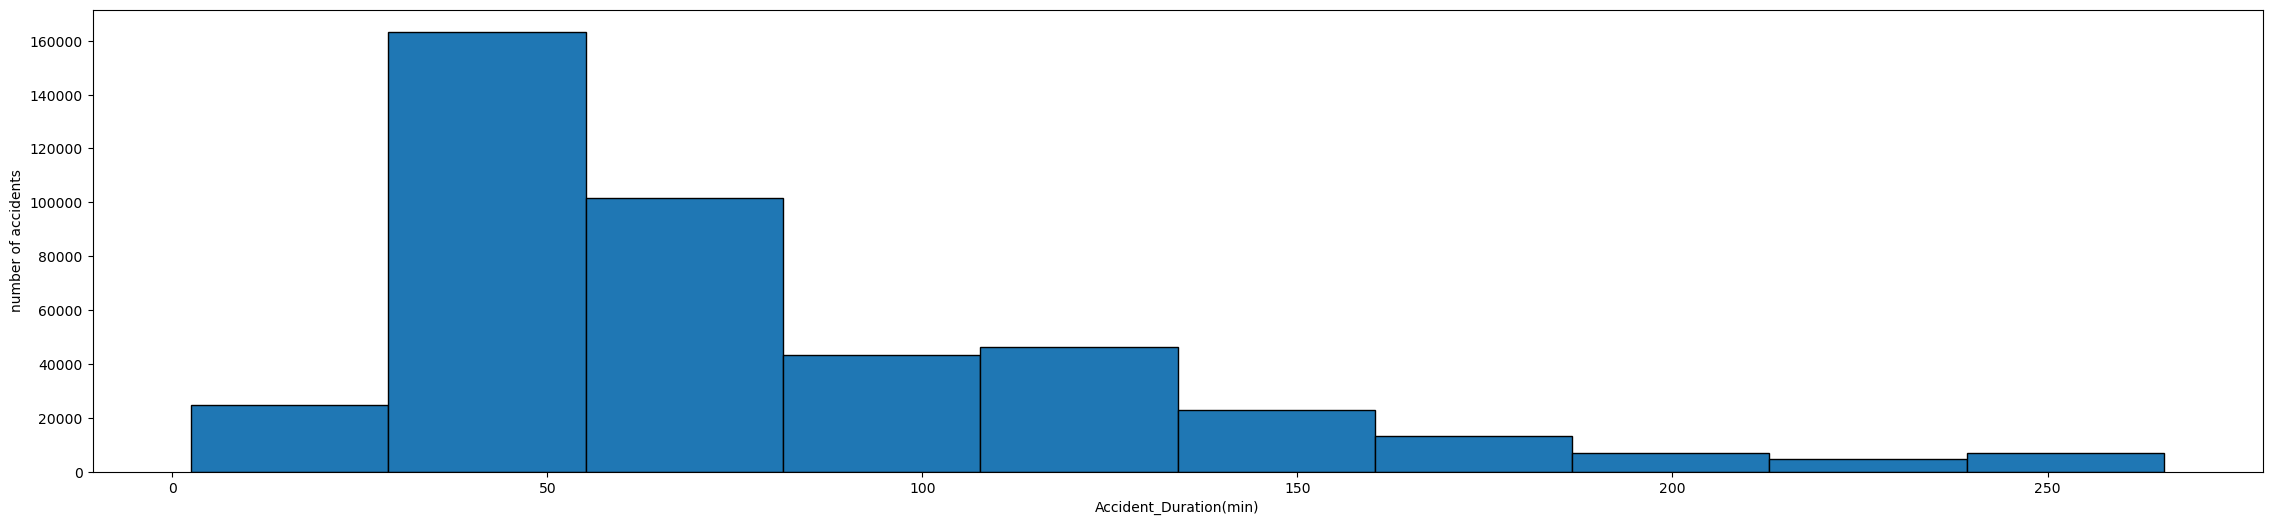

60297


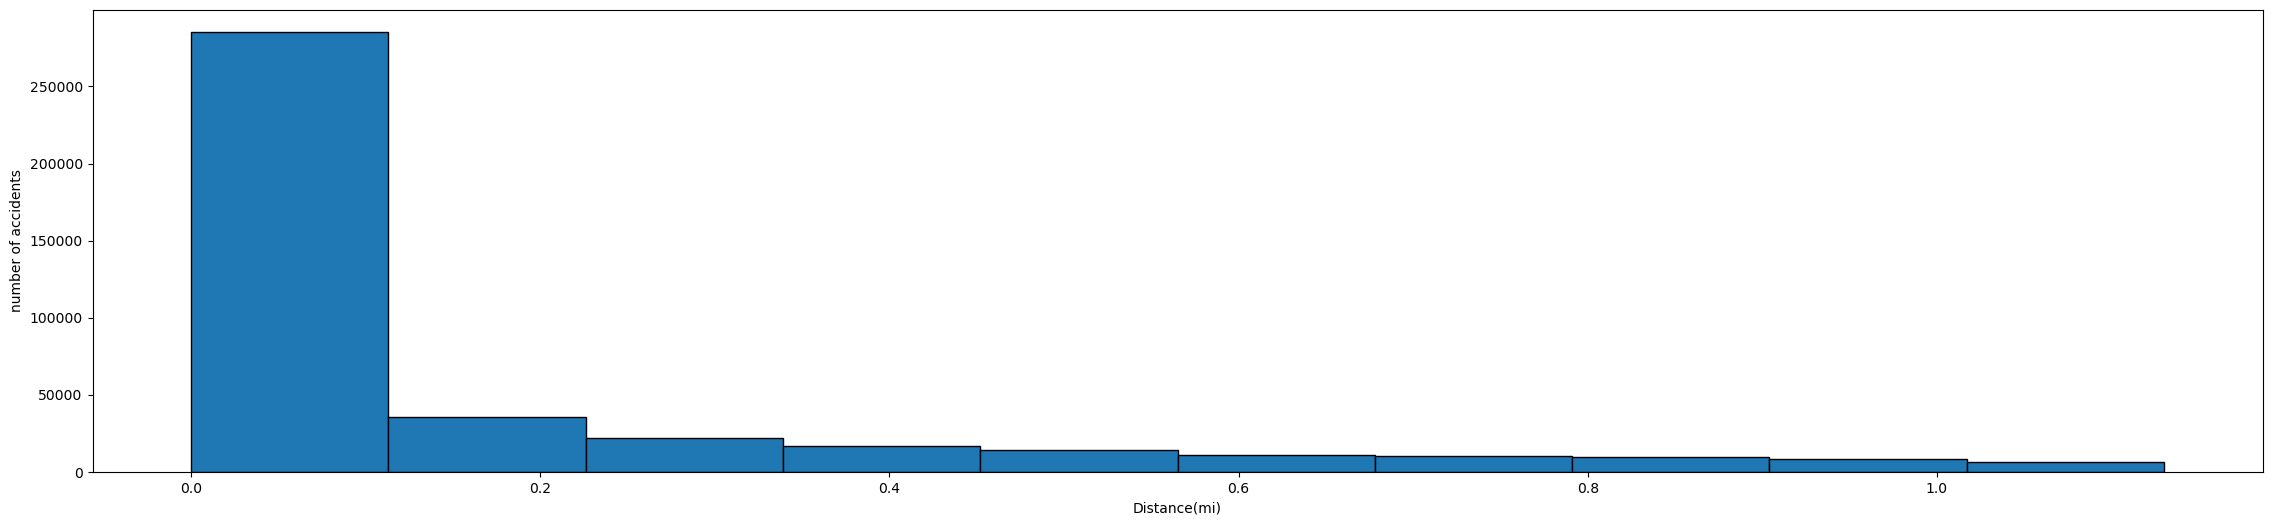

3265


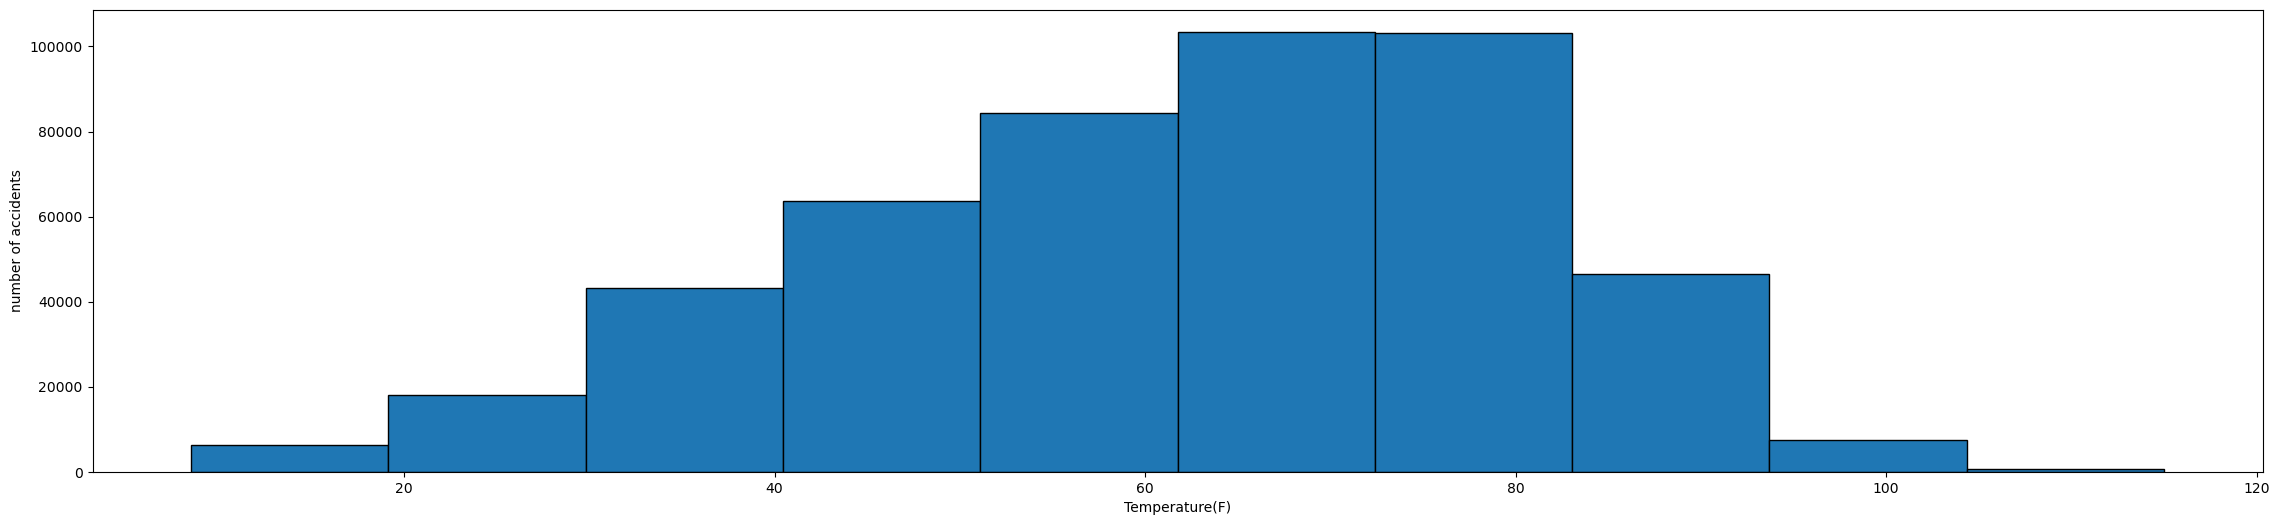

28787


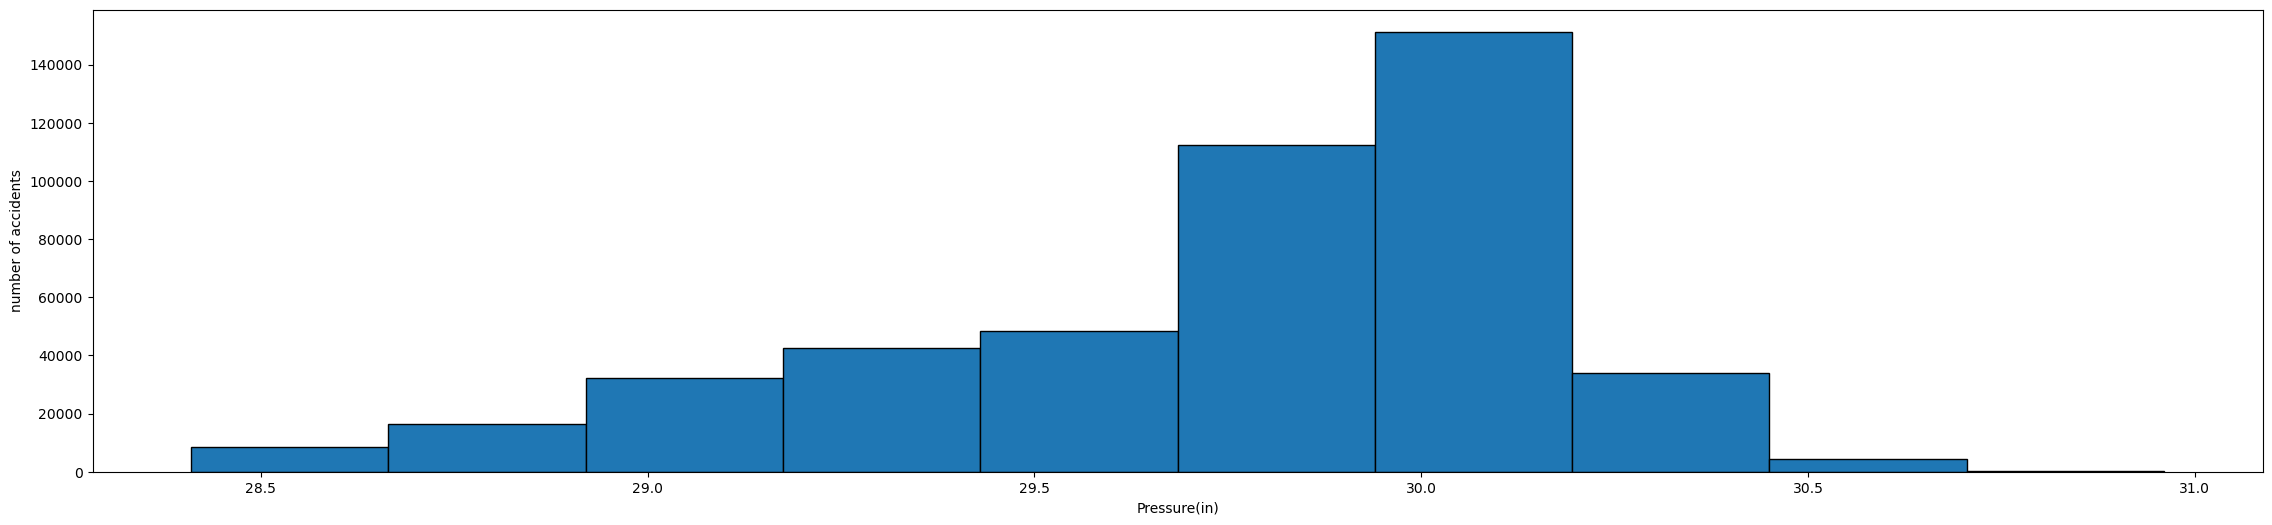

93637


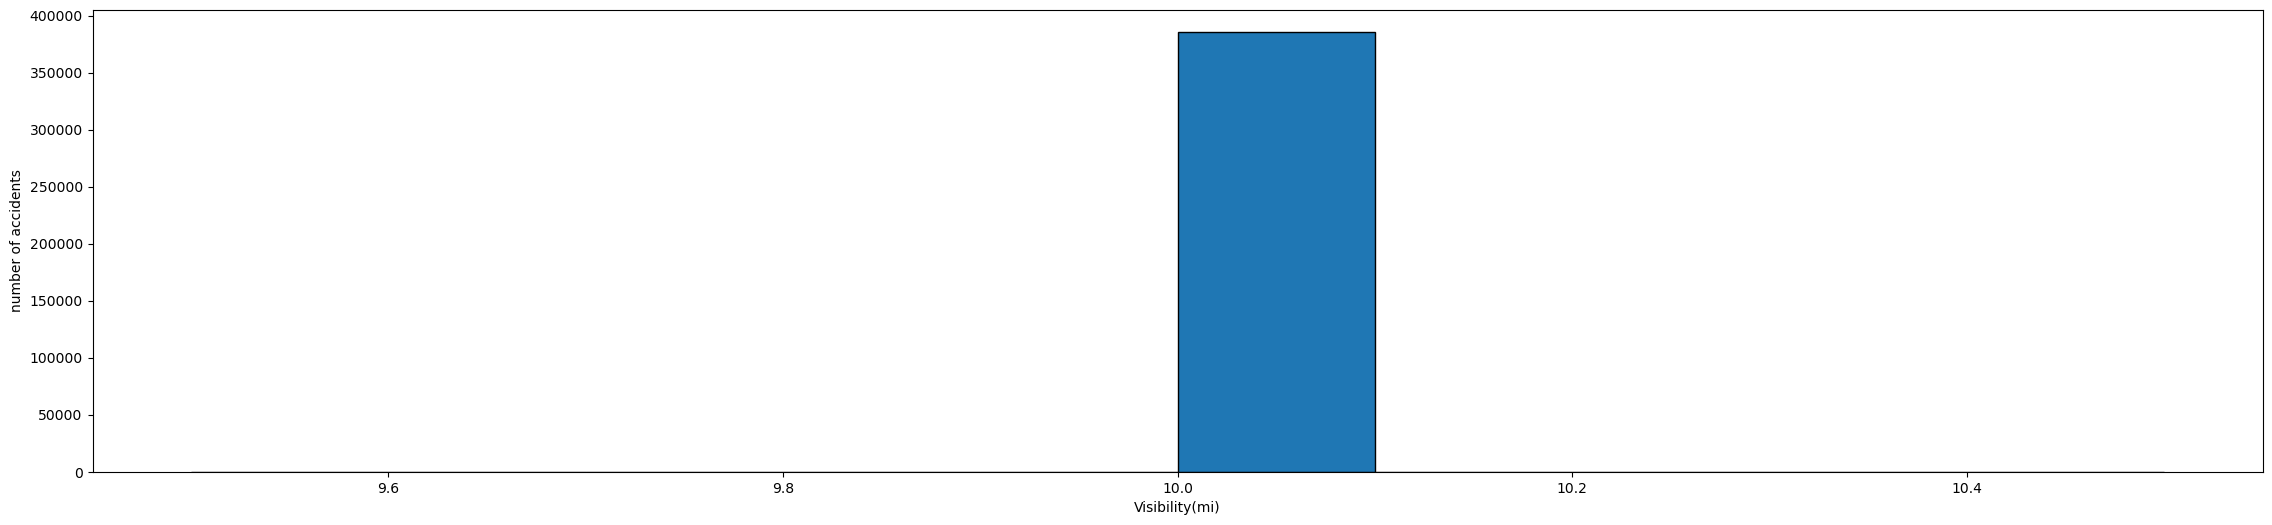

14915


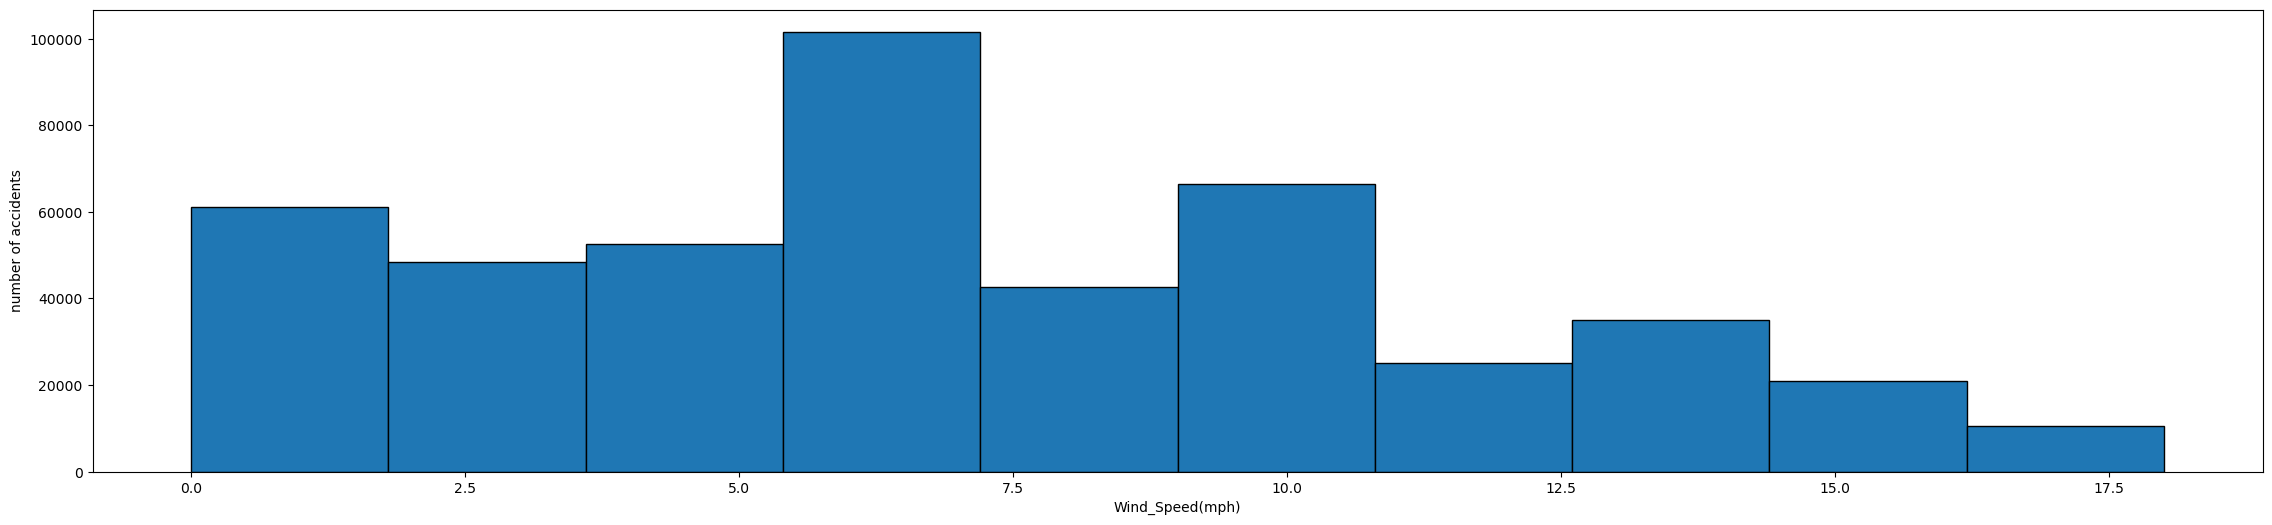

34733


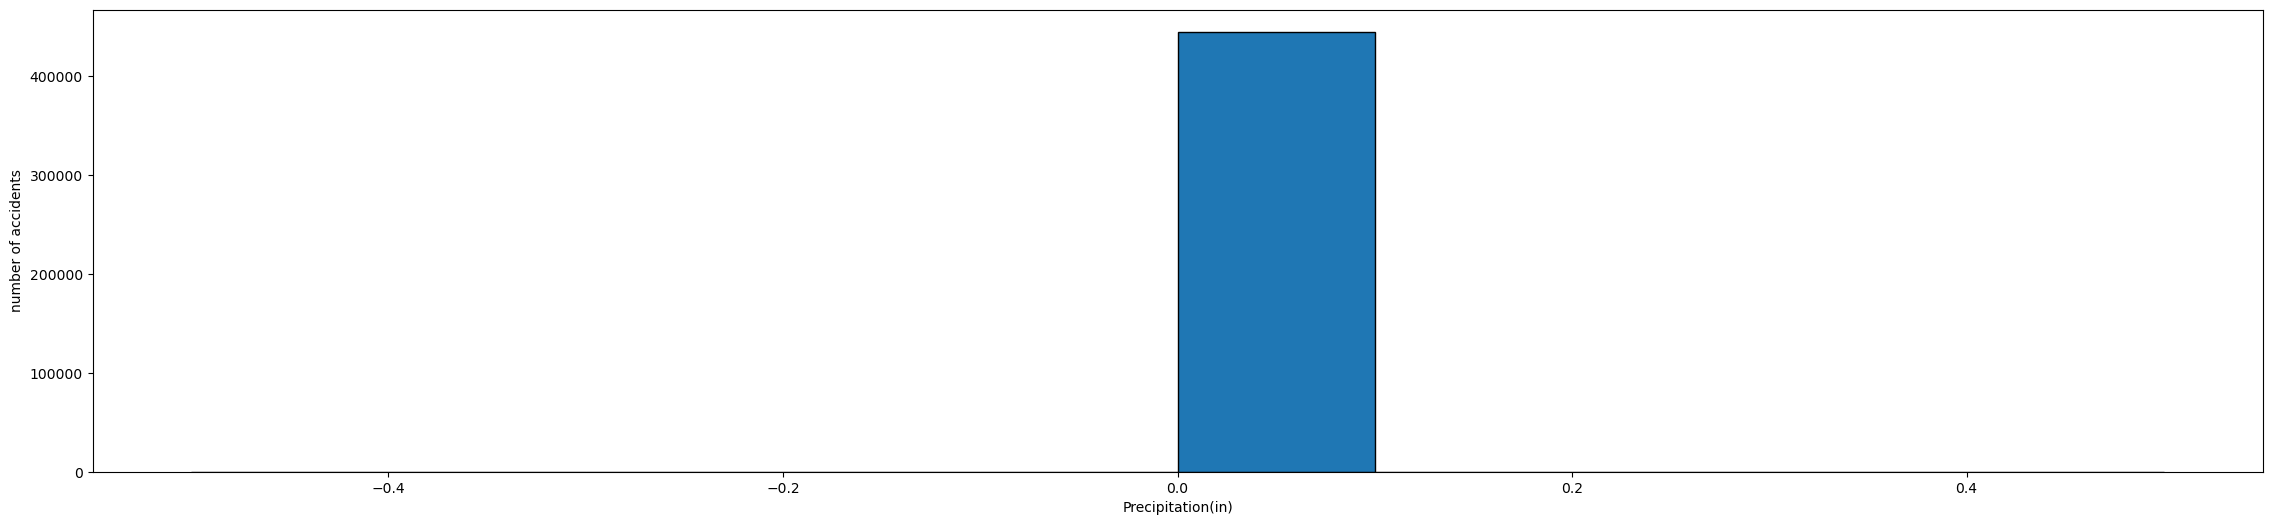

In [41]:
#histograms for numerical data
for i in ['Accident_Duration(min)','Distance(mi)','Temperature(F)',
      'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)']:
   # Calculate Q1, Q3, and IQR for each column
   Q1 = data[i].quantile(0.25)
   Q3 = data[i].quantile(0.75)
   IQR = Q3 - Q1
   # Define bounds for outliers
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   # Filter the DataFrame to exclude outliers
   filtered_data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)][i]
   print(len(data)-len(filtered_data))
   
   # Plot the histogram for filtered data
   plt.figure(figsize=(28, 6))
   plt.hist(filtered_data, edgecolor='black')
   plt.xticks()
   plt.xlabel(i)
   plt.ylabel('number of accidents')
   plt.show()


45171


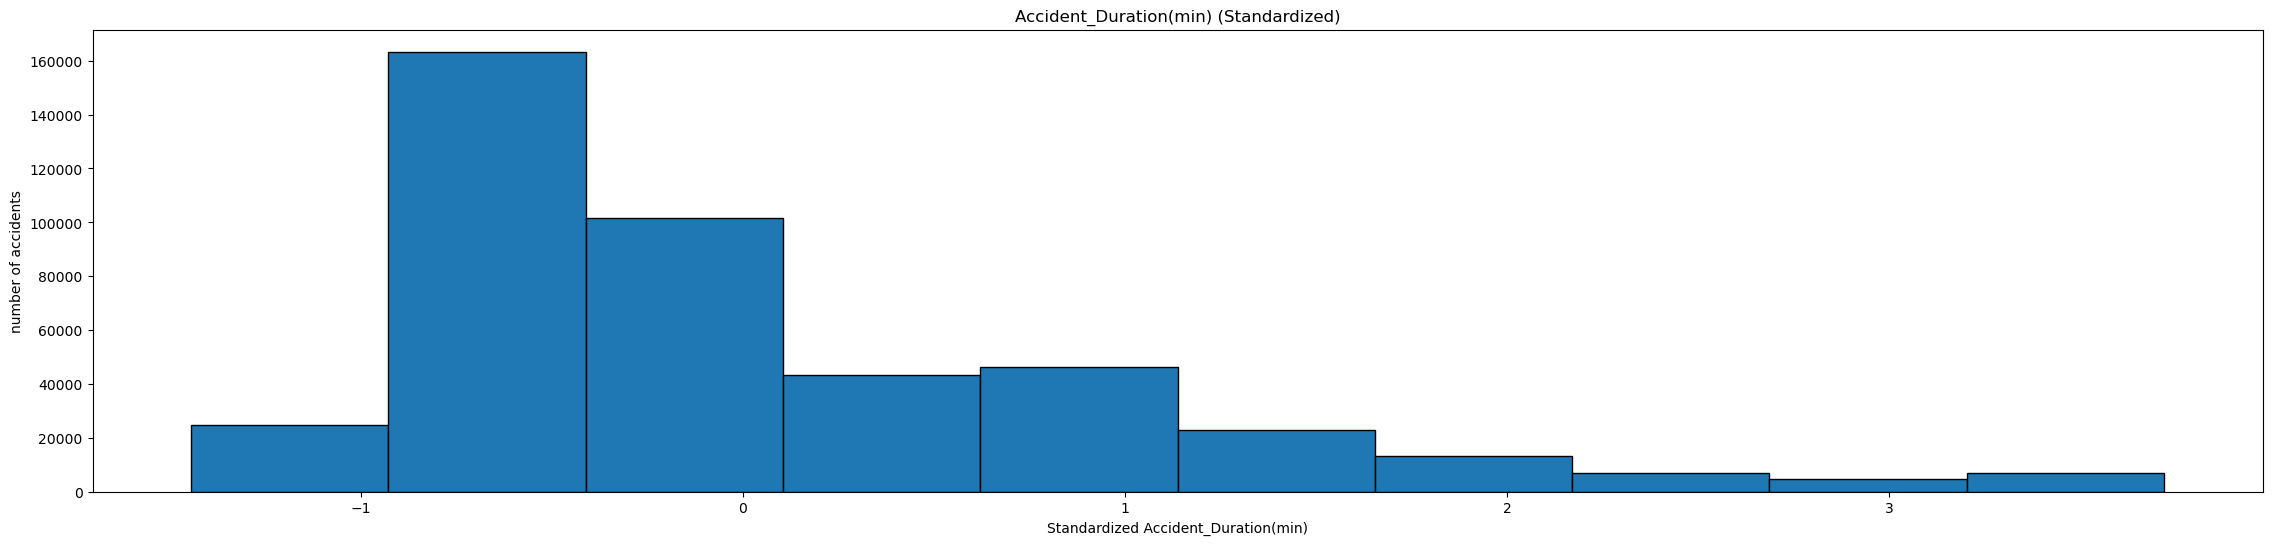

60297


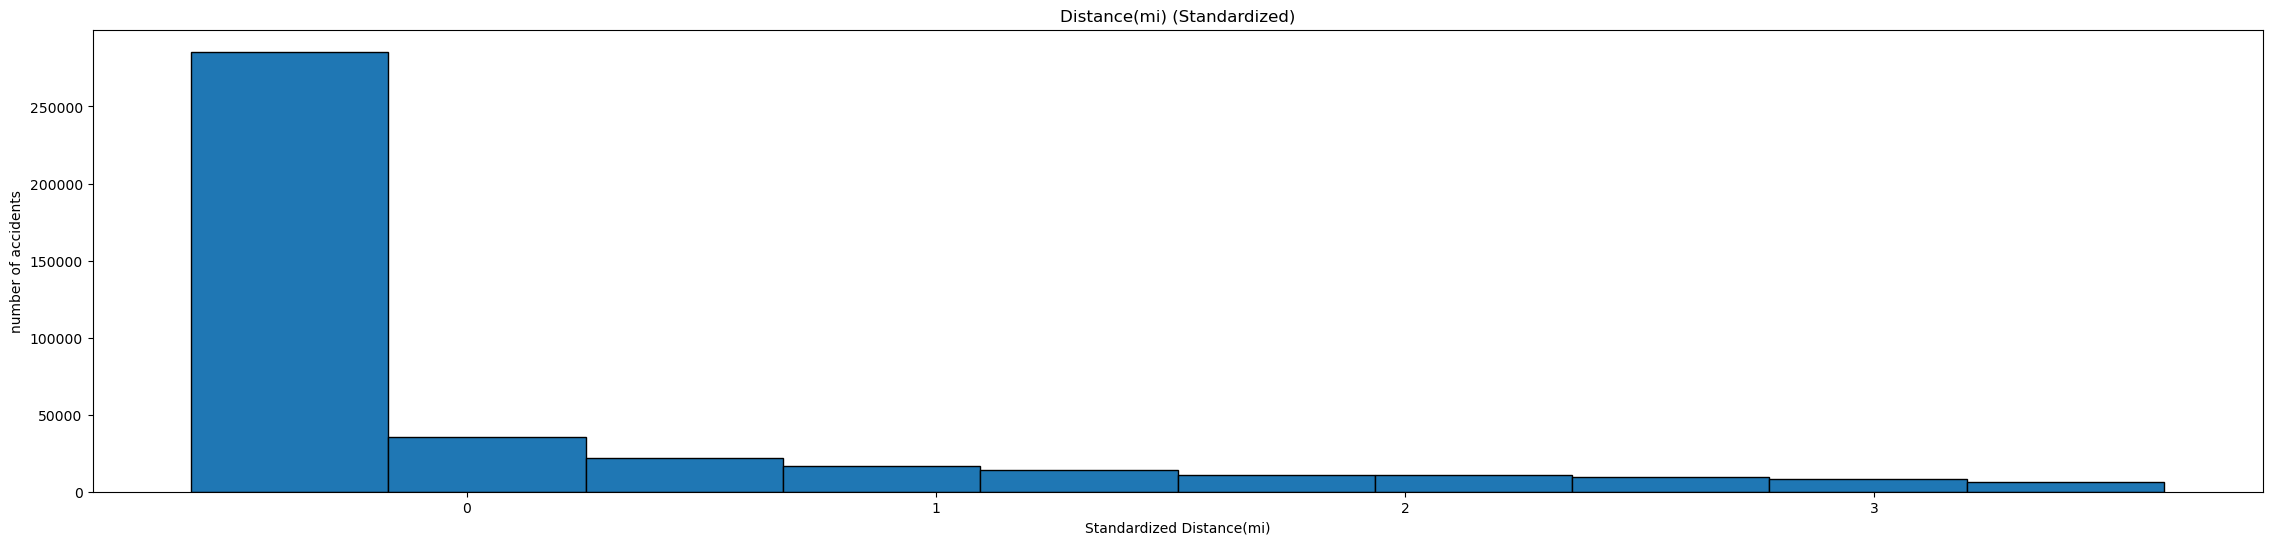

3265


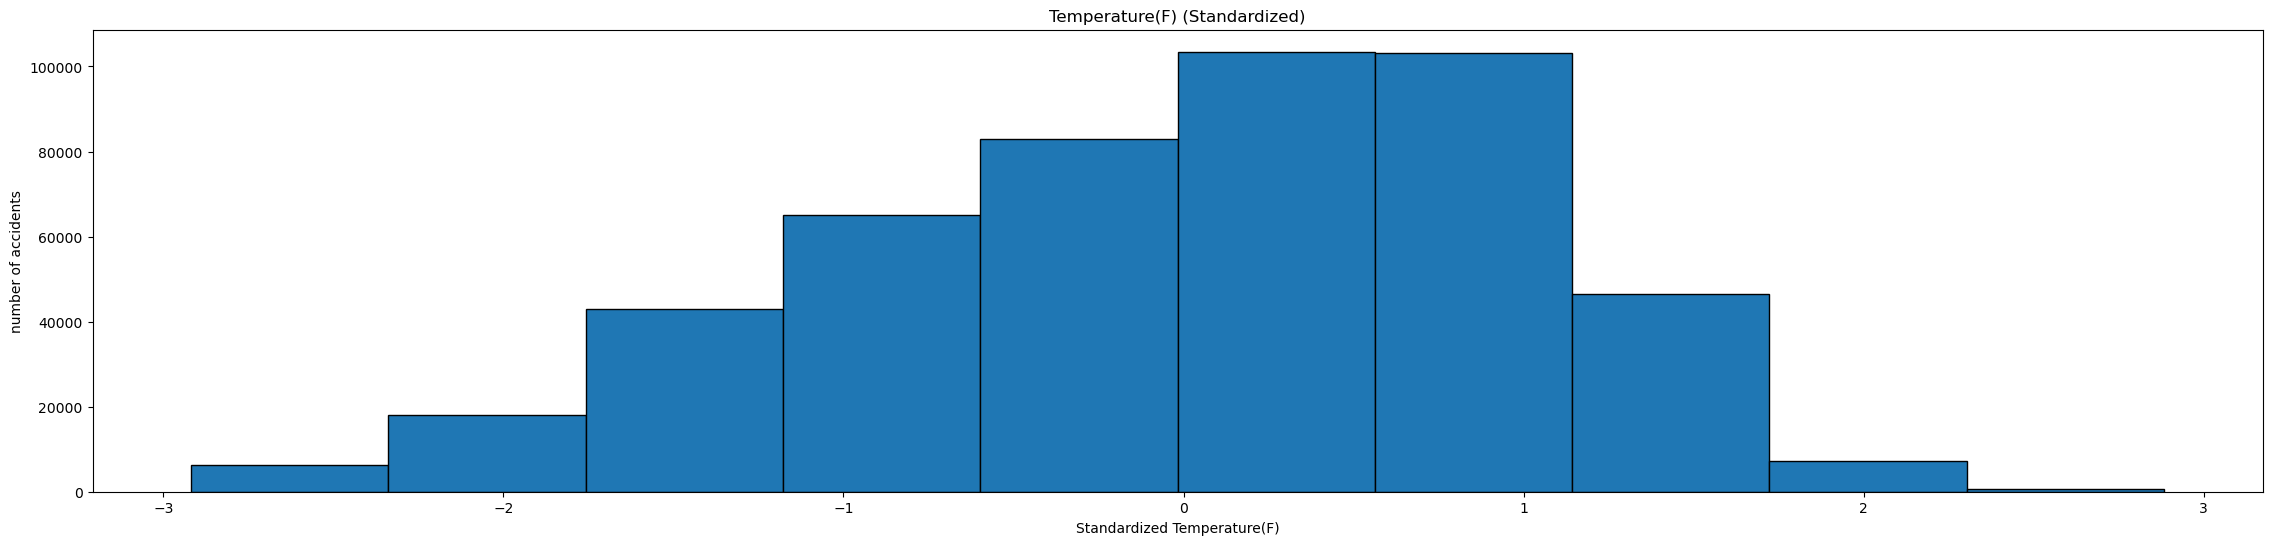

28787


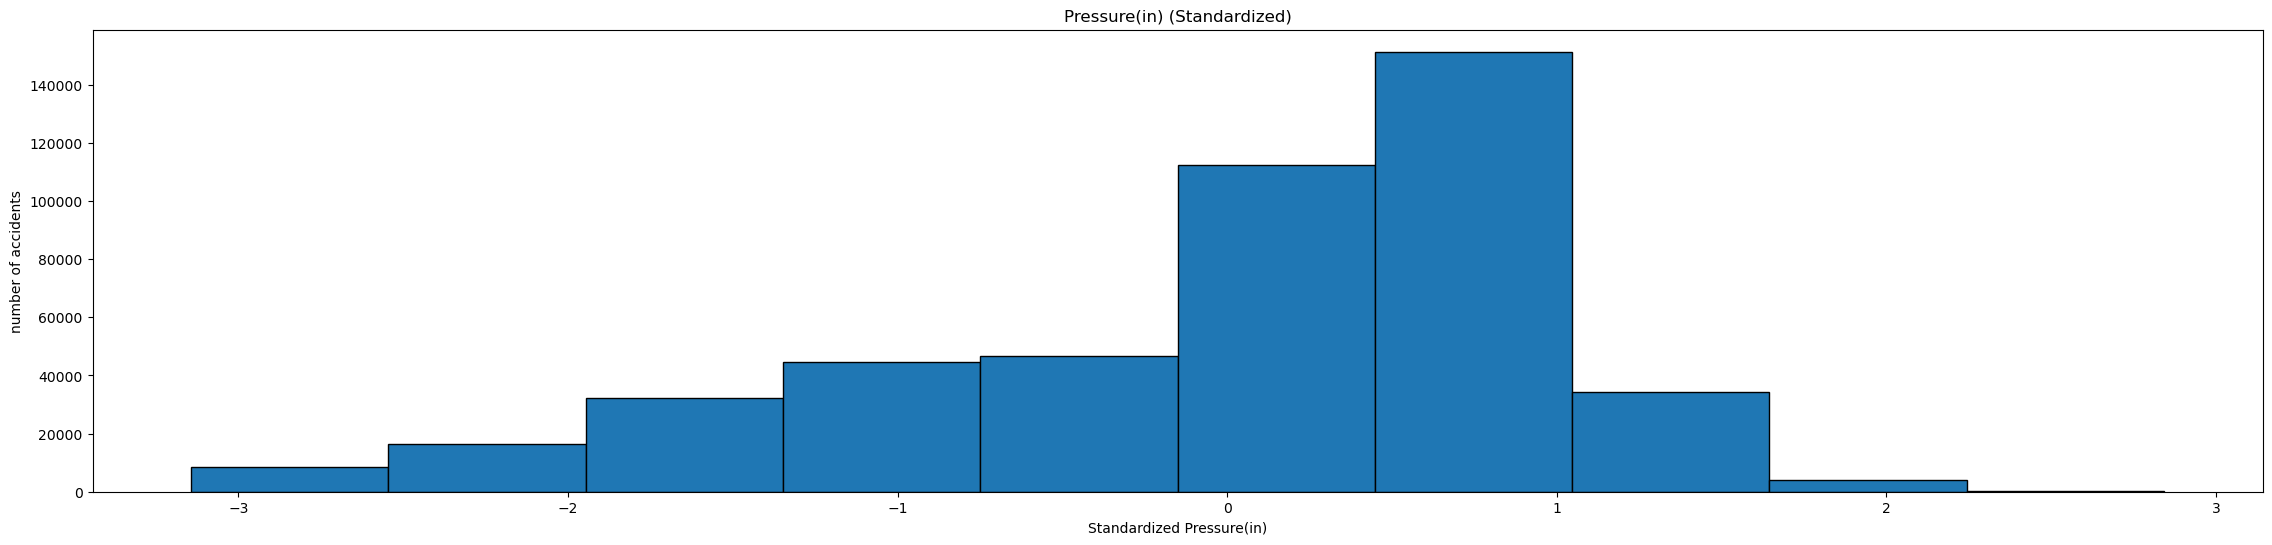

14915


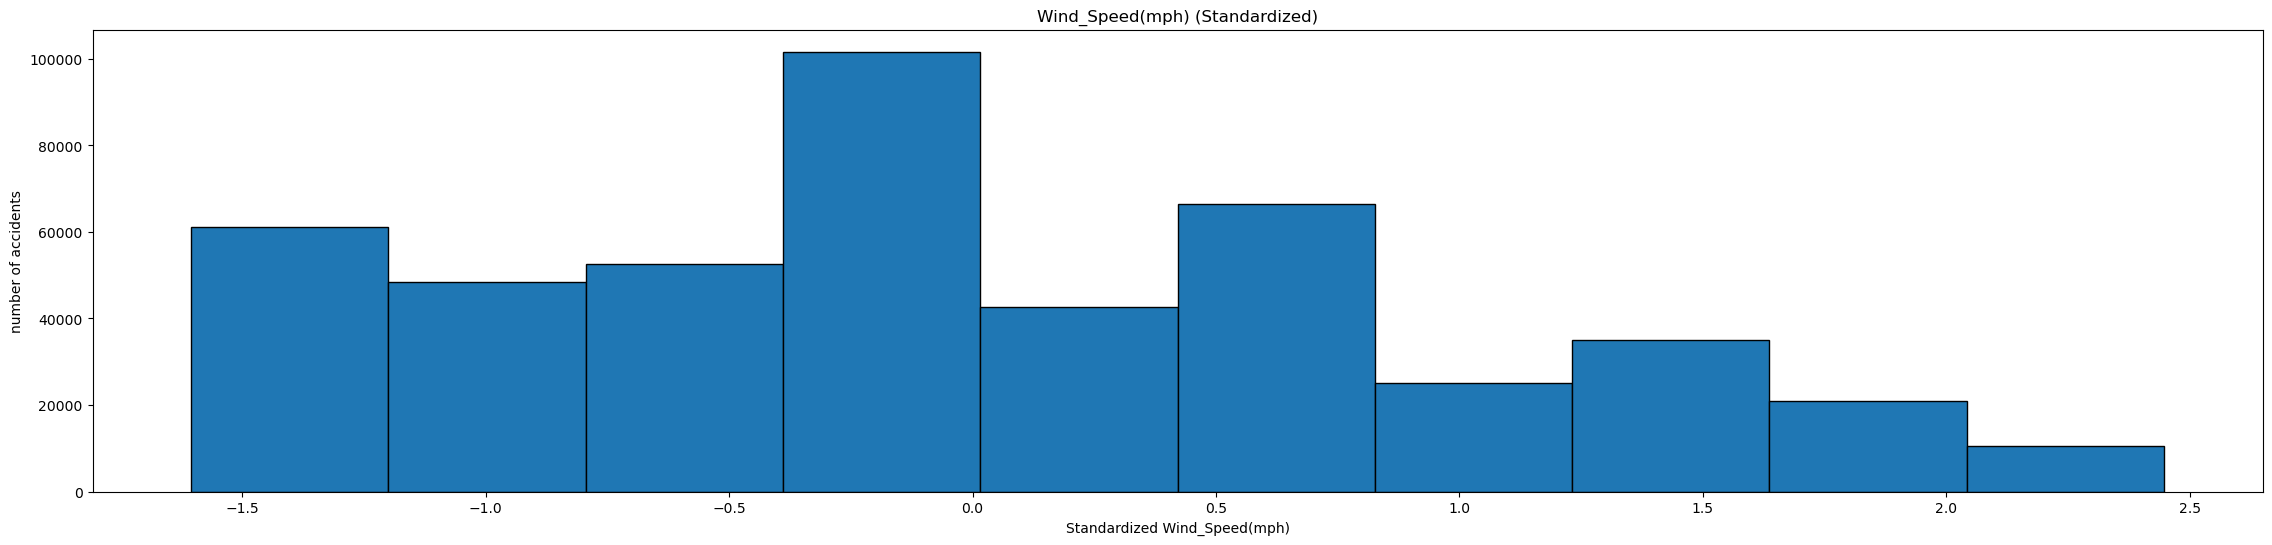

In [42]:
#histograms for numerical data
for i in ['Accident_Duration(min)','Distance(mi)','Temperature(F)',
       'Pressure(in)','Wind_Speed(mph)']:
   # Calculate Q1, Q3, and IQR for each column
   Q1 = data[i].quantile(0.25)
   Q3 = data[i].quantile(0.75)
   IQR = Q3 - Q1
   # Define bounds for outliers
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   # Filter the DataFrame to exclude outliers
   filtered_data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)][i]
   print(len(data)-len(filtered_data))
   
   # Standardize the column
   standardized_data = (filtered_data - filtered_data.mean()) / filtered_data.std()
   # Plot the histogram for filtered data
   plt.figure(figsize=(28, 6))
   plt.hist(standardized_data, edgecolor='black')
   plt.xticks()
   plt.xlabel(f'Standardized {i}')
   plt.ylabel('number of accidents')
   plt.title(f'{i} (Standardized)')
   plt.show()

In [43]:
def remove_outliers(df,name='feature'):
    #Store the 25th and 75th percentile 
    q25,q75=np.percentile(df[name],25),np.percentile(df[name],75)
    #Calculate the Interquartile range
    iqr_cut=1.5*(q75-q25)
    #Create variable of lower and upper cut
    lower,upper=q25-iqr_cut,q75+iqr_cut
    #Remove the outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

In [44]:
data = remove_outliers(data,name='Accident_Duration(min)')
data = remove_outliers(data,name='Distance(mi)')
data = remove_outliers(data,name='Temperature(F)')
data = remove_outliers(data,name='Pressure(in)')
data = remove_outliers(data,name='Wind_Speed(mph)')

In [45]:
for i in  data[numerical].columns:
   # Standardize the column
   newname = i + '_standardized'
   data[newname] = (data[i] - data[i].mean()) / data[i].std()
   print()
   data.drop(i,axis=1,inplace=True)
   numerical.remove(i)

for i in ['Accident_Duration(min)','Distance(mi)','Temperature(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)']:
   newname = i + '_standardized'
   numerical.append(newname)

   

In [46]:
fre_list = ['Street', 'City', 'County', 'Zipcode']
for i in fre_list:
  newname = i + '_frequency-encoded'
  data[newname] = data.groupby([i])[i].transform('count')
  data[newname] = data[newname]/data.shape[0]*data[i].unique().size
  data[newname] = data[newname].apply(lambda x: np.log(x+1))
  numerical.append(newname)


In [47]:
#remove unimportant columns
data.drop(columns=['ID', 'Street', 'City','Country', 'Airport_Code', 'County', 'Zipcode','Amenity','Bump','Railway','Give_Way','No_Exit','Roundabout','Traffic_Calming','Turning_Loop','Description'], axis=1, inplace=True)

In [48]:
categorical.remove('Amenity')
categorical.remove('Bump')
categorical.remove('Railway')
categorical.remove('Give_Way')
categorical.remove('No_Exit')
categorical.remove('Roundabout')
categorical.remove('Traffic_Calming')
categorical.remove('Turning_Loop')

In [49]:
numerical


['Accident_Duration(min)_standardized',
 'Distance(mi)_standardized',
 'Temperature(F)_standardized',
 'Humidity(%)_standardized',
 'Pressure(in)_standardized',
 'Visibility(mi)_standardized',
 'Wind_Speed(mph)_standardized',
 'Precipitation(in)_standardized',
 'Street_frequency-encoded',
 'City_frequency-encoded',
 'County_frequency-encoded',
 'Zipcode_frequency-encoded']

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in data[categorical].columns:
    newname = col + '_label-encoded'
    data[newname] = label_encoder.fit_transform(data[col])
    data.drop(col,axis=1,inplace=True)
    categorical.remove(col)
    
for col in ['Source','State','Timezone','Wind_Direction','Weather_Condition','Crossing','Junction','Station','Stop','Traffic_Signal','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']: 
    newname = col + '_label-encoded'
    categorical.append(newname) 
    
data['Severity'] = label_encoder.fit_transform(data['Severity'])
data['Year_label-encoded'] = label_encoder.fit_transform(data['Year'])
data.drop('Year',axis=1,inplace=True)
datetime.remove('Year')
datetime.append('Year_label-encoded')

In [51]:
categorical

['Source_label-encoded',
 'State_label-encoded',
 'Timezone_label-encoded',
 'Wind_Direction_label-encoded',
 'Weather_Condition_label-encoded',
 'Crossing_label-encoded',
 'Junction_label-encoded',
 'Station_label-encoded',
 'Stop_label-encoded',
 'Traffic_Signal_label-encoded',
 'Sunrise_Sunset_label-encoded',
 'Civil_Twilight_label-encoded',
 'Nautical_Twilight_label-encoded',
 'Astronomical_Twilight_label-encoded']

In [52]:
#print number and percentage of null entries per variable
print('Null values per variable')
for column in data.columns:
    print('{}: {} ({}%)'.format(column,pd.isnull(data[column]).sum(),(pd.isnull(data[column]).sum()/len(data))*100))

Null values per variable
Severity: 0 (0.0%)
Month: 0 (0.0%)
Day: 0 (0.0%)
Weekday: 0 (0.0%)
Hour: 0 (0.0%)
Accident_Duration(min)_standardized: 0 (0.0%)
Distance(mi)_standardized: 0 (0.0%)
Temperature(F)_standardized: 0 (0.0%)
Humidity(%)_standardized: 0 (0.0%)
Pressure(in)_standardized: 0 (0.0%)
Visibility(mi)_standardized: 0 (0.0%)
Wind_Speed(mph)_standardized: 0 (0.0%)
Precipitation(in)_standardized: 0 (0.0%)
Longitude_standardized: 0 (0.0%)
Latitude_standardized: 0 (0.0%)
Street_frequency-encoded: 0 (0.0%)
City_frequency-encoded: 0 (0.0%)
County_frequency-encoded: 0 (0.0%)
Zipcode_frequency-encoded: 0 (0.0%)
Source_label-encoded: 0 (0.0%)
State_label-encoded: 0 (0.0%)
Timezone_label-encoded: 0 (0.0%)
Wind_Direction_label-encoded: 0 (0.0%)
Weather_Condition_label-encoded: 0 (0.0%)
Crossing_label-encoded: 0 (0.0%)
Junction_label-encoded: 0 (0.0%)
Station_label-encoded: 0 (0.0%)
Stop_label-encoded: 0 (0.0%)
Traffic_Signal_label-encoded: 0 (0.0%)
Sunrise_Sunset_label-encoded: 0 (0.0%)


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339202 entries, 0 to 499999
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Severity                             339202 non-null  int64  
 1   Month                                339202 non-null  int64  
 2   Day                                  339202 non-null  int64  
 3   Weekday                              339202 non-null  int64  
 4   Hour                                 339202 non-null  int64  
 5   Accident_Duration(min)_standardized  339202 non-null  float64
 6   Distance(mi)_standardized            339202 non-null  float64
 7   Temperature(F)_standardized          339202 non-null  float64
 8   Humidity(%)_standardized             339202 non-null  float64
 9   Pressure(in)_standardized            339202 non-null  float64
 10  Visibility(mi)_standardized          339202 non-null  float64
 11  Wind_Speed(mp

In [54]:
data

,Severity,Month,Day,Weekday,Hour,Accident_Duration(min)_standardized,Distance(mi)_standardized,Temperature(F)_standardized,Humidity(%)_standardized,Pressure(in)_standardized,...,Crossing_label-encoded,Junction_label-encoded,Station_label-encoded,Stop_label-encoded,Traffic_Signal_label-encoded,Sunrise_Sunset_label-encoded,Civil_Twilight_label-encoded,Nautical_Twilight_label-encoded,Astronomical_Twilight_label-encoded,Year_label-encoded
0,1,6,12,2,10,-0.549630,-0.530474,0.791306,-0.178988,0.387177,...,0,0,0,0,1,0,0,0,0,3
1,1,12,3,5,23,1.435091,-0.258550,-1.023329,-0.814859,0.363100,...,0,0,0,0,0,1,1,1,1,6
2,1,8,20,5,13,1.227425,-0.423647,0.280940,0.320624,0.074171,...,0,0,0,0,1,0,0,0,0,6
4,1,12,4,4,1,1.592415,-0.307108,-1.193451,-1.450730,0.026016,...,0,0,0,0,0,1,1,1,1,4
5,1,3,29,0,7,0.751259,-0.530474,-1.193451,-0.360666,-0.937081,...,0,0,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,1,11,9,5,16,0.450946,-0.530474,1.528502,-2.677052,-2.502113,...,0,0,0,0,0,0,0,0,0,3
499995,1,12,15,2,7,-1.064253,0.236738,-1.306865,0.502302,-0.503687,...,0,0,0,0,0,1,0,0,0,5
499996,1,12,19,6,16,0.091899,-0.336243,0.848014,0.956495,0.435332,...,0,0,0,0,0,0,0,0,0,5
499998,2,5,15,4,17,-0.864976,-0.530474,1.074843,-1.269052,-2.550268,...,0,0,0,0,1,0,0,0,0,4


Text(0.5, 1.0, 'Correlation Heatmap for numerical Variables')

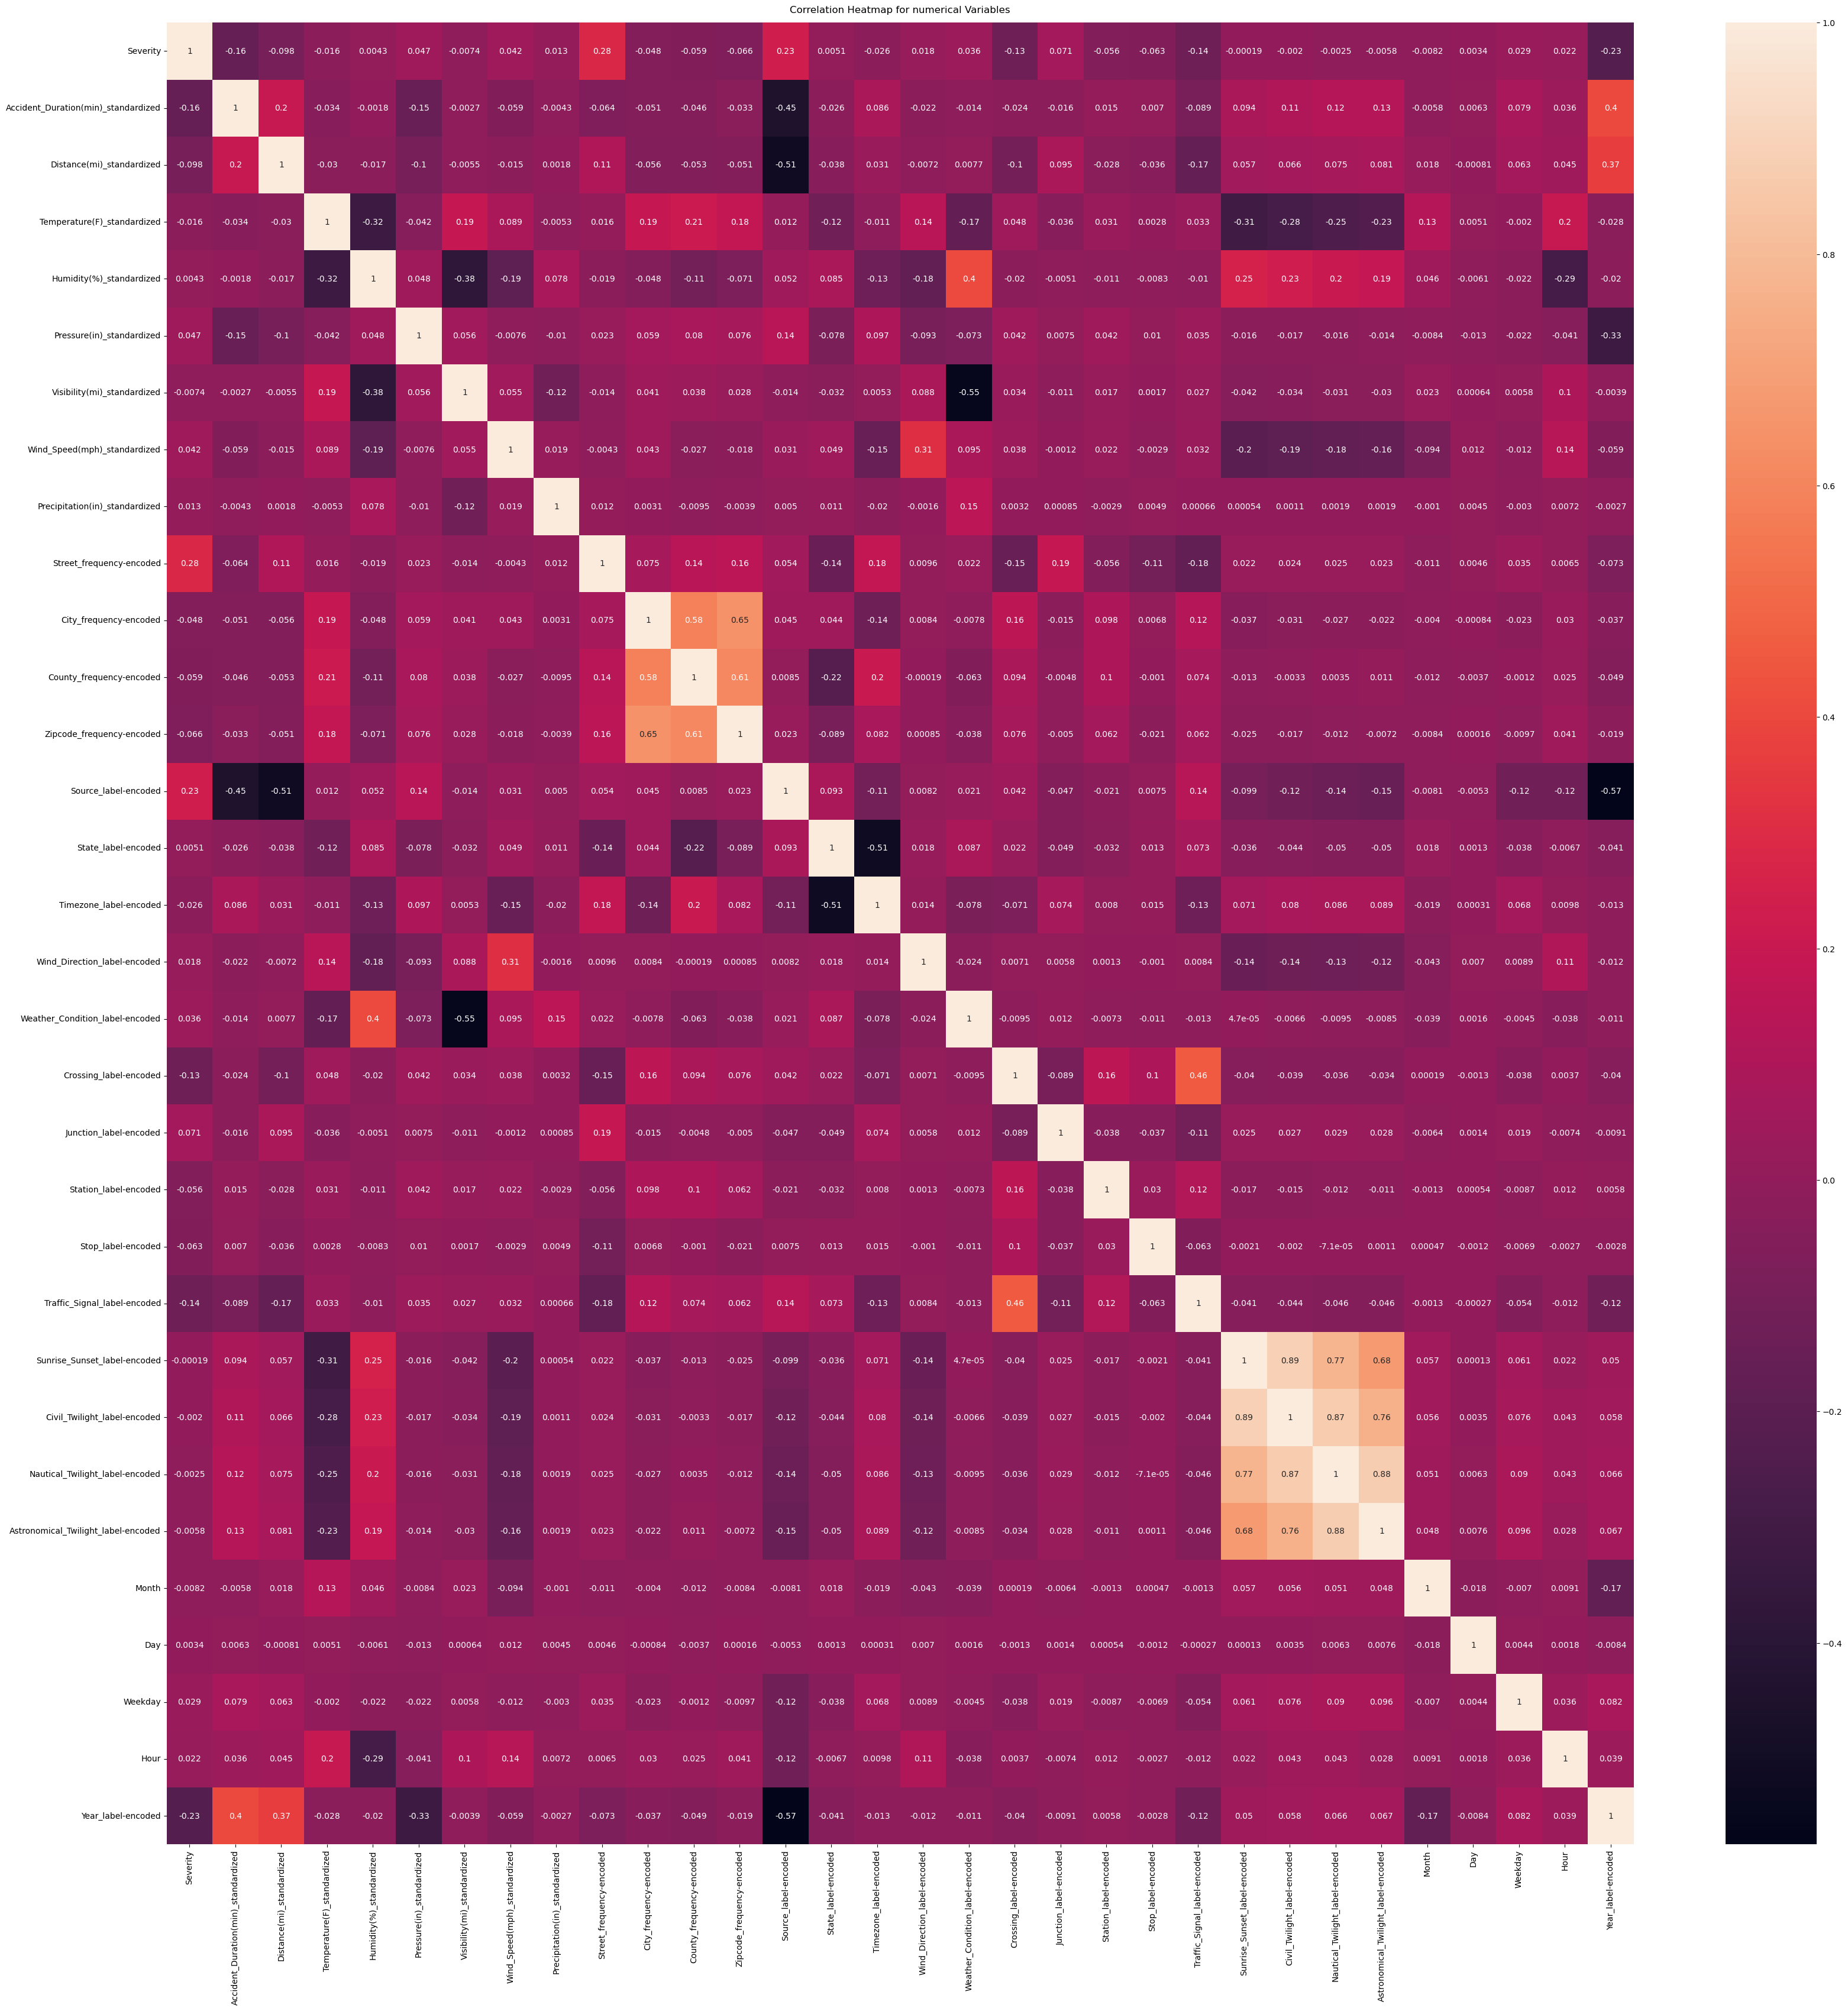

In [89]:
import seaborn as sns
#heat map to find extreme positive and negative correlations
plt.figure(figsize=(40, 40))
sns.heatmap(data[['Severity']+numerical+categorical+datetime].corr(), annot=True)
plt.title('Correlation Heatmap for numerical Variables', fontdict={'fontsize':12}, pad=12)


#print(data[['Severity']+numerical+categorical+datetime].corr())


In [56]:
from sklearn.model_selection import train_test_split
X = data.drop('Severity', axis=1)
y= data.Severity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
#save the files
X_train.to_csv('./X_train.csv', index=False)
X_test.to_csv('./X_test.csv', index=False)
y_train.to_csv('./y_train.csv', index=False)
y_test.to_csv('./y_test.csv', index=False)

In [58]:
data.to_csv('./Data_processed.csv', index=False)

In [59]:
from imblearn.under_sampling import RandomUnderSampler

In [60]:
sampler= RandomUnderSampler(random_state=42)
X_resampled_under , y_resampled_under = sampler.fit_resample(X,y)
y_resampled_under.value_counts()

0    3448
1    3448
2    3448
3    3448
Name: Severity, dtype: int64

In [61]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled_under, y_resampled_under, test_size=0.30, random_state=42)

In [62]:
X_train_resampled.to_csv('./X_train_resampled.csv', index=False)
X_test_resampled.to_csv('./X_test_resampled.csv', index=False)
y_train_resampled.to_csv('./y_train_resampled.csv', index=False)
y_test_resampled.to_csv('./y_test_resampled.csv', index=False)

# PCA

In [77]:
#standardize sample
#data_for_PCA_standardized = (data - data.mean(axis=0)) / data.std(axis=0)

from sklearn.decomposition import PCA

# Create principal components
pca = PCA(10)
data_pca = pca.fit_transform(data)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(data_pca.shape[1])]
data_pca = pd.DataFrame(data_pca, columns=component_names)

data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-4.273126,-3.714974,2.309489,0.623228,0.673036,0.602035,0.897619,-1.135199,-1.324833,-0.859019
1,22.704336,-12.757263,-11.238646,-4.246632,4.466336,-4.036981,-1.086617,0.907848,-1.517164,-0.239083
2,-17.349651,4.302671,-1.117161,-0.593036,5.476659,-4.058384,-0.163134,0.618244,-2.097878,-0.256060
3,-17.351419,-11.779449,11.485554,-5.404507,-2.214028,-1.471379,-1.288636,0.490861,-1.823186,-1.402881
4,-3.168731,13.318763,4.963169,4.235339,5.621867,-1.821569,1.600949,-2.733454,0.858629,-0.725930


In [78]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=data.columns,  # and the rows are the original features
)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Severity,0.000151,0.000194,-0.001725,-0.000581,0.004379,0.040776,0.041302,0.058475,0.046251,-0.004137
Month,0.004506,-0.008888,-0.007730,-0.987584,0.076843,-0.088925,-0.064426,-0.015603,0.030853,0.016640
Day,0.001106,0.999948,0.002203,-0.008841,-0.002085,-0.001179,-0.001324,-0.001753,0.000059,0.000093
Weekday,-0.004512,0.000988,-0.013452,0.007761,-0.001715,-0.222574,-0.213046,0.815298,-0.478094,0.056581
Hour,-0.002839,0.001965,-0.993321,-0.001016,-0.087273,0.007979,0.036714,-0.001759,0.009364,0.035435
Accident_Duration(min)_standardized,-0.001715,0.000732,-0.006938,0.008661,-0.019572,-0.205695,-0.137952,-0.030824,0.043558,-0.015747
Distance(mi)_standardized,-0.002537,-0.000094,-0.008780,0.001484,-0.011679,-0.177461,-0.129935,0.019158,0.159899,-0.023461
Temperature(F)_standardized,-0.007716,0.000606,-0.038538,-0.036741,0.056379,0.090153,-0.133354,-0.060268,-0.079795,-0.146279
Humidity(%)_standardized,0.005597,-0.000819,0.056458,-0.015576,-0.061802,-0.030467,0.051543,0.014869,0.062375,0.384147
Pressure(in)_standardized,-0.005134,-0.001449,0.008950,-0.005954,-0.029232,0.169998,0.087485,0.034566,-0.089315,-0.036471



The table displays the coefficients of principal component analysis (PCA) loadings for various variables related to traffic accident data. These coefficients represent the contribution of each variable to the principal components (PC1 through PC10). Here are a few insights into the data and PCA loadings:

PC1: The most significant contributions to PC1 are from State_label-encoded (0.998327) and Longitude_standardized (0.028331). This suggests that PC1 could be primarily capturing geographical differences across states.

PC2: The dominant loading here is Day (0.999948), indicating that PC2 largely represents the day of the month.

PC3: The variable Hour shows the highest loading at -0.993321, which means PC3 may be effectively capturing variations across different hours of the day.

PC4: The highest loading is -0.987584 from Month, suggesting PC4 captures seasonal or monthly variations.

PC5: The Wind_Direction_label-encoded has the highest loading (0.977980) on this component, likely capturing variations related to wind direction.

Higher PCs: In PCs like PC8 and PC9, we observe significant contributions from variables such as Weekday, City_frequency-encoded, and Street_frequency-encoded, which could be indicating variations in traffic patterns based on the urban infrastructure or the day of the week.

This PCA table can be very useful for understanding which factors are most important in explaining the variance in your dataset. Depending on what aspect of the traffic accident data you are focusing on (time-related patterns, geographical factors, weather conditions, etc.), different PCs might be of particular interest.

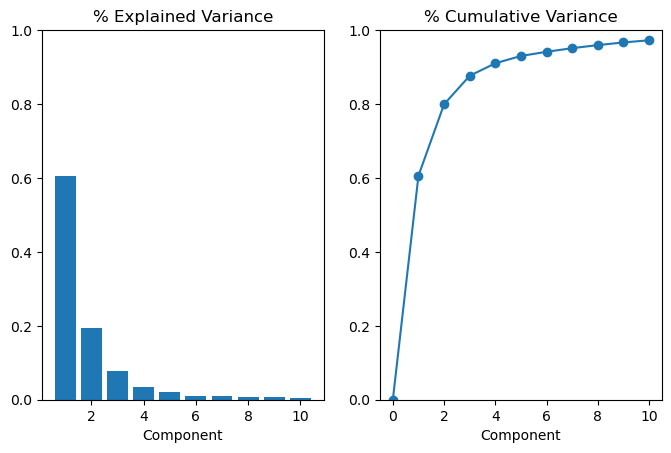

In [79]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca);

The plots reveal that a large portion of the total variance can be explained by the first few components, reaching a plateau near the 100% mark after including more components. This graph is useful for deciding how many components to retain for an analysis. Based on the "elbow" in the graph, which appears to be around the third or fourth component, you might decide to use only the first few components for further analysis as they capture most of the variance in the dataset.